In [74]:
# two documents
# /content/drive/MyDrive/MLRG/merged.csv
# /content/drive/MyDrive/MLRG/combined_data.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
merged_data = pd.read_csv('/content/drive/MyDrive/MLRG/merged_rename.csv')       #merged by aleyna
combined_data = pd.read_csv('/content/drive/MyDrive/MLRG/combined_data.csv')  # merged by torkepes

%load_ext autoreload
%autoreload 2

# basic info of Merged csv files

In [63]:
#merged data
#drop the ctrl
ctrl_columns = merged_data.filter(regex='ctrl').columns
merged_data.drop(columns=ctrl_columns, inplace=True)

print("First 5 rows of the merged data:")
print(merged_data.head())
print("\nDetails of merged data:")
print(f"Total rows: {merged_data.shape[0]}, Total columns: {merged_data.shape[1]}")
print("Column names:", merged_data.columns.tolist())

First 5 rows of the merged data:
   Unnamed: 0                       species  \
0           0  Streptococcus pneumoniae D39   
1           1  Streptococcus pneumoniae D39   
2           2  Streptococcus pneumoniae D39   
3           3  Streptococcus pneumoniae D39   
4           4  Streptococcus pneumoniae D39   

                                         upstream200  strpn_as_1_ge_tpm  \
0  TTACGTTTAGAAATTGAATCAATCAAAAAGAAAATCAAATAATTTG...         365.544548   
1  GATTGATTCTCTTAAAGCTTTAAATAGCGAAAAGGTGACCATTAGC...          49.964010   
2  CGTTGGGAAATTACACGTGTAGGAGCAGATATCAAAATAAAATGCA...         516.780668   
3  CATGTCATATGAAGATCTAGTGAAATACGGATCTGAAAAGGCCGTA...          96.223259   
4  GAACTCAGGTCTTTAACCGTGTTAAGATTGGAATTGGAAGACCTAA...          82.032415   

   strpn_as_2_ge_tpm  strpn_as_3_ge_tpm  strpn_bs_1_ge_tpm  strpn_bs_2_ge_tpm  \
0         404.899197         160.276922         275.323213         485.163745   
1          32.349780         131.458871          10.104460           4.

In [64]:
#Some processing and statistics based on practical implications

#Count how many species and each species data
filtered_columns = [col for col in merged_data.columns if col not in ['Unnamed: 0', 'species', 'upstream200']]
species = [col.split('_')[0] for col in filtered_columns]
species_counts = {spec: species.count(spec) for spec in set(species)}
print(species_counts)
unique_species_count = len(set(species))
print(f"Total unique species: {unique_species_count}")

{'legip': 33, 'sepi': 33, 'entfa': 33, 'spyo': 33, 'etec': 33, 'ngon': 33, 'staga': 33, 'achx': 33, 'frat': 33, 'upec': 33, 'hpj99': 33, 'mrsa': 33, 'pseudo': 33, 'agga': 33, 'salmt': 33, 'vibrio': 33, 'ypstb': 33, 'ssuis': 27, 'listeria': 33, 'epec': 33, 'hpg27': 33, 'bburg': 33, 'hinf': 33, 'acib': 33, 'mssa': 33, 'nmen': 33, 'shif': 33, 'mtb': 33, 'strpn': 33, 'burk': 33, 'campy': 33, 'klebs': 33}
Total unique species: 32


In [65]:
print("\nBasic statistics of the merged data:")
print(merged_data.describe())


Basic statistics of the merged data:
         Unnamed: 0  strpn_as_1_ge_tpm  strpn_as_2_ge_tpm  strpn_as_3_ge_tpm  \
count  96505.000000        2115.000000        2115.000000        2115.000000   
mean   48252.000000         472.730294         472.714628         472.621684   
std    27858.738201        2064.096260        2043.520521        2479.770911   
min        0.000000           0.000000           0.000000           0.000000   
25%    24126.000000          20.048605          22.716163          18.624659   
50%    48252.000000          89.151470          99.876135          81.449596   
75%    72378.000000         273.403493         279.163084         245.805208   
max    96504.000000       50038.057800       51001.908420       67603.712940   

       strpn_bs_1_ge_tpm  strpn_bs_2_ge_tpm  strpn_bs_3_ge_tpm  \
count        2115.000000        2115.000000        2115.000000   
mean          472.716366         472.660642         472.692049   
std          1651.863210        1575.169390

We can see that there are some condition data missing from ssuis. So, we need to find which species on which conditions are missing.

In [72]:
import pandas as pd
import numpy as np
import re

all_conditions = [
    'as', 'bs', 'li', 'mig', 'nd', 'ns', 'oss', 'oxs', 'sp', 'tm', 'vic'
]

species_list = [
    'legip', 'agga', 'acib', 'achx', 'bburg', 'campy', 'upec', 'epec',
    'hinf', 'hpg27', 'frat', 'burk', 'entfa', 'mtb', 'listeria', 'hpj99',
    'klebs', 'etec', 'salmt', 'sepi', 'nmen', 'ngon', 'pseudo', 'staga',
    'mrsa', 'ssuis', 'shif', 'strpn', 'ypstb', 'spyo', 'vibrio', 'mssa'
]

# Extract eligible columns
pattern = re.compile('|'.join([f"{species}_" for species in species_list]))
filtered_columns = [col for col in merged_data.columns if pattern.match(col)]
filtered_data = merged_data[filtered_columns]

missing_conditions_dict = {}

for species in species_list:
    species_columns = [col for col in filtered_columns if col.startswith(species)]
    species_conditions = set(col.split('_')[1] for col in species_columns)
    missing_conditions = set(all_conditions) - species_conditions

    # Add logic to detect if all column values are NaN
    for condition in all_conditions:
        condition_columns = [col for col in species_columns if f'_{condition}_' in col]
        if condition_columns:
            all_nan = all(filtered_data[col].isna().all() for col in condition_columns)
            if all_nan:
                missing_conditions.add(condition)

    if missing_conditions:
        missing_conditions_dict[species] = missing_conditions

# Print the missing conditions for each specie
for species, missing in missing_conditions_dict.items():
    print(f"Missing conditions for {species}: {missing}")


Missing conditions for legip: {'vic', 'bs'}
Missing conditions for bburg: {'bs'}
Missing conditions for hinf: {'bs'}
Missing conditions for hpg27: {'bs'}
Missing conditions for burk: {'bs'}
Missing conditions for mtb: {'vic'}
Missing conditions for hpj99: {'bs'}
Missing conditions for ssuis: {'mig', 'sp'}
Missing conditions for shif: {'ns', 'nd', 'li', 'mig', 'tm', 'bs', 'sp', 'vic', 'oss', 'oxs', 'as'}
Missing conditions for ypstb: {'ns', 'nd', 'li', 'mig', 'tm', 'bs', 'sp', 'vic', 'oss', 'oxs', 'as'}


Perform a visual analysis for each specie to see the distribution of data: data distribution

<ipython-input-73-e2c8a1c97738>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=renamed_columns, inplace=True)


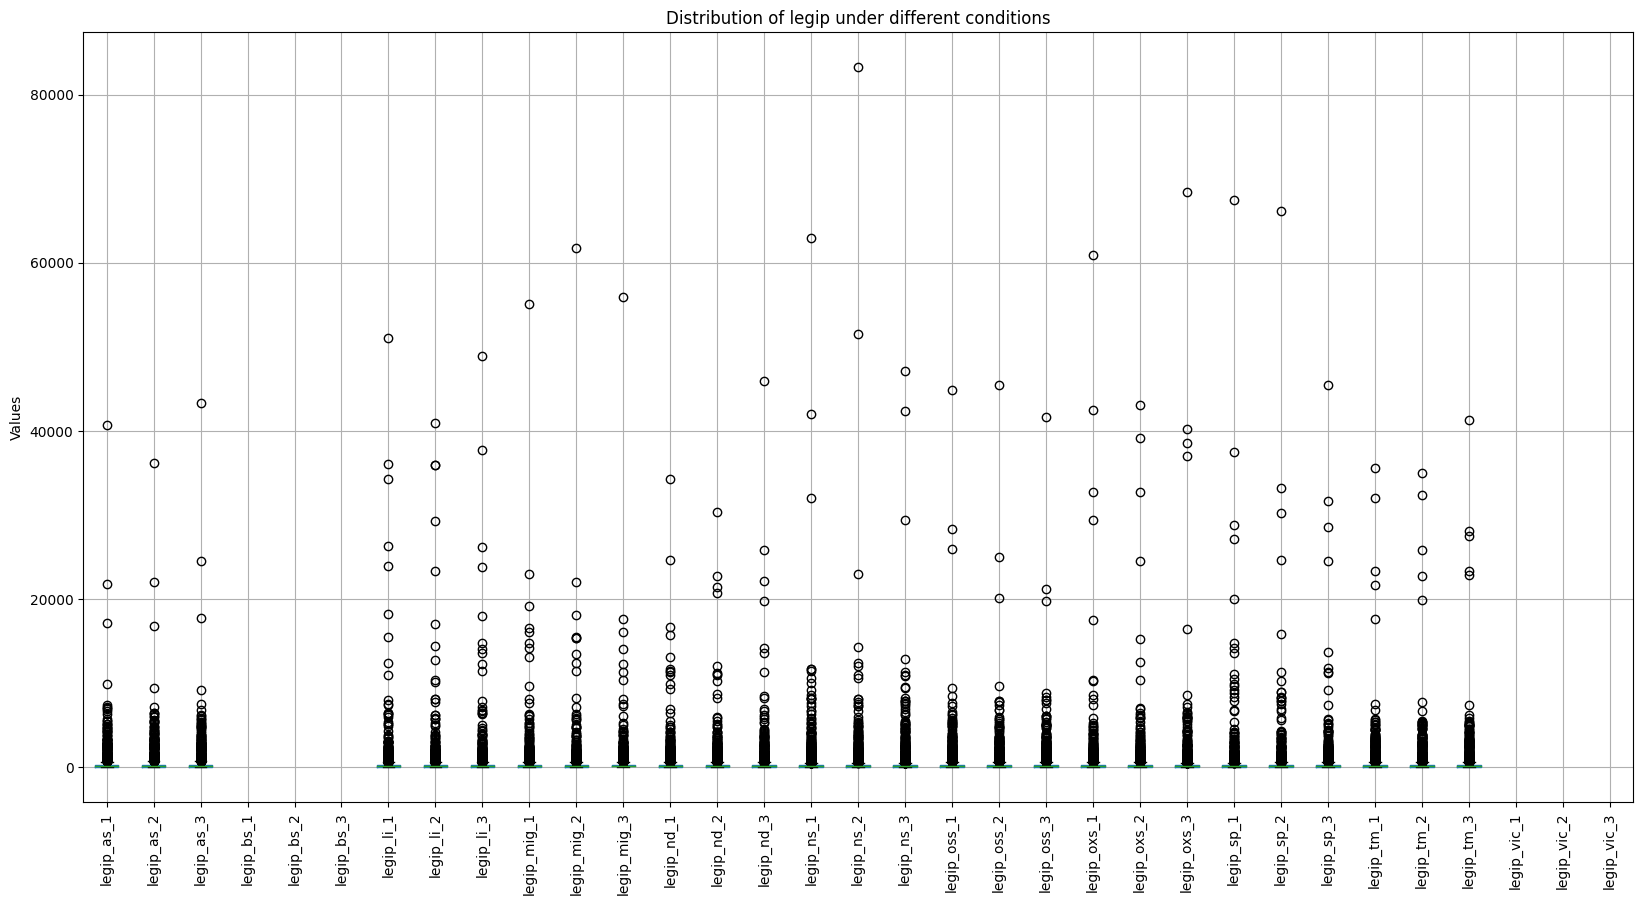


Basic statistics for legip:
         legip_as_1    legip_as_2    legip_as_3  legip_bs_1  legip_bs_2  \
count   2943.000000   2943.000000   2943.000000         0.0         0.0   
mean     339.789331    339.789331    339.789331         NaN         NaN   
std     1104.439677   1045.415364   1144.546386         NaN         NaN   
min        0.000000      0.000000      0.000000         NaN         NaN   
25%       61.382403     61.173295     62.227927         NaN         NaN   
50%      148.356102    147.726870    150.920446         NaN         NaN   
75%      305.054784    308.038995    314.042443         NaN         NaN   
max    40711.847670  36116.369220  43363.574570         NaN         NaN   

       legip_bs_3    legip_li_1    legip_li_2    legip_li_3   legip_mig_1  \
count         0.0   2943.000000   2943.000000   2943.000000   2943.000000   
mean          NaN    339.789331    339.789331    339.789331    339.789331   
std           NaN   1641.865730   1567.319762   1539.362617   14

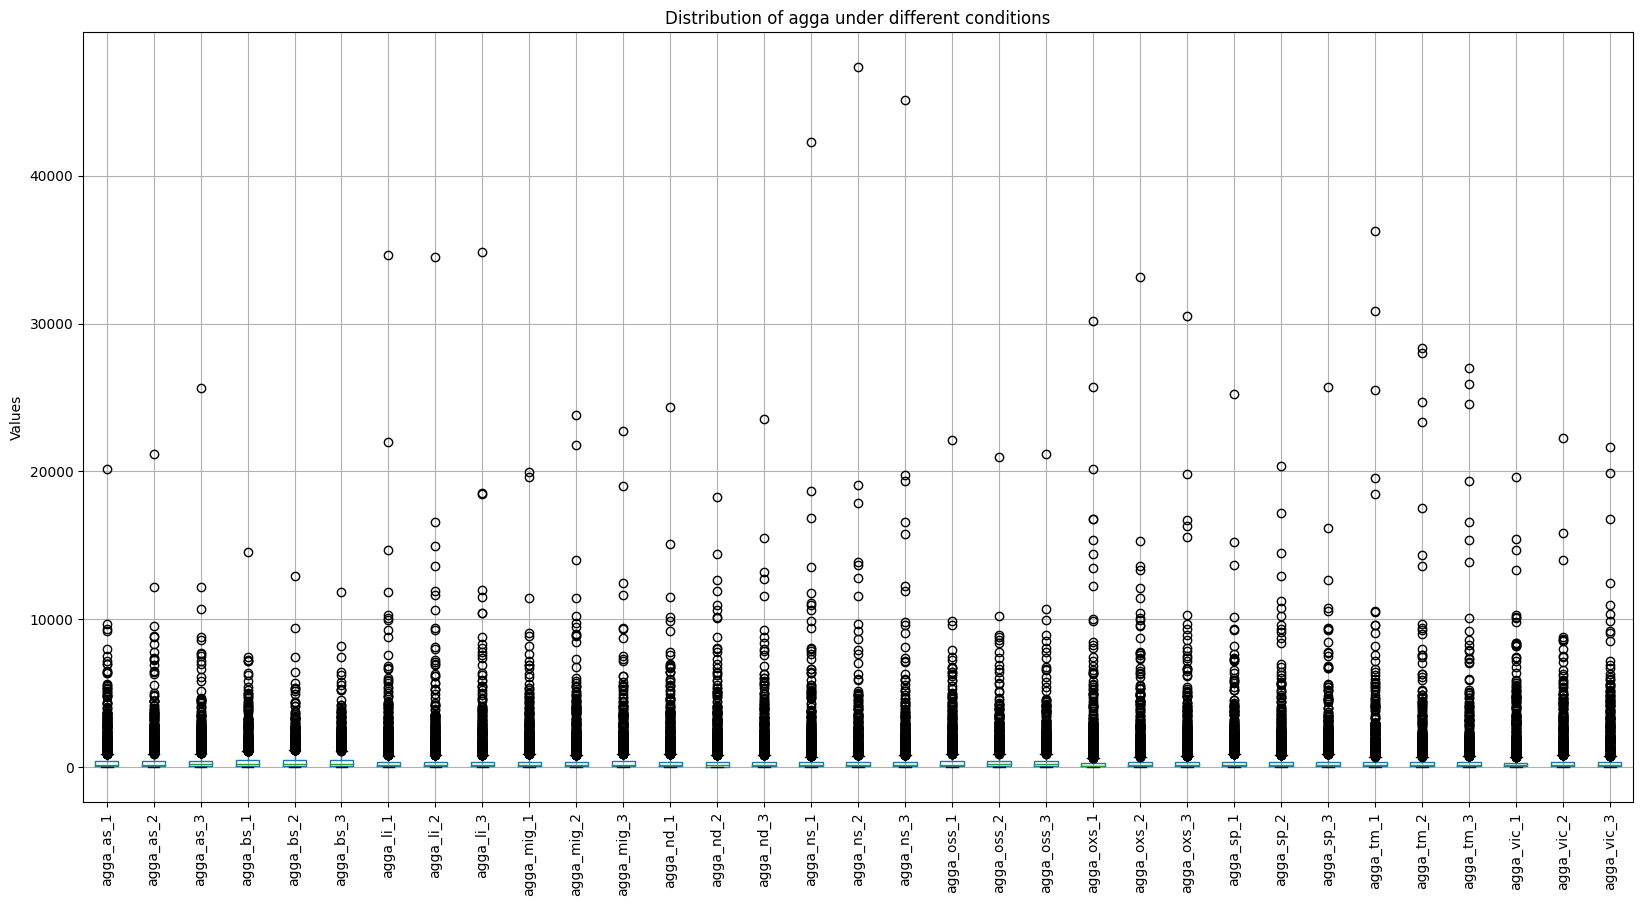


Basic statistics for agga:
          agga_as_1     agga_as_2     agga_as_3     agga_bs_1     agga_bs_2  \
count   2225.000000   2225.000000   2225.000000   2225.000000   2225.000000   
mean     449.438202    449.438202    449.438202    449.438202    449.438202   
std      977.062798    981.162972   1002.676030    788.332623    731.850490   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       73.958048     73.824250     80.715960     87.712313     91.476341   
50%      174.581036    176.920617    185.908321    226.714104    234.142856   
75%      401.295914    409.770430    418.701245    478.590830    508.255212   
max    20139.112640  21196.310150  25650.872040  14533.474880  12910.960910   

          agga_bs_3     agga_li_1     agga_li_2     agga_li_3    agga_mig_1  \
count   2225.000000   2225.000000   2225.000000   2225.000000   2225.000000   
mean     449.438202    449.438202    449.438202    449.438202    449.438202   
std      722.736803   1

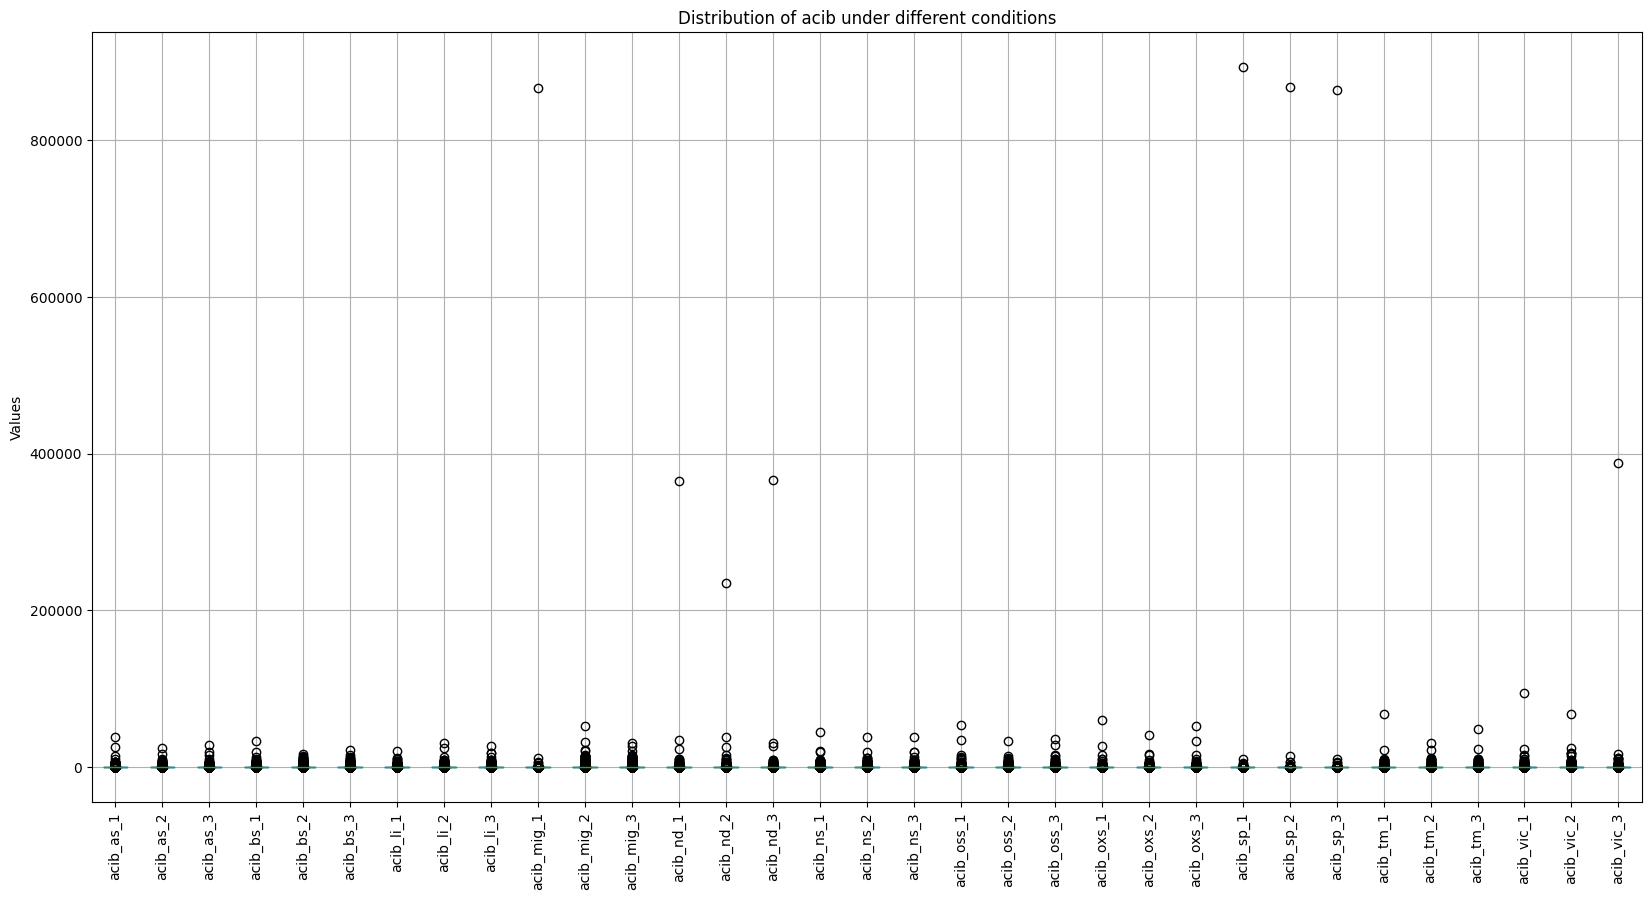


Basic statistics for acib:
          acib_as_1     acib_as_2     acib_as_3     acib_bs_1     acib_bs_2  \
count   3870.000000   3870.000000   3870.000000   3870.000000   3870.000000   
mean     258.189337    258.191626    258.197726    258.185161    258.220232   
std      978.746384    811.911038    846.863409    944.595486    916.862091   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       21.394454     19.880158     21.414326     13.056590     10.774920   
50%       69.965311     67.278498     71.315701     57.559117     48.406684   
75%      195.572391    191.747352    200.904405    180.110015    165.131018   
max    38741.434050  24492.062470  28907.561650  33771.853620  17050.281950   

          acib_bs_3     acib_li_1     acib_li_2     acib_li_3     acib_mig_1  \
count   3870.000000   3870.000000   3870.000000   3870.000000    3870.000000   
mean     258.195231    258.171120    258.237117    258.205249     258.380387   
std      877.147842 

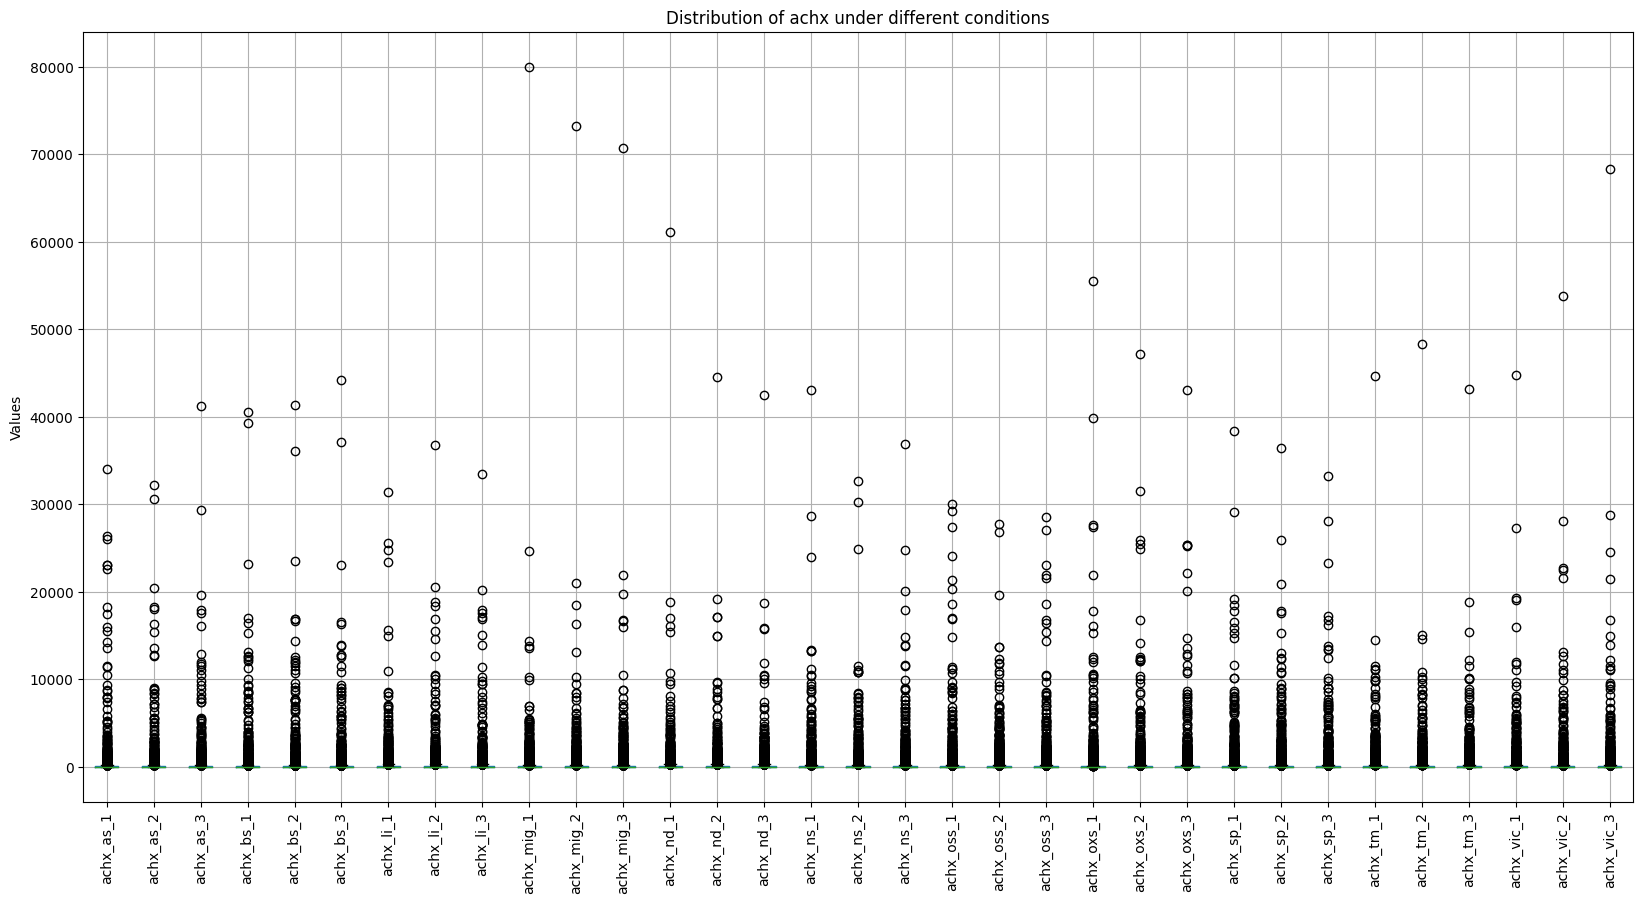


Basic statistics for achx:
          achx_as_1     achx_as_2     achx_as_3     achx_bs_1     achx_bs_2  \
count   5855.000000   5855.000000   5855.000000   5855.000000   5855.000000   
mean     170.153932    170.149162    170.140738    169.978670    169.931950   
std     1096.443185    948.949008    999.447002   1090.057631   1090.713771   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.870894      4.206454      4.010177      3.084521      2.927147   
50%       20.994915     24.792786     21.417301     18.626615     17.837754   
75%       89.456928    103.908914     97.037010     83.535548     84.305029   
max    34030.721020  32189.970650  41211.901590  40501.921150  41358.255450   

          achx_bs_3     achx_li_1     achx_li_2     achx_li_3    achx_mig_1  \
count   5855.000000   5855.000000   5855.000000   5855.000000   5855.000000   
mean     170.007812    170.221010    170.335227    170.380839    169.846302   
std     1091.289906    

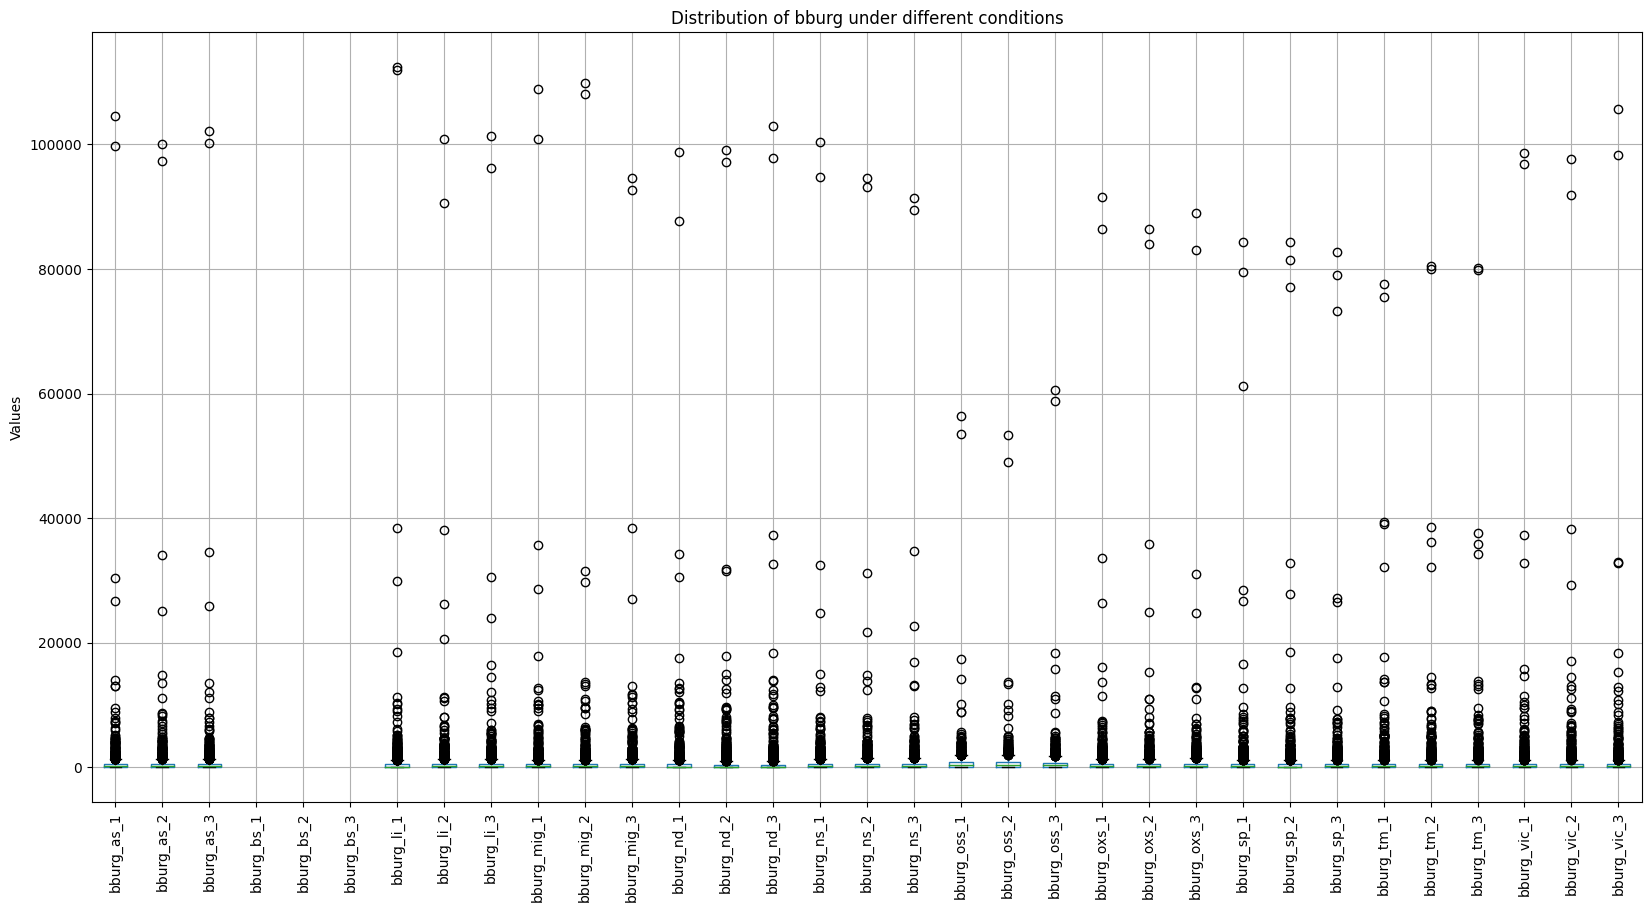


Basic statistics for bburg:
          bburg_as_1     bburg_as_2     bburg_as_3  bburg_bs_1  bburg_bs_2  \
count    1515.000000    1515.000000    1515.000000         0.0         0.0   
mean      658.364825     658.333204     658.175143         NaN         NaN   
std      3971.426032    3865.804047    3941.724068         NaN         NaN   
min         0.000000       0.000000       0.000000         NaN         NaN   
25%         7.085022       7.442012       8.661392         NaN         NaN   
50%       157.385285     168.356114     179.309251         NaN         NaN   
75%       522.515067     536.078262     538.705517         NaN         NaN   
max    104560.029800  100123.348500  102196.378300         NaN         NaN   

       bburg_bs_3     bburg_li_1     bburg_li_2     bburg_li_3    bburg_mig_1  \
count         0.0    1515.000000    1515.000000    1515.000000    1515.000000   
mean          NaN     658.692111     658.286477     658.276019     658.422777   
std           NaN    4375

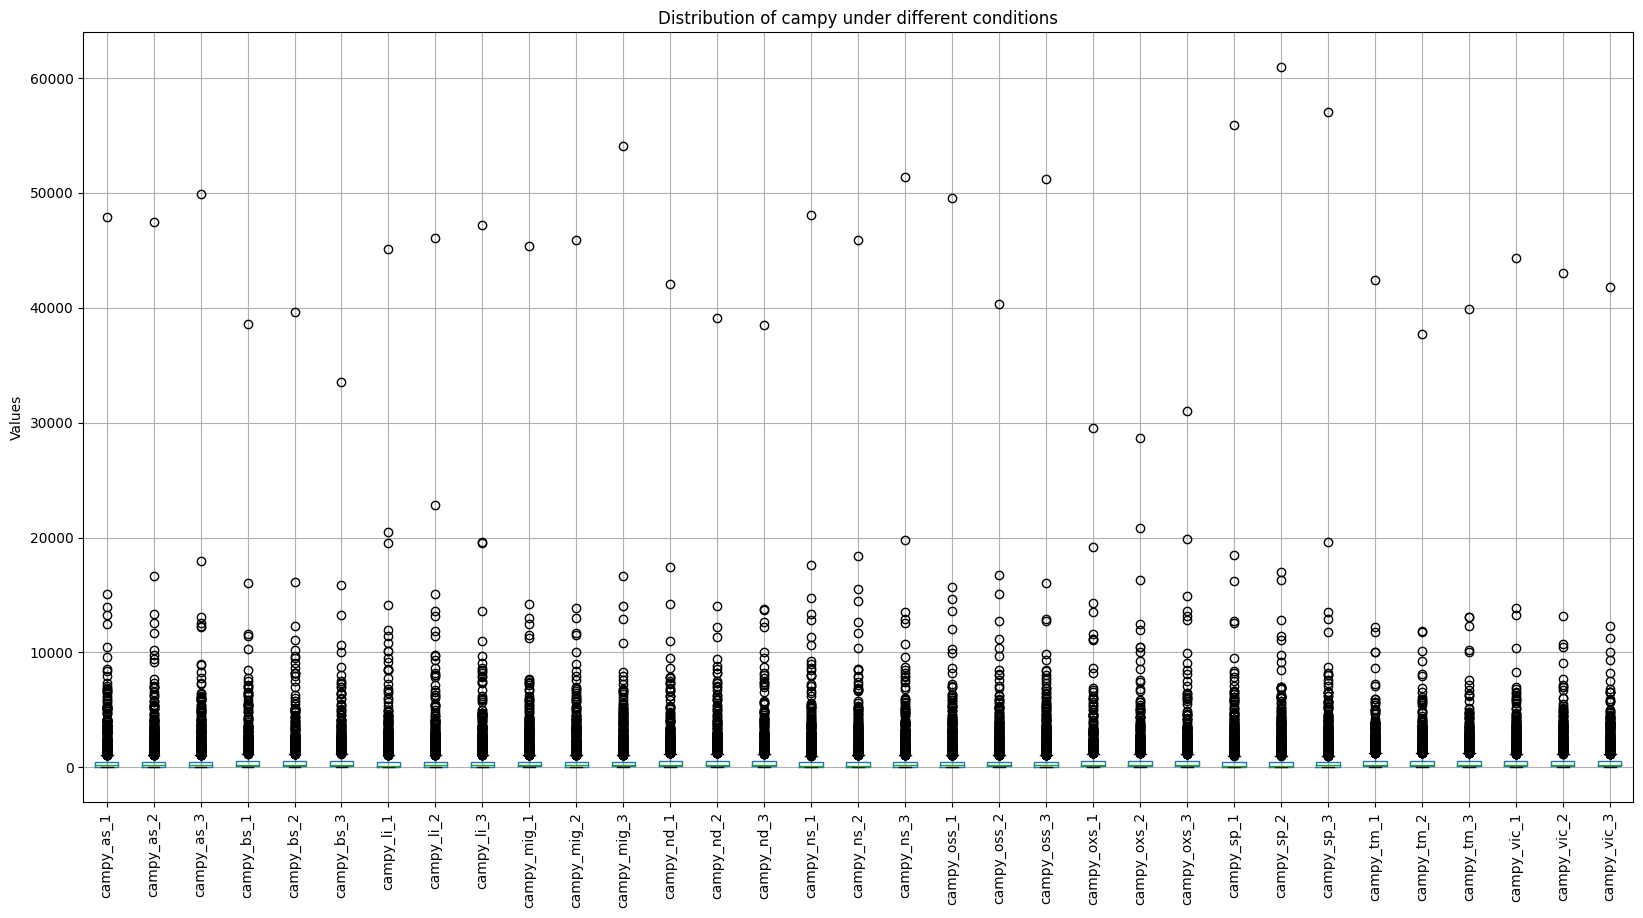


Basic statistics for campy:
         campy_as_1    campy_as_2    campy_as_3    campy_bs_1    campy_bs_2  \
count   1715.000000   1715.000000   1715.000000   1715.000000   1715.000000   
mean     582.487490    582.454510    582.473878    582.235672    582.275012   
std     1688.058174   1672.977387   1718.991107   1442.929454   1483.882474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       55.407064     60.117153     59.160700     90.427649     95.030619   
50%      158.384717    164.124049    164.216648    214.185554    217.494653   
75%      451.653185    451.816702    455.352395    527.035970    506.545790   
max    47871.639870  47506.197170  49901.521720  38550.543010  39629.334520   

         campy_bs_3    campy_li_1    campy_li_2    campy_li_3   campy_mig_1  \
count   1715.000000   1715.000000   1715.000000   1715.000000   1715.000000   
mean     582.159470    582.600850    582.609379    582.565086    582.493847   
std     1347.715227   

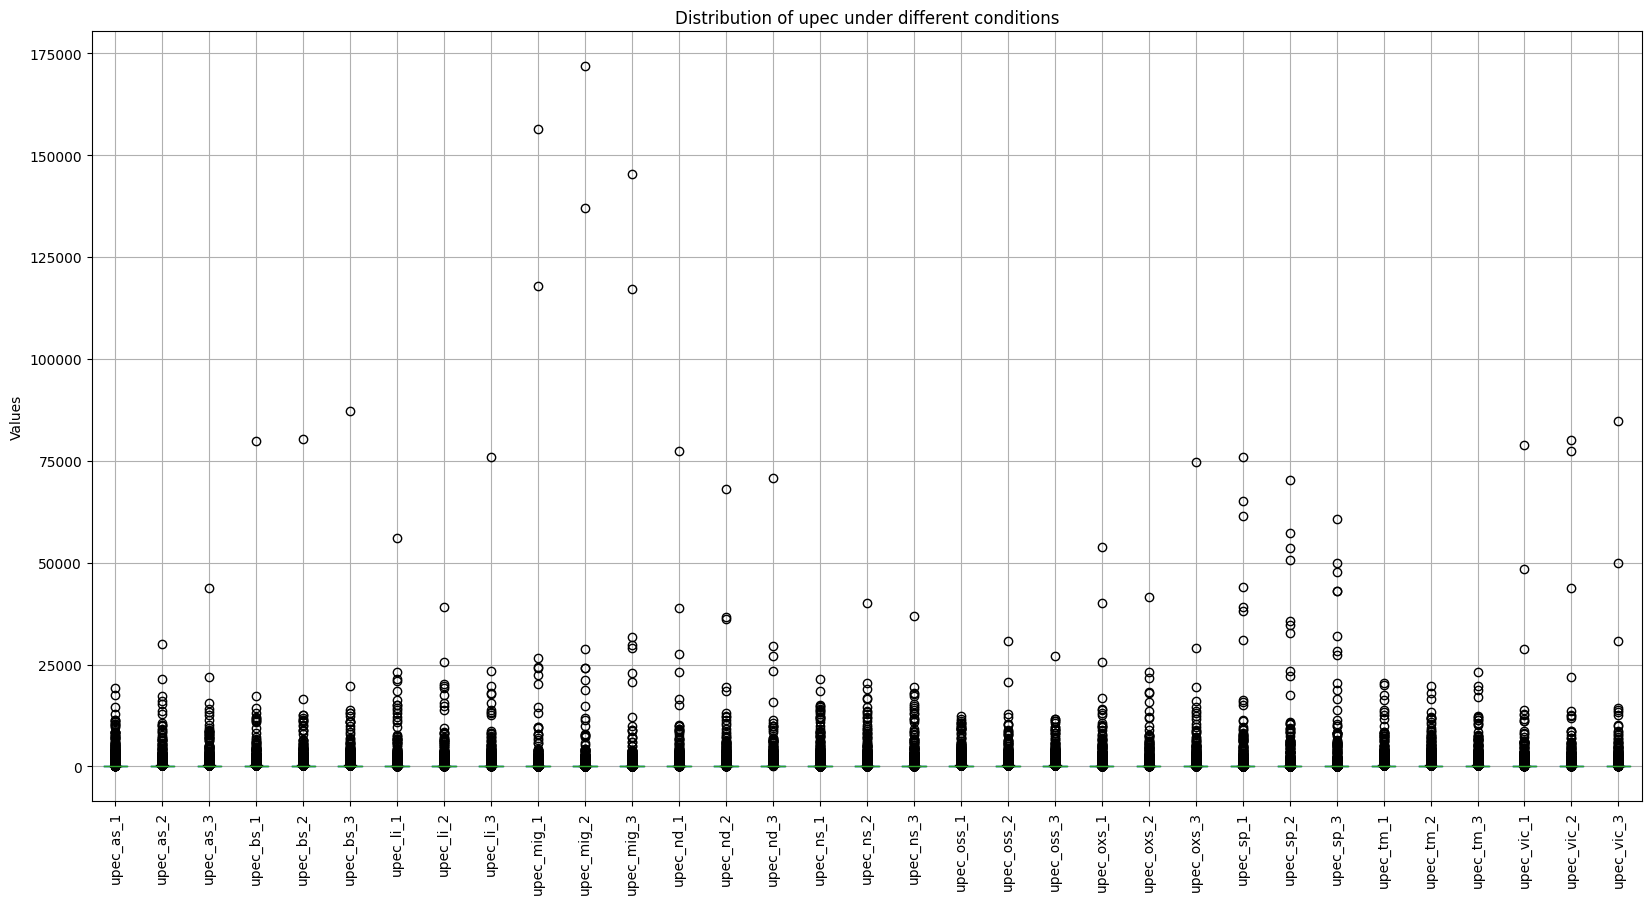


Basic statistics for upec:
          upec_as_1     upec_as_2     upec_as_3     upec_bs_1     upec_bs_2  \
count   4905.000000   4905.000000   4905.000000   4905.000000   4905.000000   
mean     203.873598    203.873598    203.873598    203.873598    203.873598   
std      909.760722    953.172421   1044.492708   1369.298826   1380.830953   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.982248      6.813872      6.855541      5.350775      5.259006   
50%       22.166800     29.178073     27.270715     24.443966     24.216517   
75%       88.730391    106.296399    100.504824     93.718572     93.816624   
max    19139.547480  30049.174340  43748.096150  79743.429480  80334.744860   

          upec_bs_3     upec_li_1     upec_li_2     upec_li_3     upec_mig_1  \
count   4905.000000   4905.000000   4905.000000   4905.000000    4905.000000   
mean     203.873598    203.873598    203.873598    203.873598     203.873598   
std     1472.499603 

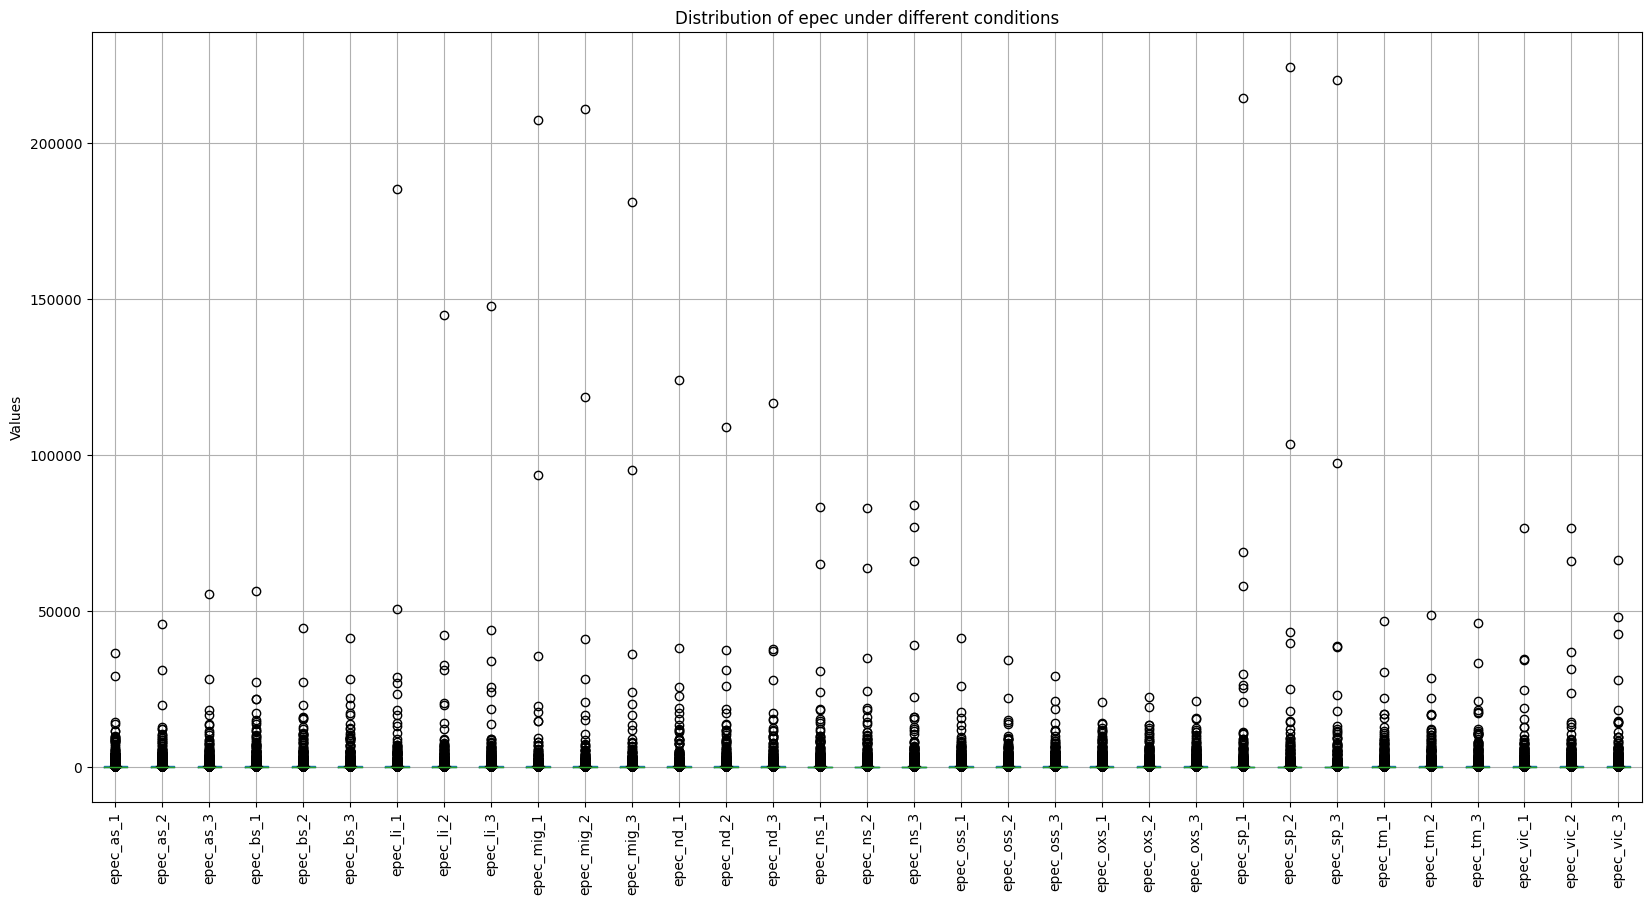


Basic statistics for epec:
          epec_as_1     epec_as_2     epec_as_3     epec_bs_1     epec_bs_2  \
count   5267.000000   5267.000000   5267.000000   5267.000000   5267.000000   
mean     189.861401    189.861401    189.861401    189.861401    189.861401   
std      950.155922   1044.858569   1111.141484   1221.541953   1089.774040   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.377002      6.701353      6.698110      2.665196      2.953876   
50%       30.118170     30.766548     30.820875     15.910223     18.282911   
75%      106.362721    106.419054    108.217934     72.922556     80.123927   
max    36392.788690  45763.191520  55294.527500  56176.369570  44576.647590   

          epec_bs_3      epec_li_1      epec_li_2      epec_li_3  \
count   5267.000000    5267.000000    5267.000000    5267.000000   
mean     189.861401     189.861401     189.861401     189.861401   
std     1101.328046    2793.463585    2271.697530    231

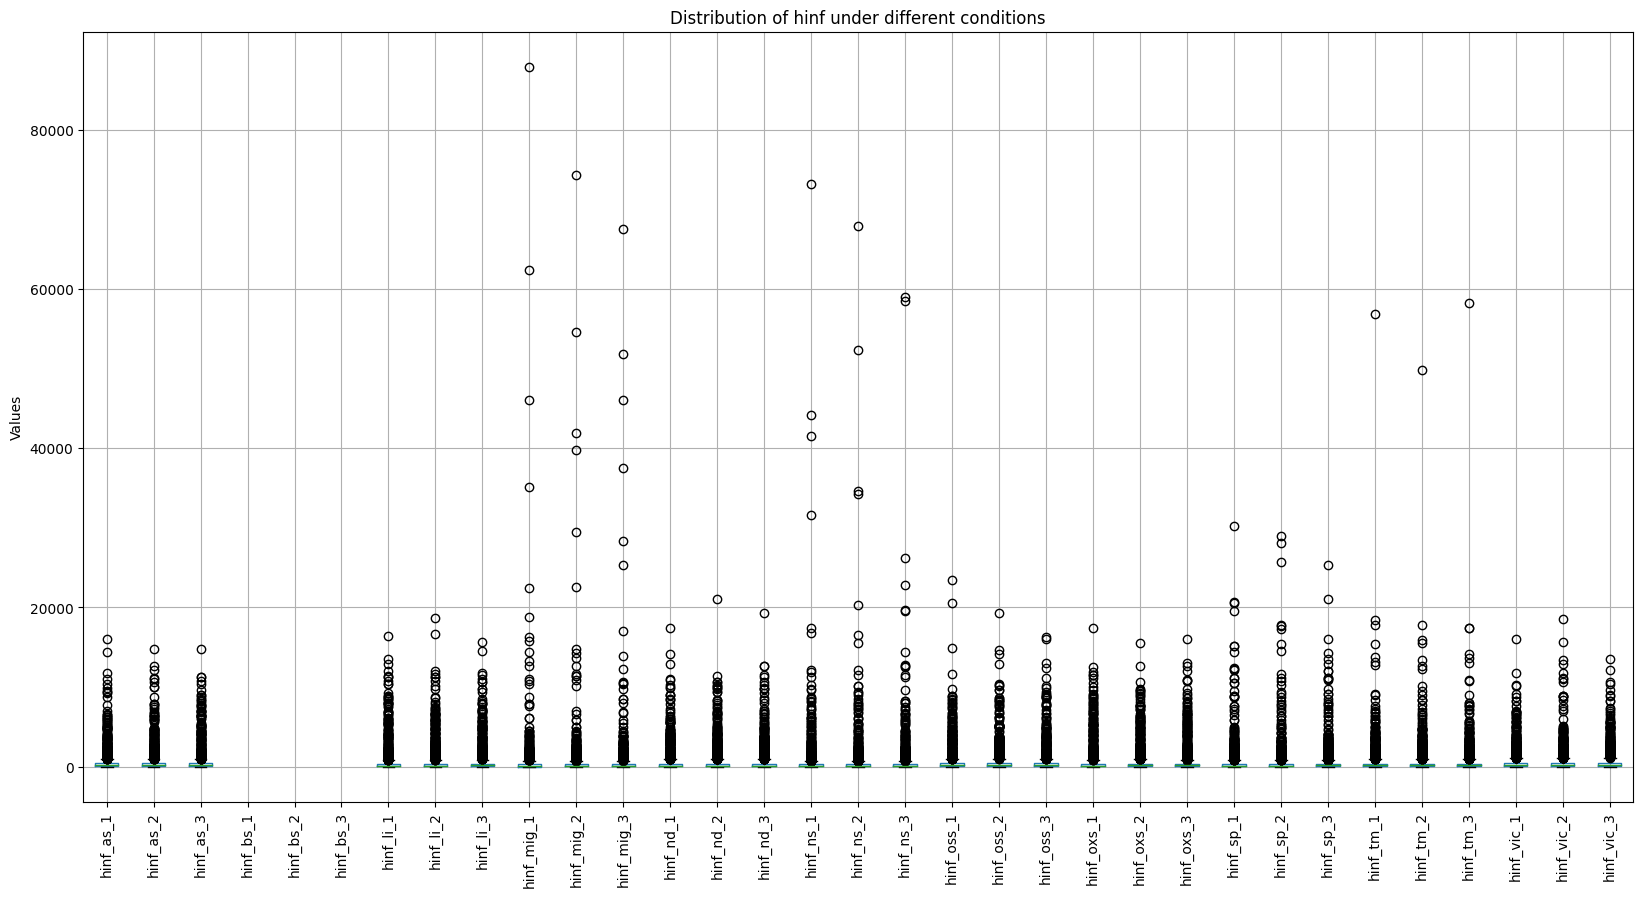


Basic statistics for hinf:
          hinf_as_1     hinf_as_2     hinf_as_3  hinf_bs_1  hinf_bs_2  \
count   1852.000000   1852.000000   1852.000000        0.0        0.0   
mean     537.732105    537.973843    538.808321        NaN        NaN   
std     1199.285818   1210.520757   1254.317581        NaN        NaN   
min        0.000000      0.000000      0.000000        NaN        NaN   
25%       71.553864     72.949661     71.075827        NaN        NaN   
50%      195.318710    196.285139    198.583383        NaN        NaN   
75%      440.788739    421.388058    422.610054        NaN        NaN   
max    16034.966400  14755.177370  14828.270060        NaN        NaN   

       hinf_bs_3     hinf_li_1     hinf_li_2     hinf_li_3    hinf_mig_1  ...  \
count        0.0   1852.000000   1852.000000   1852.000000   1852.000000  ...   
mean         NaN    538.556721    538.412314    538.562685    538.131355  ...   
std          NaN   1418.923426   1369.397951   1329.917695   3099.90181

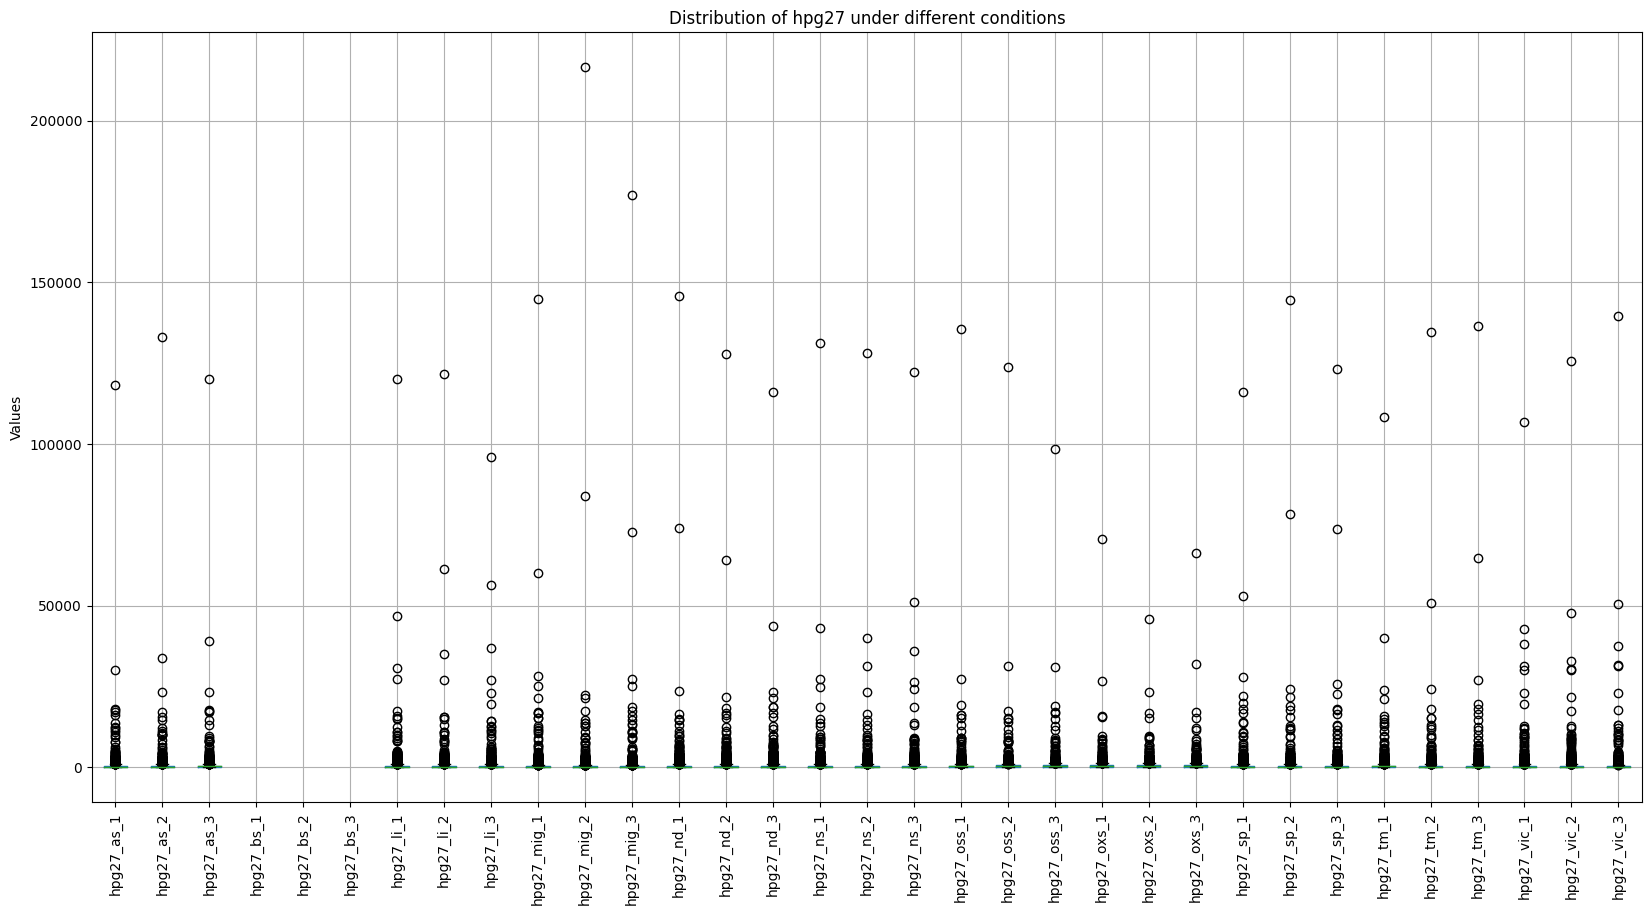


Basic statistics for hpg27:
          hpg27_as_1     hpg27_as_2     hpg27_as_3  hpg27_bs_1  hpg27_bs_2  \
count    1574.000000    1574.000000    1574.000000         0.0         0.0   
mean      635.324015     635.324015     635.324015         NaN         NaN   
std      3332.998761    3684.254915    3437.448482         NaN         NaN   
min         0.000000       0.000000       0.000000         NaN         NaN   
25%        93.781752      97.681022     100.186004         NaN         NaN   
50%       197.789029     200.539959     210.626547         NaN         NaN   
75%       461.160941     450.651619     483.390293         NaN         NaN   
max    118089.530400  132954.266000  120084.566700         NaN         NaN   

       hpg27_bs_3     hpg27_li_1     hpg27_li_2    hpg27_li_3    hpg27_mig_1  \
count         0.0    1574.000000    1574.000000   1574.000000    1574.000000   
mean          NaN     635.324015     635.324015    635.324015     635.324015   
std           NaN    3610.46

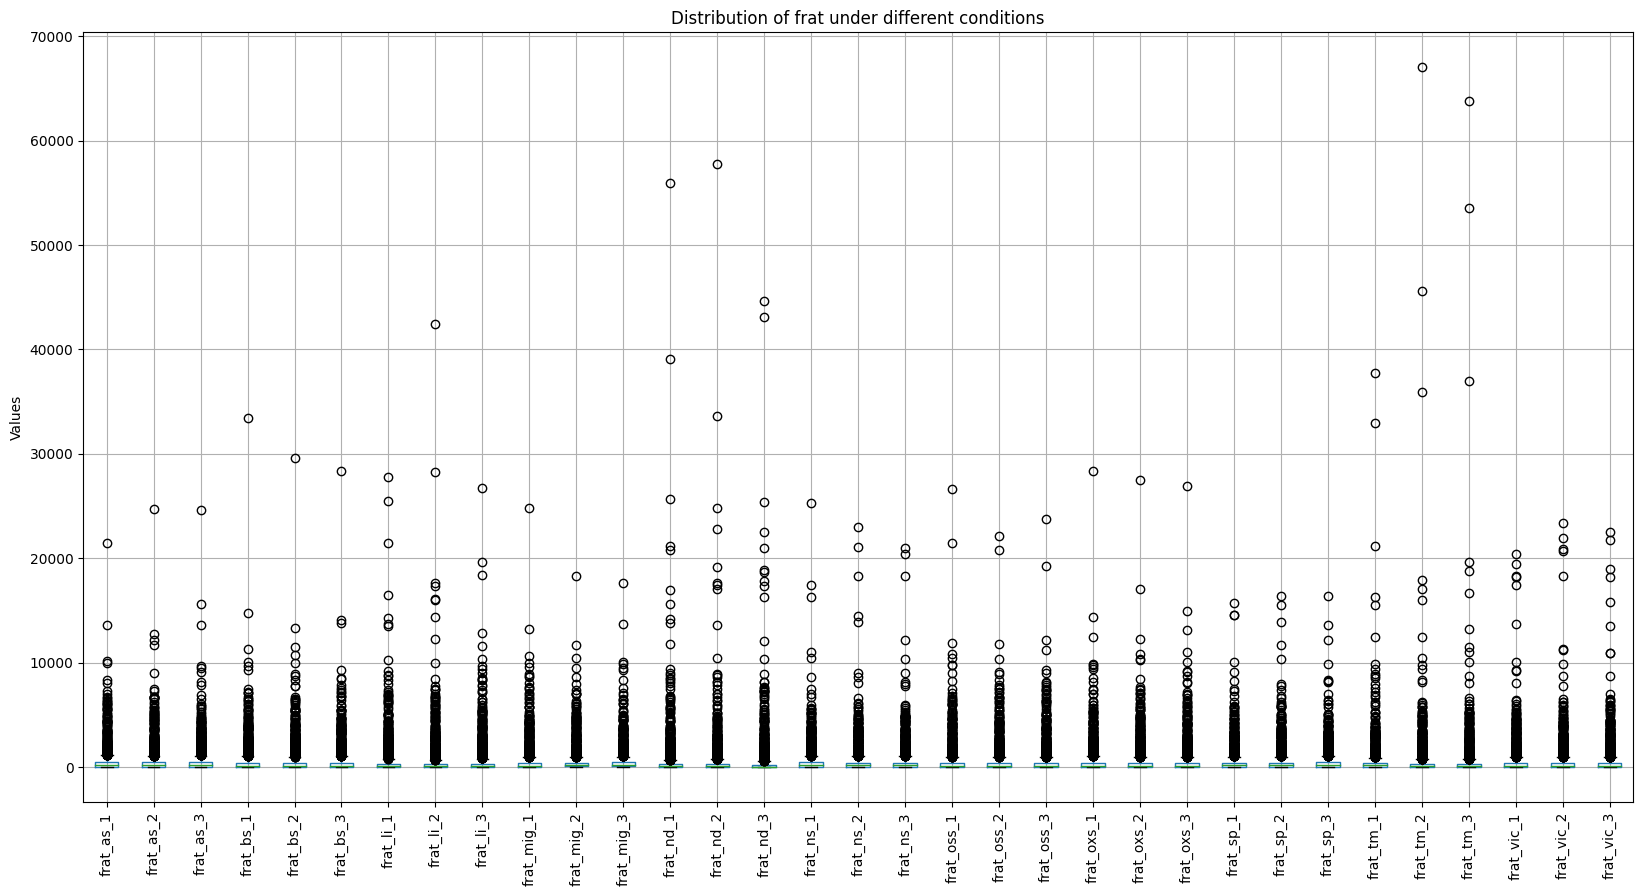


Basic statistics for frat:
          frat_as_1     frat_as_2     frat_as_3     frat_bs_1     frat_bs_2  \
count   1911.000000   1911.000000   1911.000000   1911.000000   1911.000000   
mean     523.286238    523.286238    523.286238    523.286238    523.286238   
std     1130.821267   1192.111818   1184.566448   1331.317948   1303.417570   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       56.014329     47.843876     48.974086     26.931088     26.777213   
50%      200.989090    184.837997    180.450352    136.583683    135.290299   
75%      487.166651    461.773635    480.837553    431.878067    422.402842   
max    21494.655850  24743.615240  24675.504610  33454.604870  29620.281530   

          frat_bs_3     frat_li_1     frat_li_2     frat_li_3    frat_mig_1  \
count   1911.000000   1911.000000   1911.000000   1911.000000   1911.000000   
mean     523.286238    523.286238    523.286238    523.286238    523.286238   
std     1272.964934   1

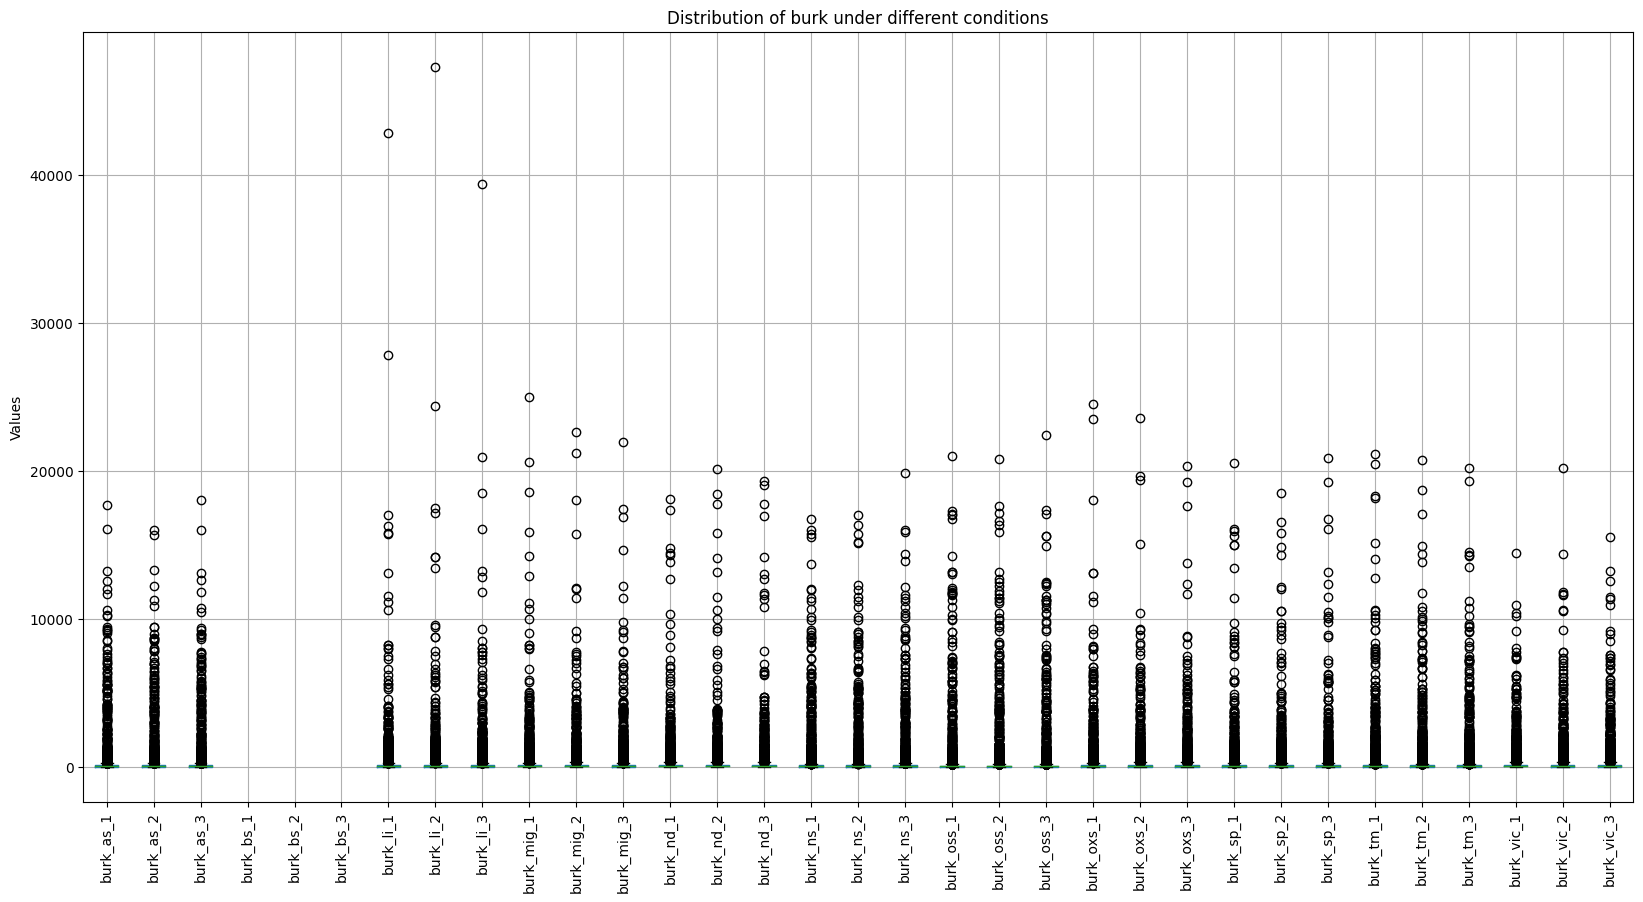


Basic statistics for burk:
          burk_as_1     burk_as_2     burk_as_3  burk_bs_1  burk_bs_2  \
count   5725.000000   5725.000000   5725.000000        0.0        0.0   
mean     174.667283    174.668033    174.666718        NaN        NaN   
std      810.662356    775.272828    789.844424        NaN        NaN   
min        0.000000      0.000000      0.000000        NaN        NaN   
25%        4.862554      5.538165      5.339790        NaN        NaN   
50%       23.842643     26.689214     25.604460        NaN        NaN   
75%       94.101620    101.279543     97.083576        NaN        NaN   
max    17669.152250  16015.046650  18015.199330        NaN        NaN   

       burk_bs_3     burk_li_1     burk_li_2     burk_li_3    burk_mig_1  ...  \
count        0.0   5725.000000   5725.000000   5725.000000   5725.000000  ...   
mean         NaN    174.660003    174.657659    174.653439    174.659238  ...   
std          NaN    964.399418    966.060845    883.872843    784.90883

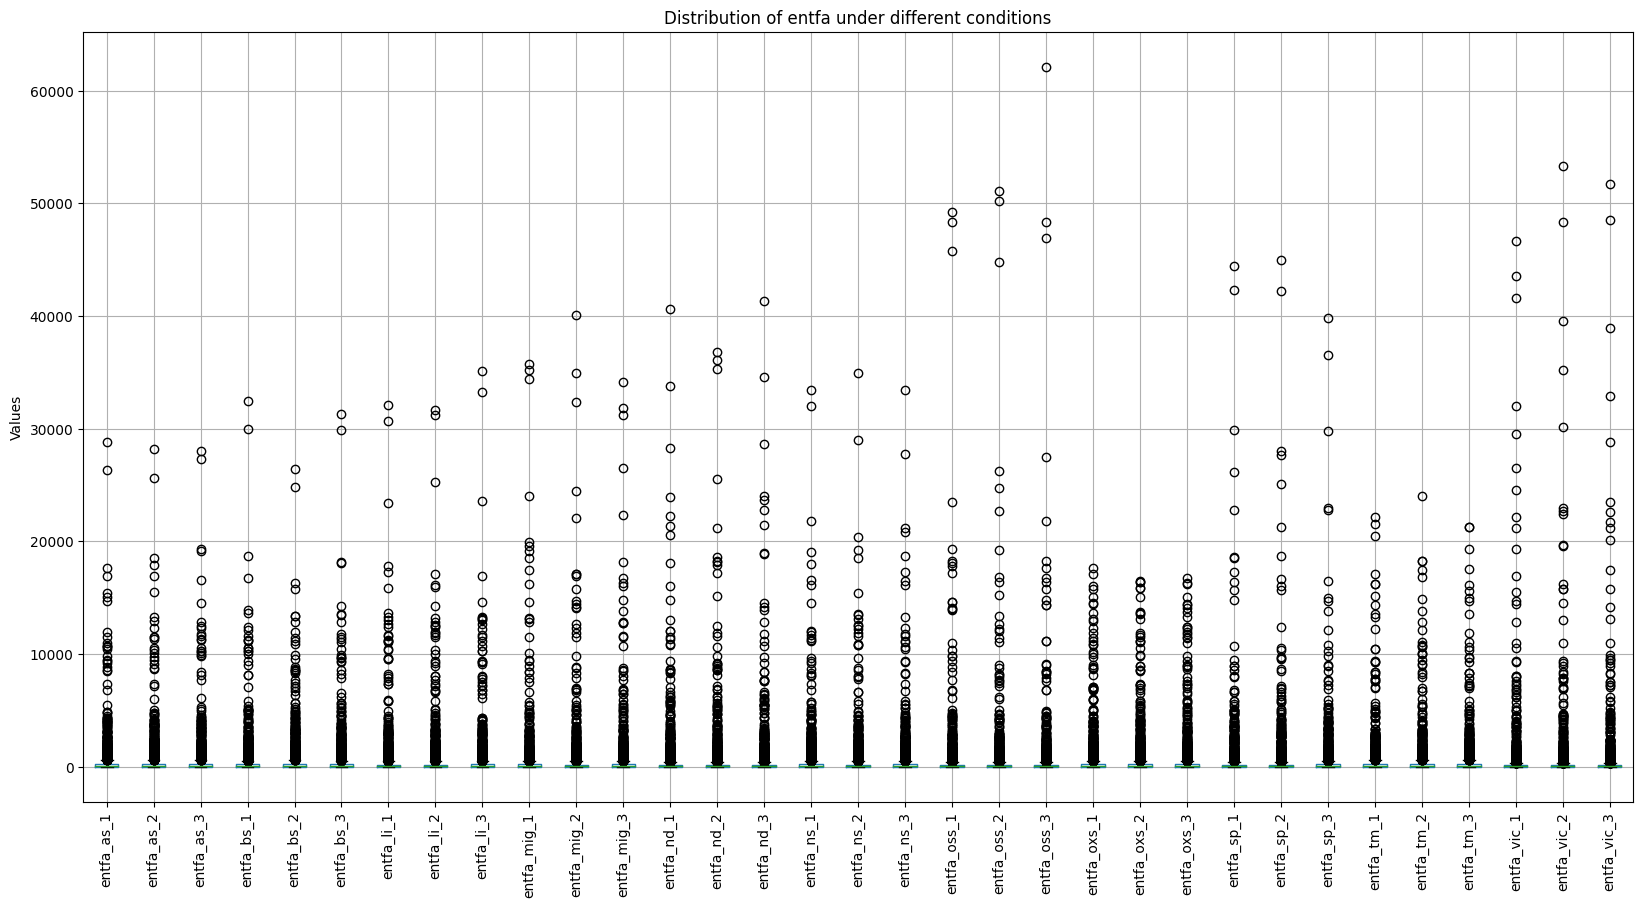


Basic statistics for entfa:
         entfa_as_1    entfa_as_2    entfa_as_3    entfa_bs_1    entfa_bs_2  \
count   2635.000000   2635.000000   2635.000000   2635.000000   2635.000000   
mean     379.392489    379.390587    379.394672    379.438815    379.439499   
std     1378.146071   1389.956321   1415.150413   1439.221783   1326.699124   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.894074     16.915714     17.297409     13.732898     11.999742   
50%       80.751156     80.117285     78.150006     61.937462     58.936321   
75%      252.476286    250.306344    246.530835    222.272028    232.251100   
max    28820.931180  28205.071880  28038.802580  32448.097030  26397.509630   

         entfa_bs_3    entfa_li_1    entfa_li_2    entfa_li_3   entfa_mig_1  \
count   2635.000000   2635.000000   2635.000000   2635.000000   2635.000000   
mean     379.453296    379.463847    379.452627    379.447135    379.424645   
std     1445.928872   

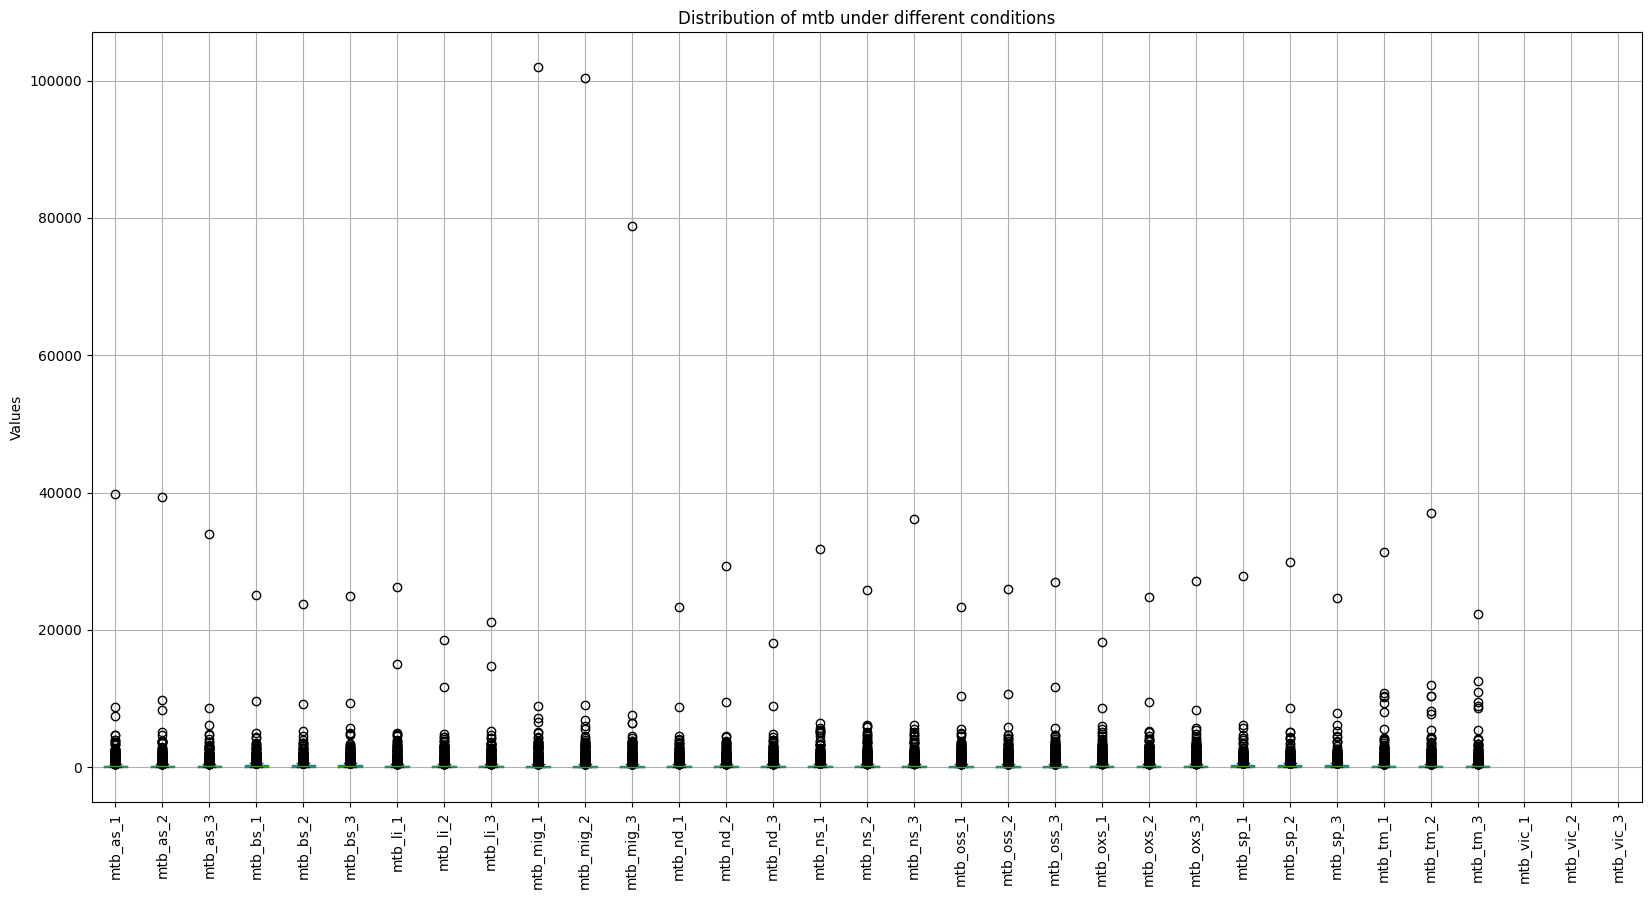


Basic statistics for mtb:
           mtb_as_1      mtb_as_2      mtb_as_3      mtb_bs_1      mtb_bs_2  \
count   4244.000000   4244.000000   4244.000000   4244.000000   4244.000000   
mean     235.425323    235.386717    235.380595    235.362569    235.360192   
std      708.468416    710.798112    631.126877    516.423775    501.617909   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       62.639876     62.005529     63.433240     64.485941     66.018258   
50%      125.451225    124.838919    125.909261    131.149937    130.823227   
75%      249.058547    249.318005    251.468787    263.605893    262.031175   
max    39762.005000  39321.242490  33978.119520  25061.965970  23746.492270   

           mtb_bs_3      mtb_li_1      mtb_li_2      mtb_li_3      mtb_mig_1  \
count   4244.000000   4244.000000   4244.000000   4244.000000    4244.000000   
mean     235.353748    235.353858    235.291859    235.329233     235.530816   
std      523.730999  

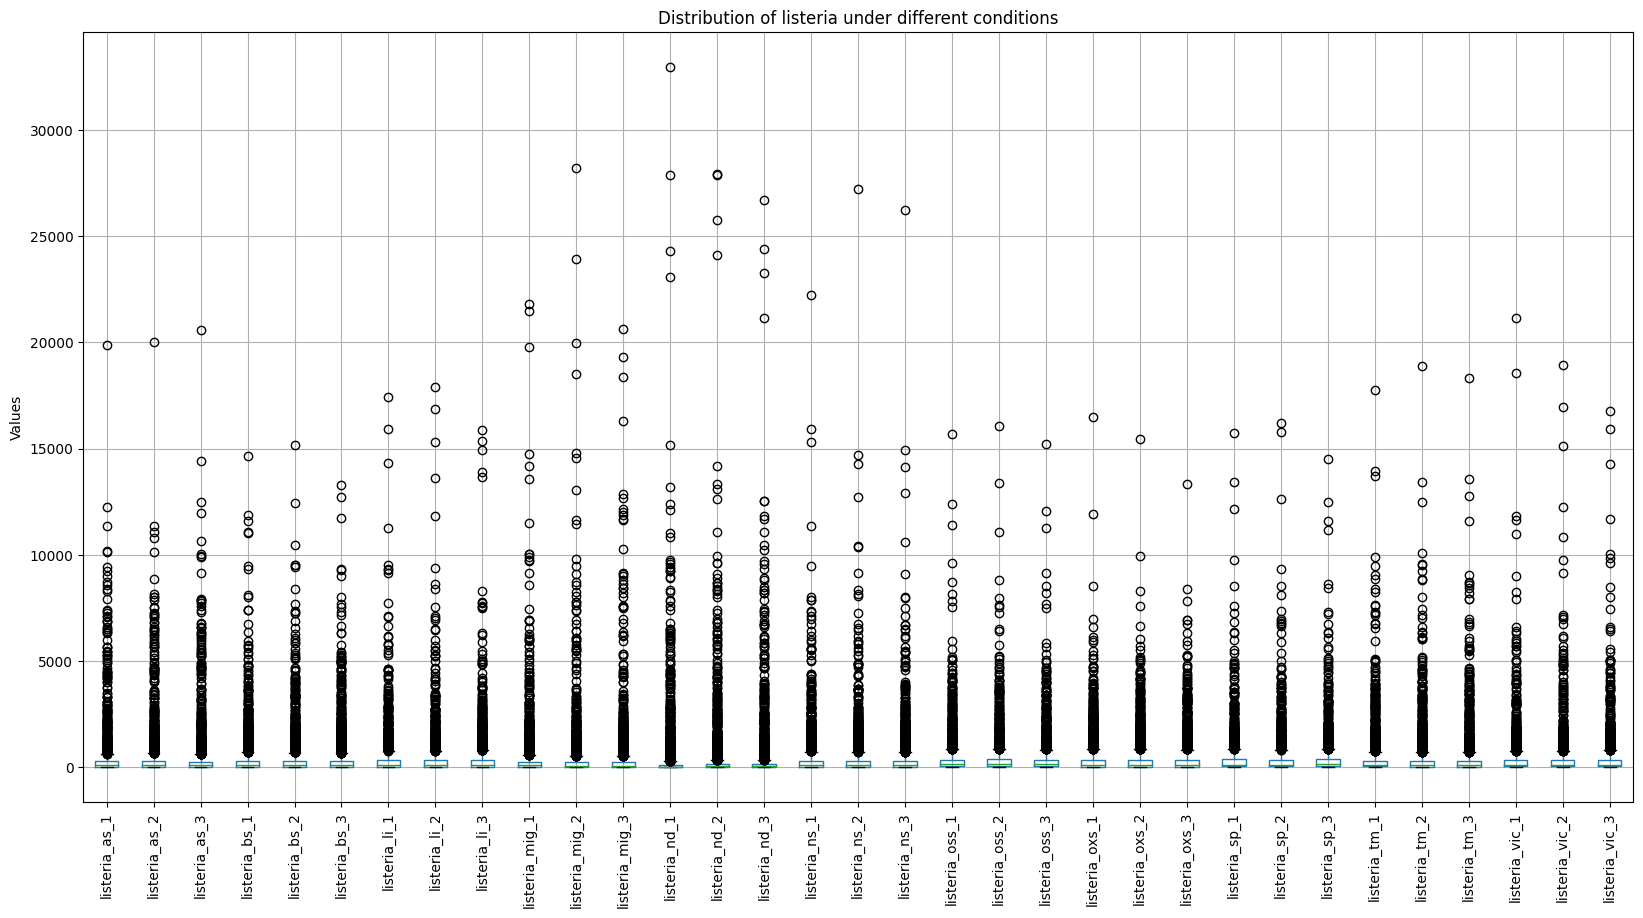


Basic statistics for listeria:
       listeria_as_1  listeria_as_2  listeria_as_3  listeria_bs_1  \
count    2867.000000    2867.000000    2867.000000    2867.000000   
mean      348.796652     348.796652     348.796652     348.796652   
std      1042.124089    1018.152255    1077.257005     899.268807   
min         0.000000       0.000000       0.000000       0.000000   
25%        14.319097      15.415388      13.269620      21.762033   
50%        81.487917      82.057704      76.105573     109.992709   
75%       262.730998     264.472640     253.241850     290.216823   
max     19875.297470   20002.680010   20565.417150   14644.189550   

       listeria_bs_2  listeria_bs_3  listeria_li_1  listeria_li_2  \
count    2867.000000    2867.000000    2867.000000    2867.000000   
mean      348.796652     348.796652     348.796652     348.796652   
std       892.622435     903.918954     919.796855     948.496986   
min         0.000000       0.000000       0.000000       0.000000   
2

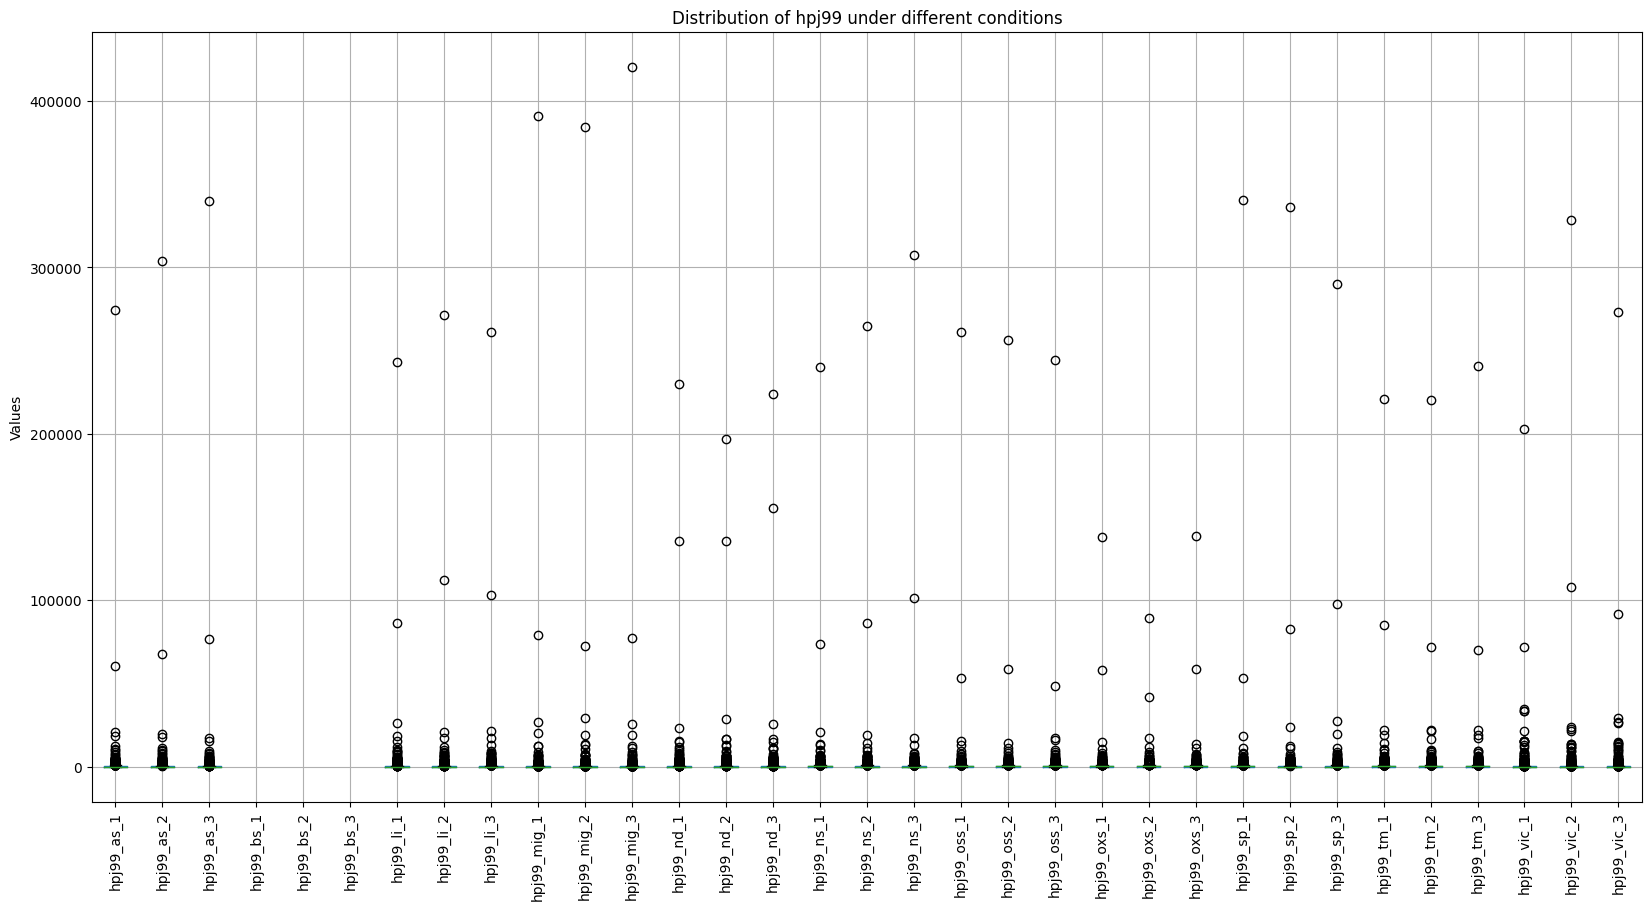


Basic statistics for hpj99:
          hpj99_as_1     hpj99_as_2     hpj99_as_3  hpj99_bs_1  hpj99_bs_2  \
count    1562.000000    1562.000000    1562.000000         0.0         0.0   
mean      640.204866     640.204866     640.204866         NaN         NaN   
std      7177.592245    7942.826915    8853.934661         NaN         NaN   
min         0.000000       0.000000       0.000000         NaN         NaN   
25%        66.665462      62.782901      60.177761         NaN         NaN   
50%       159.143549     143.737873     139.463126         NaN         NaN   
75%       362.664833     341.891353     330.351523         NaN         NaN   
max    274345.483200  304202.397700  339901.455100         NaN         NaN   

       hpj99_bs_3     hpj99_li_1     hpj99_li_2     hpj99_li_3    hpj99_mig_1  \
count         0.0    1562.000000    1562.000000    1562.000000    1562.000000   
mean          NaN     640.204866     640.204866     640.204866     640.204866   
std           NaN    6645

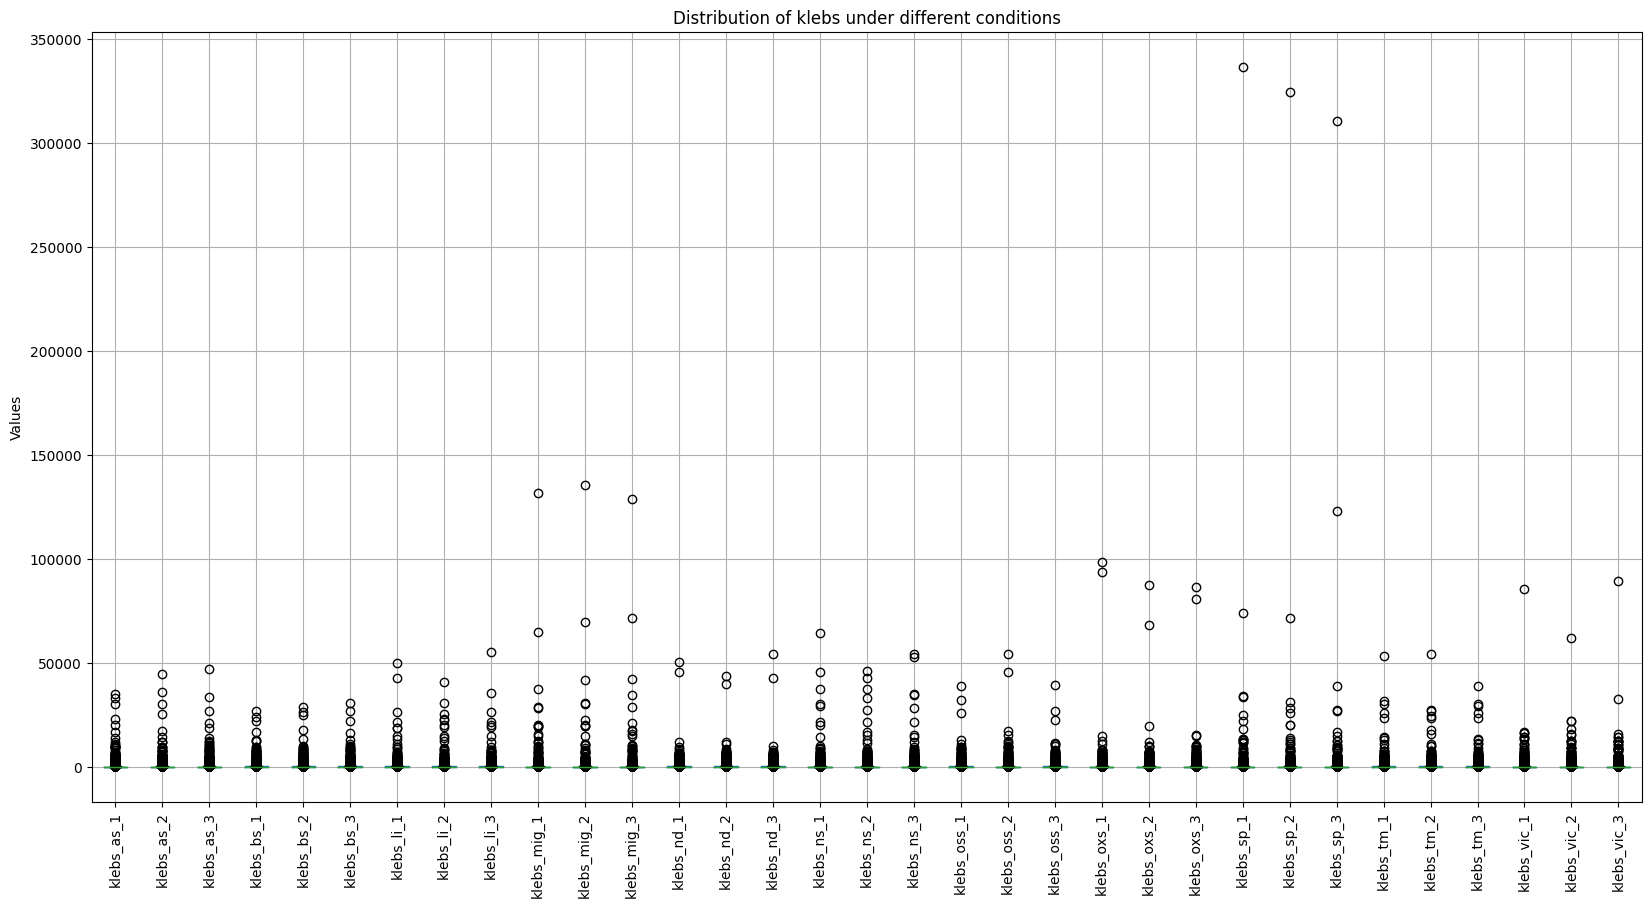


Basic statistics for klebs:
         klebs_as_1    klebs_as_2    klebs_as_3    klebs_bs_1    klebs_bs_2  \
count   5607.000000   5607.000000   5607.000000   5607.000000   5607.000000   
mean     178.456894    178.477200    178.499034    178.399624    178.381496   
std     1116.285389   1164.475019   1144.152337    876.417967    892.850357   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.630606      4.512099      4.264880      5.509577      5.859916   
50%       15.199758     16.980460     17.196727     23.321669     24.346949   
75%       59.283563     63.181998     64.658706     84.100442     86.864411   
max    34757.028530  44731.258320  46876.195480  26959.808620  28729.882160   

         klebs_bs_3    klebs_li_1    klebs_li_2    klebs_li_3    klebs_mig_1  \
count   5607.000000   5607.000000   5607.000000   5607.000000    5607.000000   
mean     178.409816    178.440949    178.404653    178.450565     178.708405   
std      901.221486

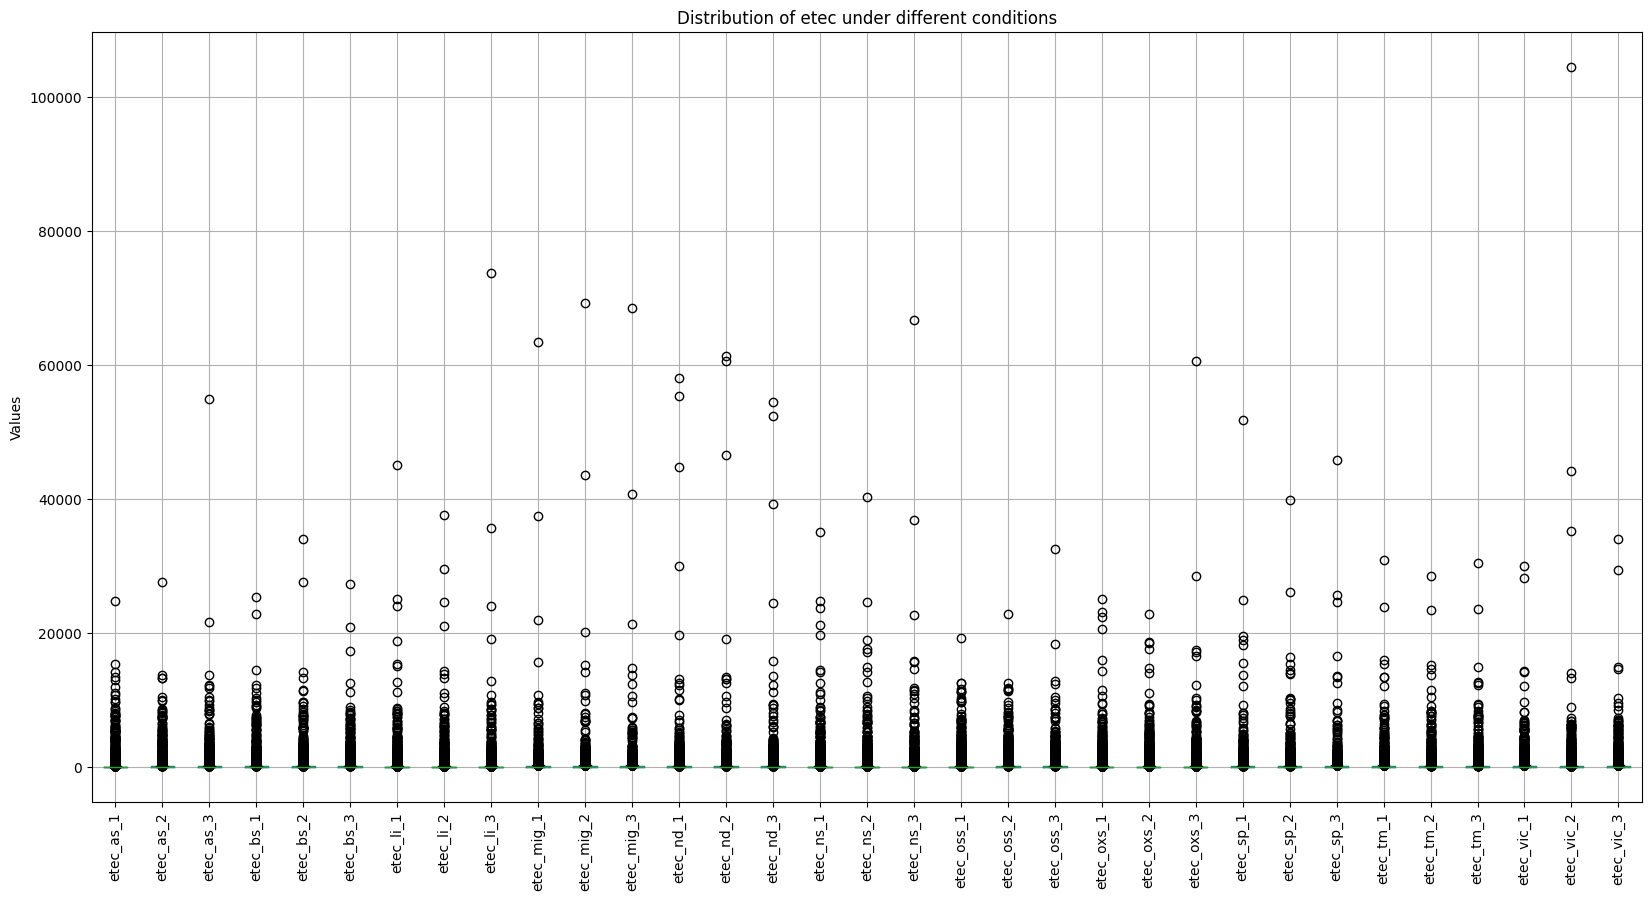


Basic statistics for etec:
          etec_as_1     etec_as_2     etec_as_3     etec_bs_1     etec_bs_2  \
count   5508.000000   5508.000000   5508.000000   5508.000000   5508.000000   
mean     181.554103    181.554103    181.554103    181.554103    181.554103   
std      886.402573    820.384889   1054.591685    849.359170    924.943529   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.592972      4.783805      4.114371      3.291896      2.948164   
50%       17.043558     22.026214     19.683933     17.966268     17.120528   
75%       75.890259     89.782264     82.759889     85.326037     81.411349   
max    24824.815750  27582.505510  54887.545050  25351.462890  33982.676540   

          etec_bs_3     etec_li_1     etec_li_2     etec_li_3    etec_mig_1  \
count   5508.000000   5508.000000   5508.000000   5508.000000   5508.000000   
mean     181.554103    181.554103    181.554103    181.554103    181.554103   
std      831.222366   1

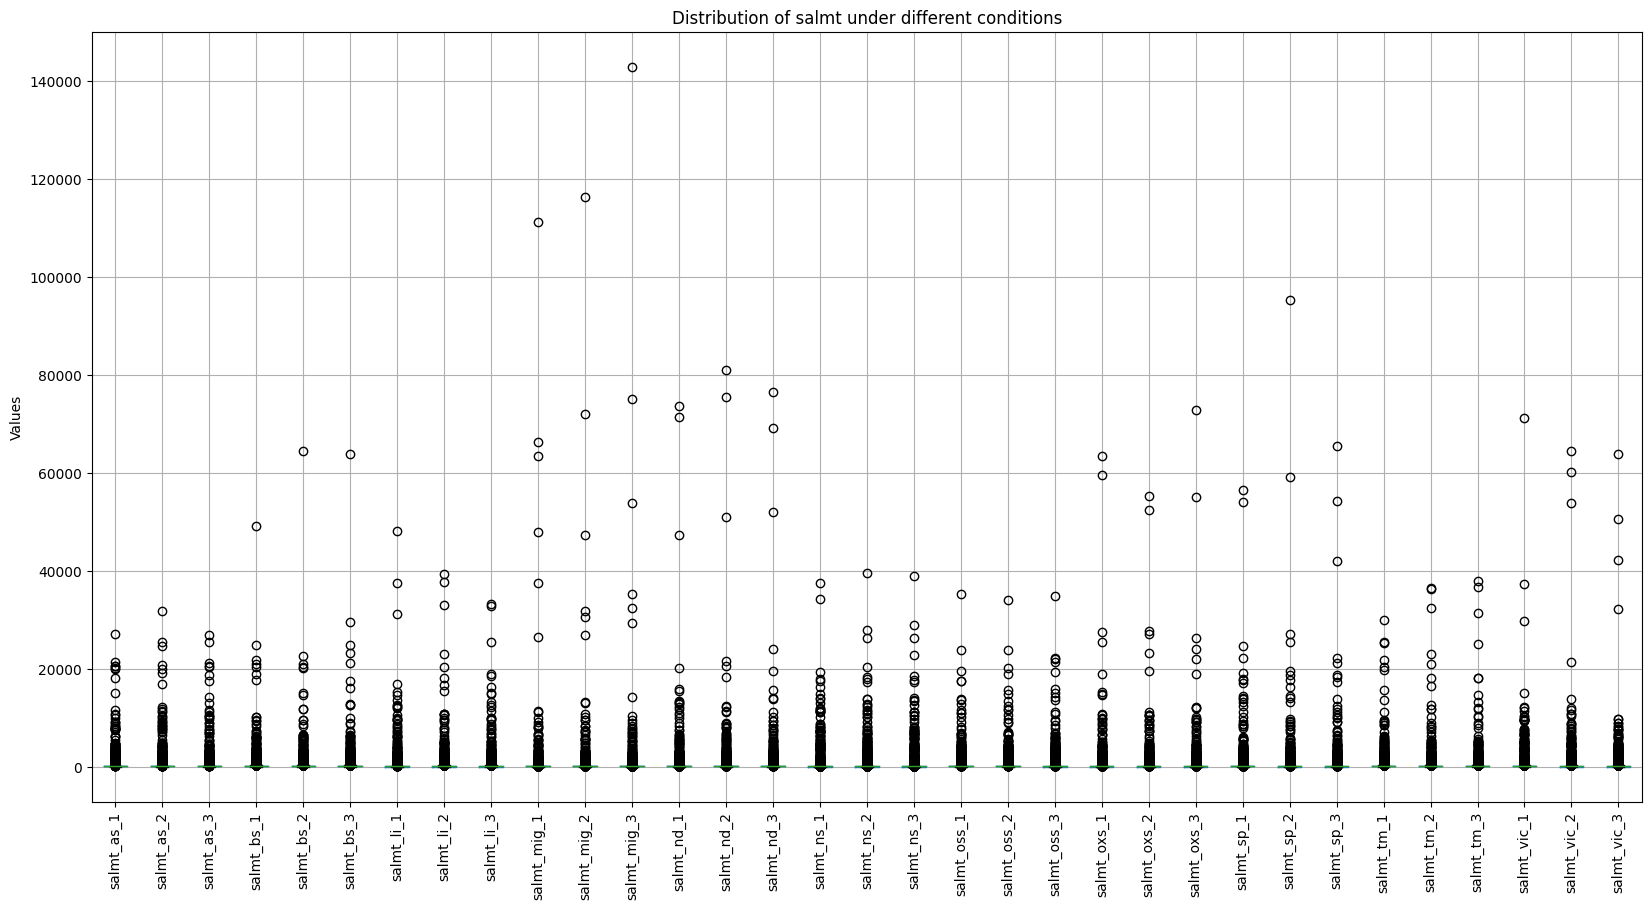


Basic statistics for salmt:
         salmt_as_1    salmt_as_2    salmt_as_3    salmt_bs_1    salmt_bs_2  \
count   5136.000000   5136.000000   5136.000000   5136.000000   5136.000000   
mean     194.704050    194.704050    194.704050    194.704050    194.704050   
std     1035.651809   1088.954618   1058.269932   1148.432131   1255.134813   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.533427      5.933310      6.706813      6.742929      6.873299   
50%       25.158643     24.799211     25.582038     29.587510     29.821134   
75%       86.753731     86.676667     85.939633     95.214128     98.082664   
max    27044.845220  31781.489570  26883.630660  49175.032090  64471.886150   

         salmt_bs_3    salmt_li_1    salmt_li_2    salmt_li_3    salmt_mig_1  \
count   5136.000000   5136.000000   5136.000000   5136.000000    5136.000000   
mean     194.704050    194.704050    194.704050    194.704050     194.704050   
std     1318.901823

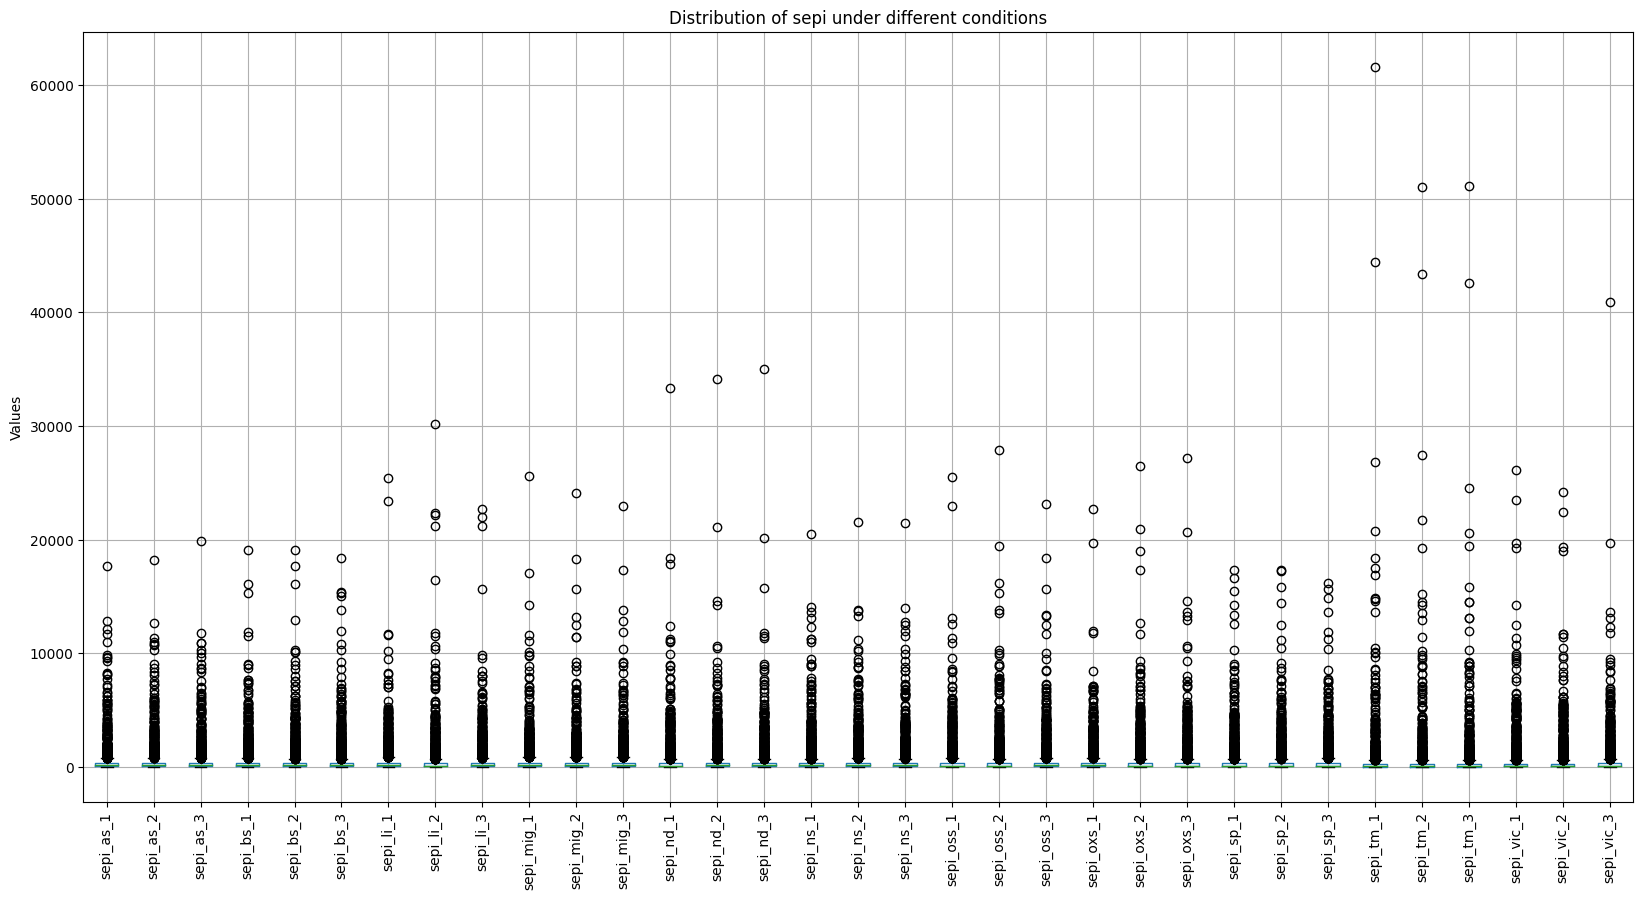


Basic statistics for sepi:
          sepi_as_1     sepi_as_2     sepi_as_3     sepi_bs_1     sepi_bs_2  \
count   2350.000000   2350.000000   2350.000000   2350.000000   2350.000000   
mean     425.231553    425.247077    425.222473    425.330047    425.334960   
std     1068.833703   1058.541262   1054.125414   1109.882994   1151.789163   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       47.875128     47.040850     49.065239     41.350171     42.151316   
50%      149.366597    151.352335    153.063832    126.048891    122.297669   
75%      341.350819    350.934091    341.753627    320.016540    310.005198   
max    17682.107790  18162.103710  19876.212830  19057.060370  19118.870000   

          sepi_bs_3     sepi_li_1     sepi_li_2     sepi_li_3    sepi_mig_1  \
count   2350.000000   2350.000000   2350.000000   2350.000000   2350.000000   
mean     425.335178    425.359497    425.392146    425.360239    425.356491   
std     1176.905247   1

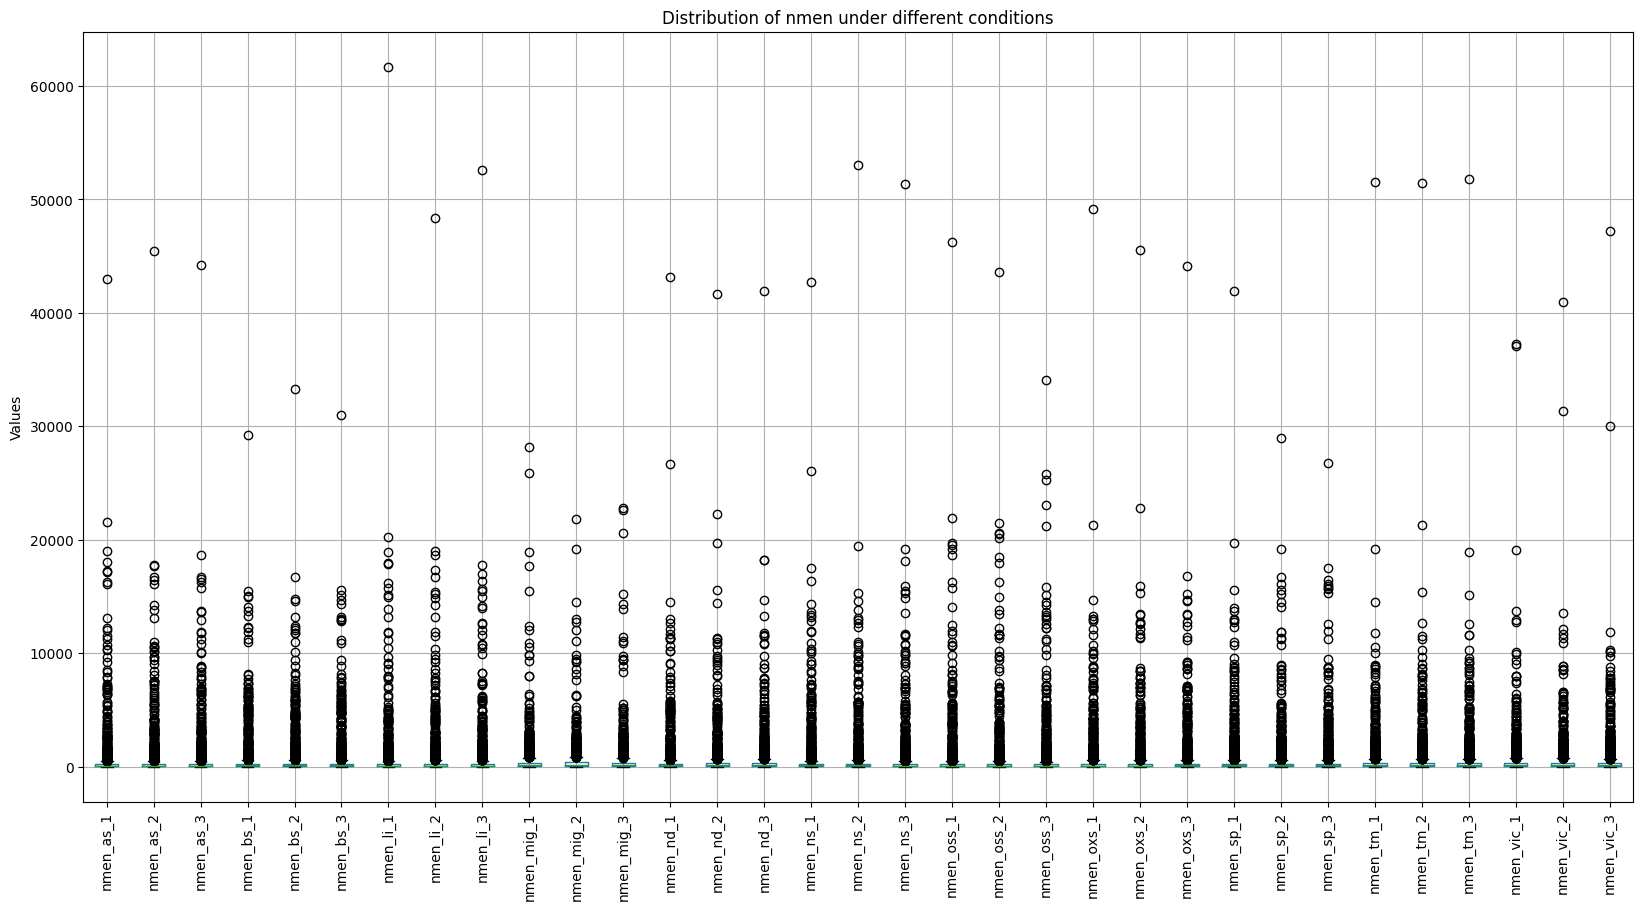


Basic statistics for nmen:
          nmen_as_1     nmen_as_2     nmen_as_3     nmen_bs_1     nmen_bs_2  \
count   2461.000000   2461.000000   2461.000000   2461.000000   2461.000000   
mean     406.338887    406.338887    406.338887    406.338887    406.338887   
std     1641.363605   1608.684421   1584.443577   1356.846753   1380.755625   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       36.601912     35.416603     37.144510     39.964623     37.826105   
50%       94.947533     95.378046    100.428311    108.921898    105.329939   
75%      229.029506    231.309306    235.225423    265.504760    263.850670   
max    42972.855130  45450.480060  44206.254220  29208.412940  33280.489650   

          nmen_bs_3     nmen_li_1     nmen_li_2     nmen_li_3    nmen_mig_1  \
count   2461.000000   2461.000000   2461.000000   2461.000000   2461.000000   
mean     406.338887    406.338887    406.338887    406.338887    406.338887   
std     1374.335529   1

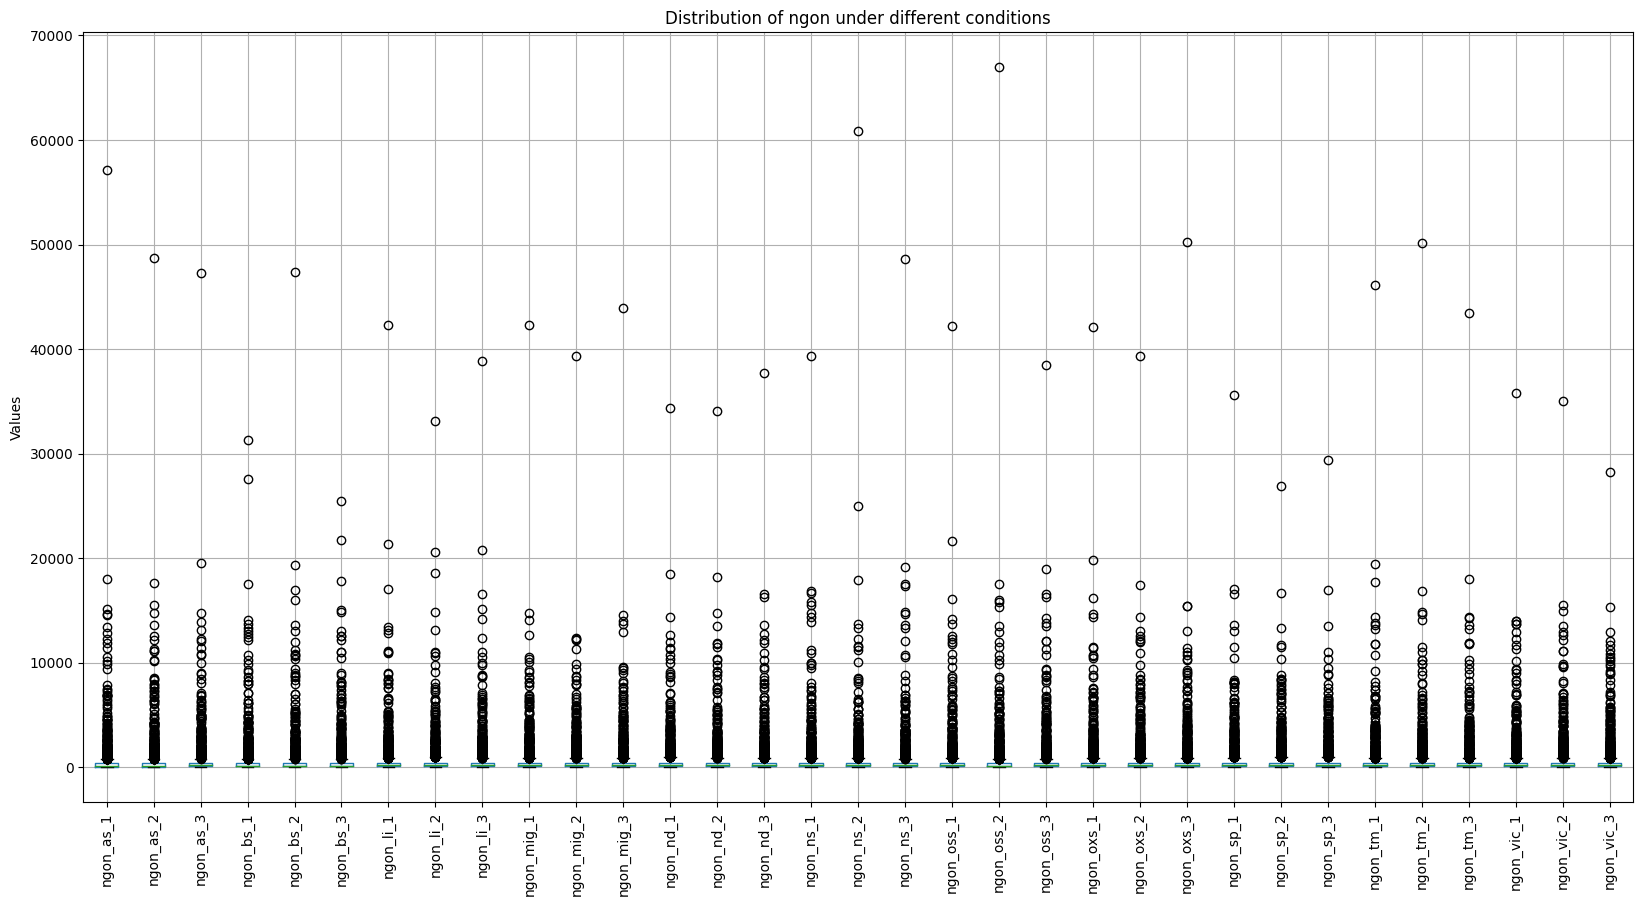


Basic statistics for ngon:
          ngon_as_1     ngon_as_2     ngon_as_3     ngon_bs_1     ngon_bs_2  \
count   1885.000000   1885.000000   1885.000000   1885.000000   1885.000000   
mean     530.301987    530.302534    530.312722    530.344157    530.337136   
std     1863.091259   1724.973166   1673.753746   1609.325410   1720.405372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       72.622979     74.268959     77.794627     75.273655     76.375540   
50%      167.114485    169.494136    180.756178    164.312714    167.089537   
75%      367.987985    372.153535    381.653083    373.970333    374.545094   
max    57097.220610  48671.911280  47306.669540  31258.475420  47402.932570   

          ngon_bs_3     ngon_li_1     ngon_li_2     ngon_li_3    ngon_mig_1  \
count   1885.000000   1885.000000   1885.000000   1885.000000   1885.000000   
mean     530.301480    530.264788    530.257316    530.251302    530.221588   
std     1508.984832   1

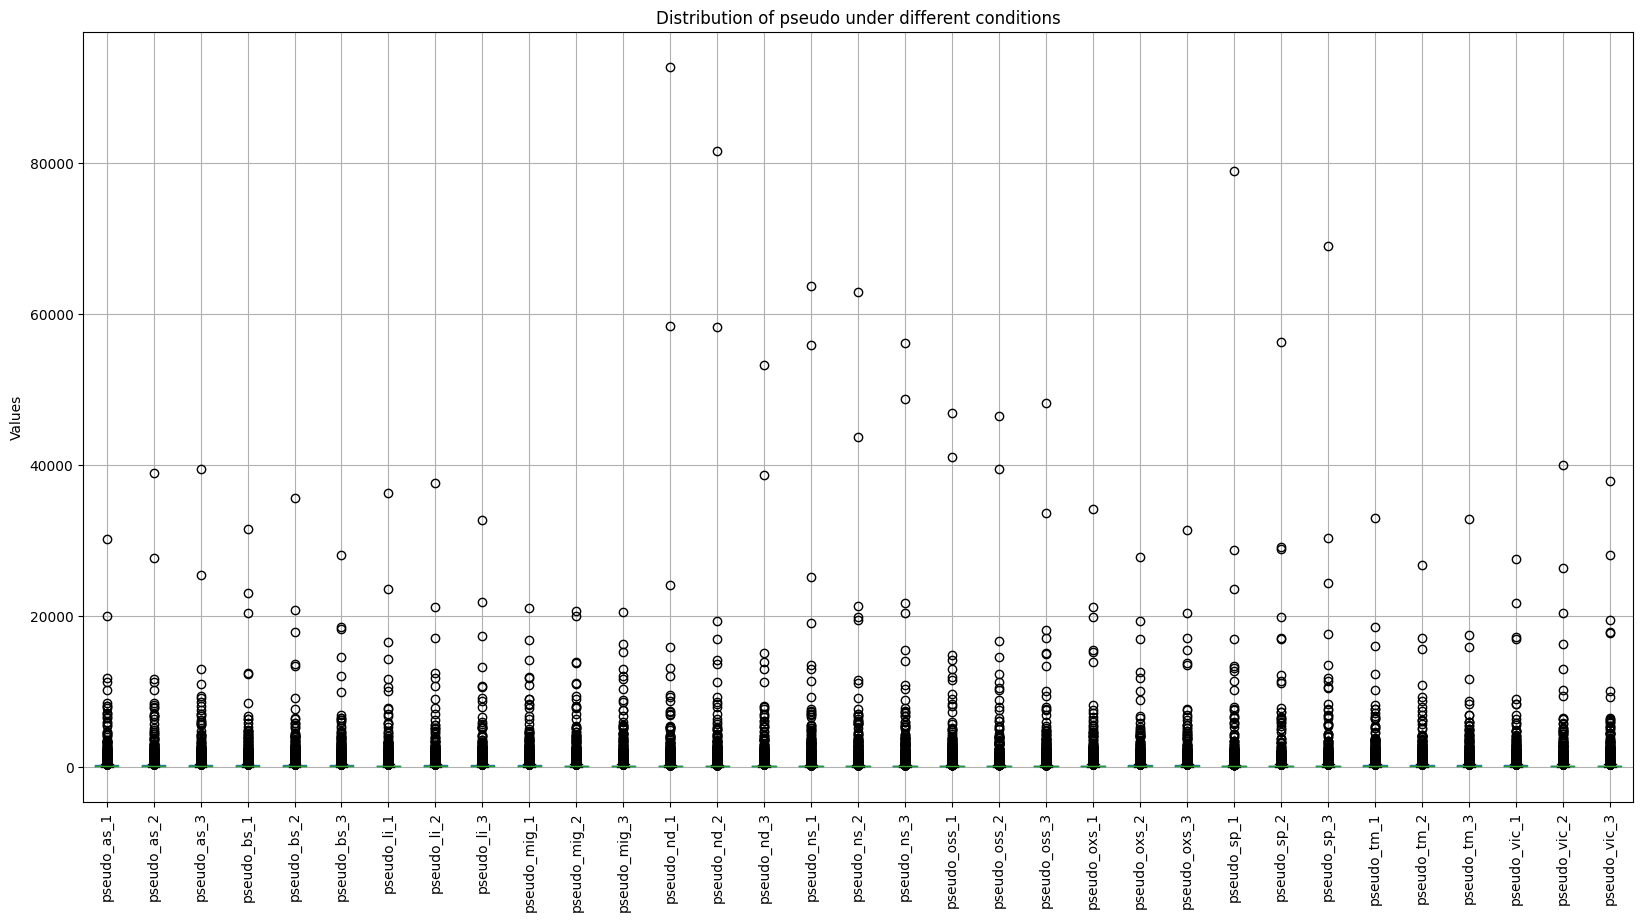


Basic statistics for pseudo:
        pseudo_as_1   pseudo_as_2   pseudo_as_3   pseudo_bs_1   pseudo_bs_2  \
count   5572.000000   5572.000000   5572.000000   5572.000000   5572.000000   
mean     179.468772    179.468772    179.468772    179.468772    179.468772   
std      713.499791    818.262926    813.984569    753.340968    775.355657   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.979805     19.655360     20.037278     23.547814     22.924534   
50%       59.439828     59.020569     59.376125     60.210956     59.071987   
75%      141.621553    141.278313    141.949409    138.728758    136.924770   
max    30175.410520  38895.599850  39490.869760  31499.112040  35635.841310   

        pseudo_bs_3   pseudo_li_1   pseudo_li_2   pseudo_li_3  pseudo_mig_1  \
count   5572.000000   5572.000000   5572.000000   5572.000000   5572.000000   
mean     179.468772    179.468772    179.468772    179.468772    179.468772   
std      712.019278  

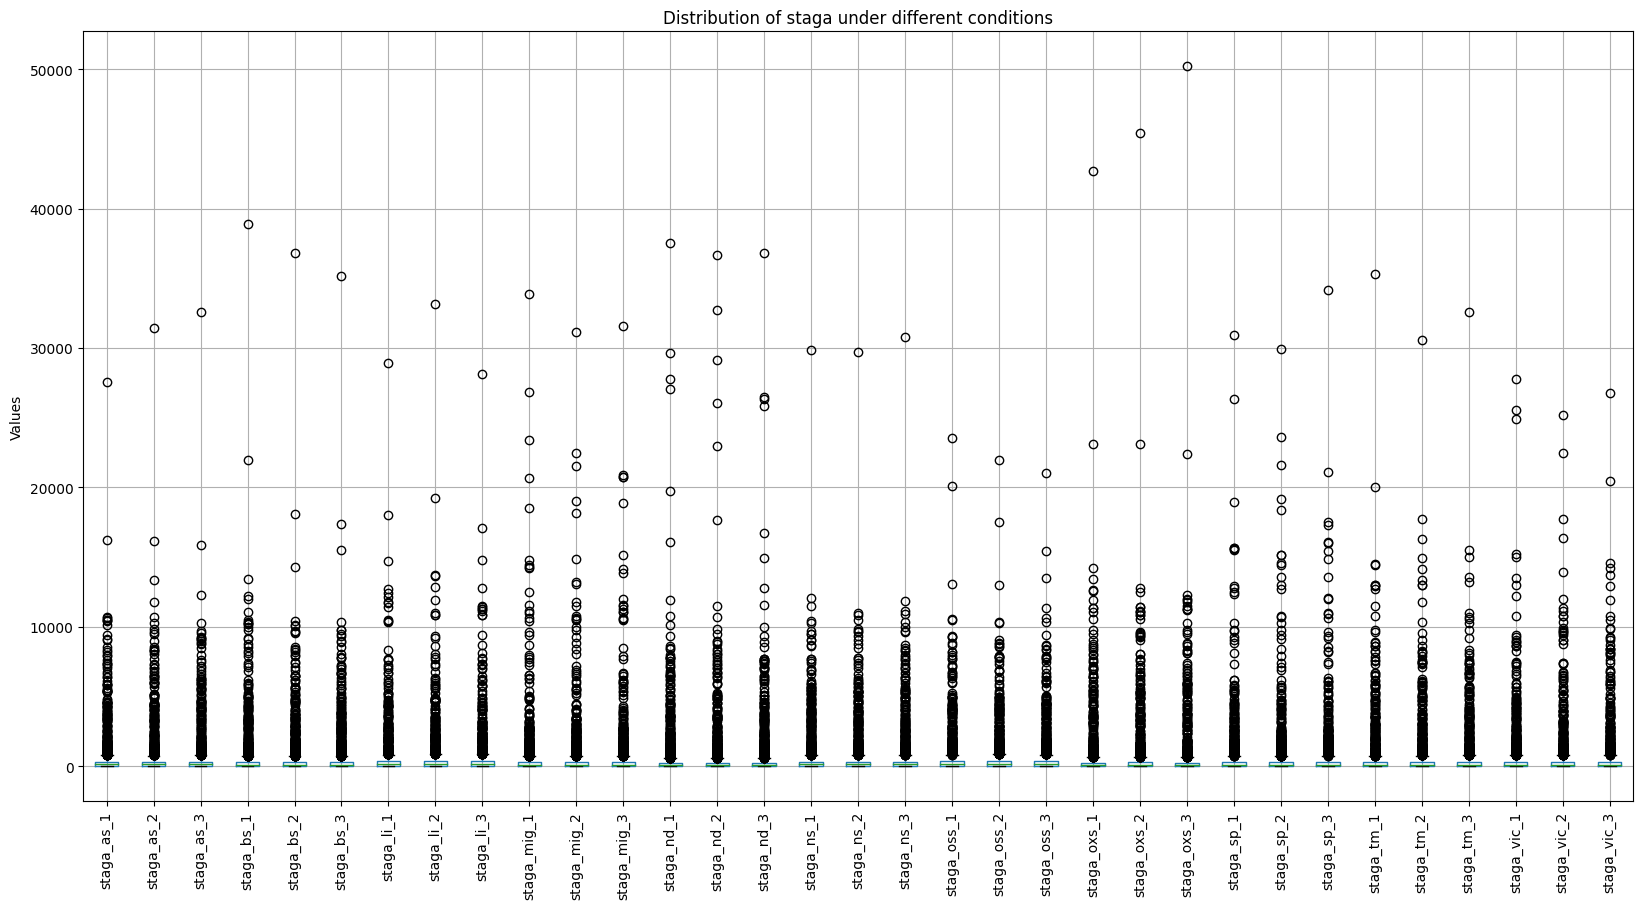


Basic statistics for staga:
         staga_as_1    staga_as_2    staga_as_3    staga_bs_1    staga_bs_2  \
count   2168.000000   2168.000000   2168.000000   2168.000000   2168.000000   
mean     461.092061    461.115580    461.102909    461.137296    461.125631   
std     1318.866008   1362.917313   1353.078267   1515.001204   1407.465671   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       27.989966     29.748788     29.598634     25.404108     30.287072   
50%      143.470123    146.369951    150.631881    125.700555    132.505324   
75%      333.945914    329.291021    336.474117    307.221392    311.295670   
max    27573.022160  31418.525120  32549.472340  38883.695920  36831.945710   

         staga_bs_3    staga_li_1    staga_li_2    staga_li_3   staga_mig_1  \
count   2168.000000   2168.000000   2168.000000   2168.000000   2168.000000   
mean     461.128617    461.011978    460.998697    460.989598    461.109776   
std     1382.532711   

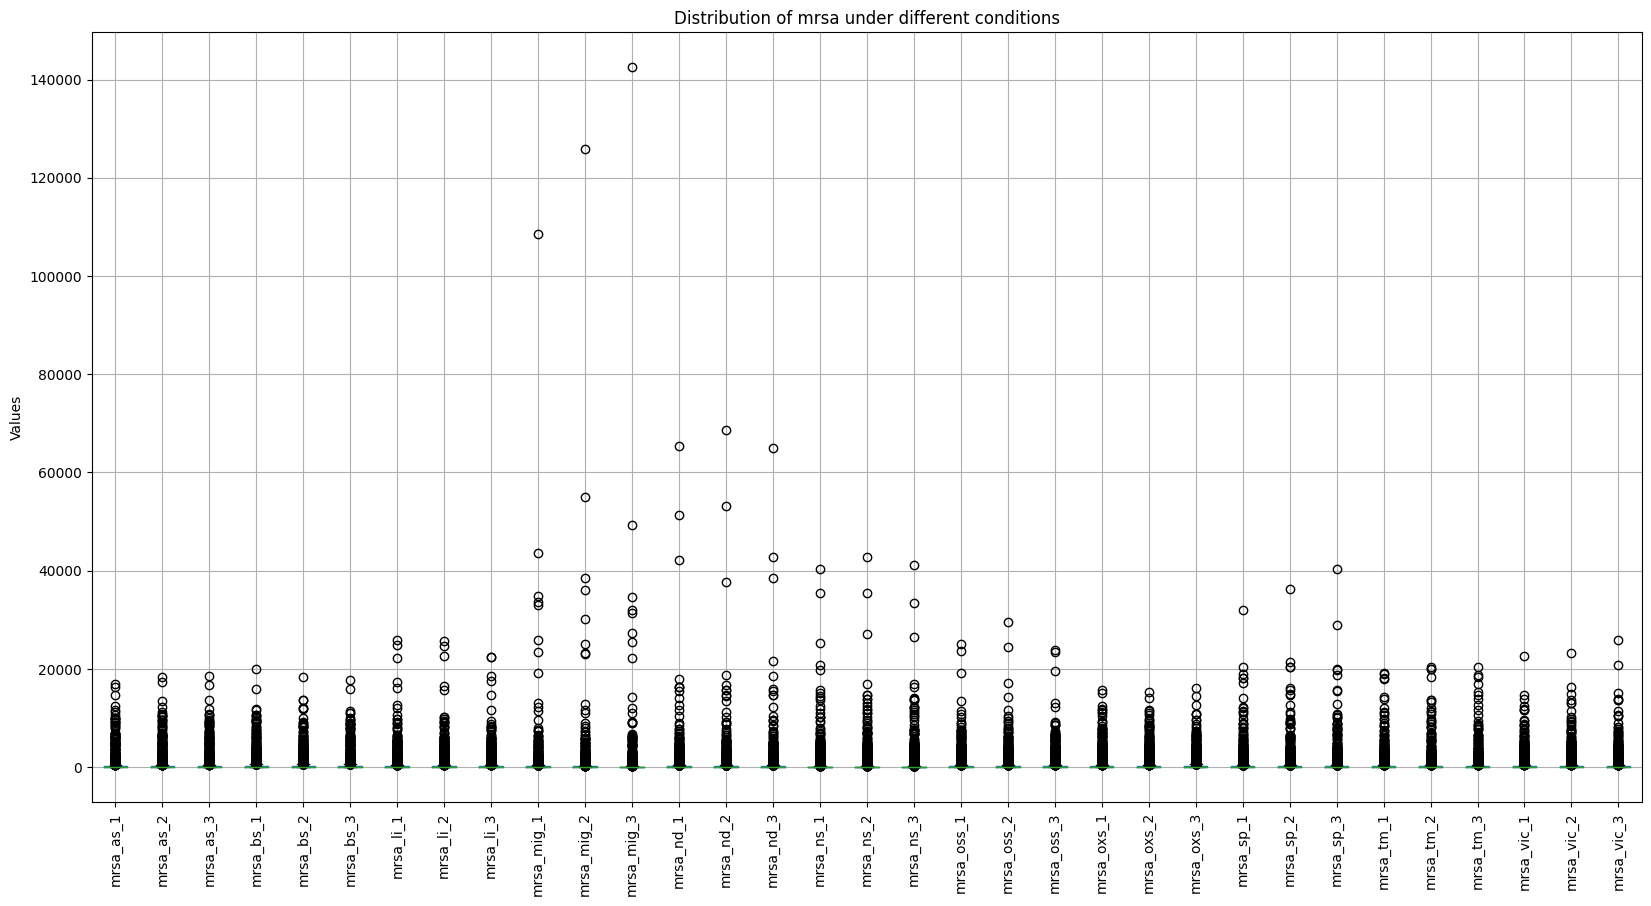


Basic statistics for mrsa:
          mrsa_as_1     mrsa_as_2     mrsa_as_3     mrsa_bs_1     mrsa_bs_2  \
count   2937.000000   2937.000000   2937.000000   2937.000000   2937.000000   
mean     340.483487    340.483487    340.483487    340.483487    340.483487   
std     1149.126947   1147.951634   1133.084846   1115.188487   1058.347608   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       10.846532     11.551101     11.784741     11.290100     12.734763   
50%       69.013144     70.688791     73.791513     72.353696     80.119653   
75%      216.859661    219.278134    218.997810    223.992354    233.507704   
max    16901.671080  18369.663500  18520.532280  20027.147560  18424.904750   

          mrsa_bs_3     mrsa_li_1     mrsa_li_2     mrsa_li_3     mrsa_mig_1  \
count   2937.000000   2937.000000   2937.000000   2937.000000    2937.000000   
mean     340.483487    340.483487    340.483487    340.483487     340.483487   
std     1091.021450 

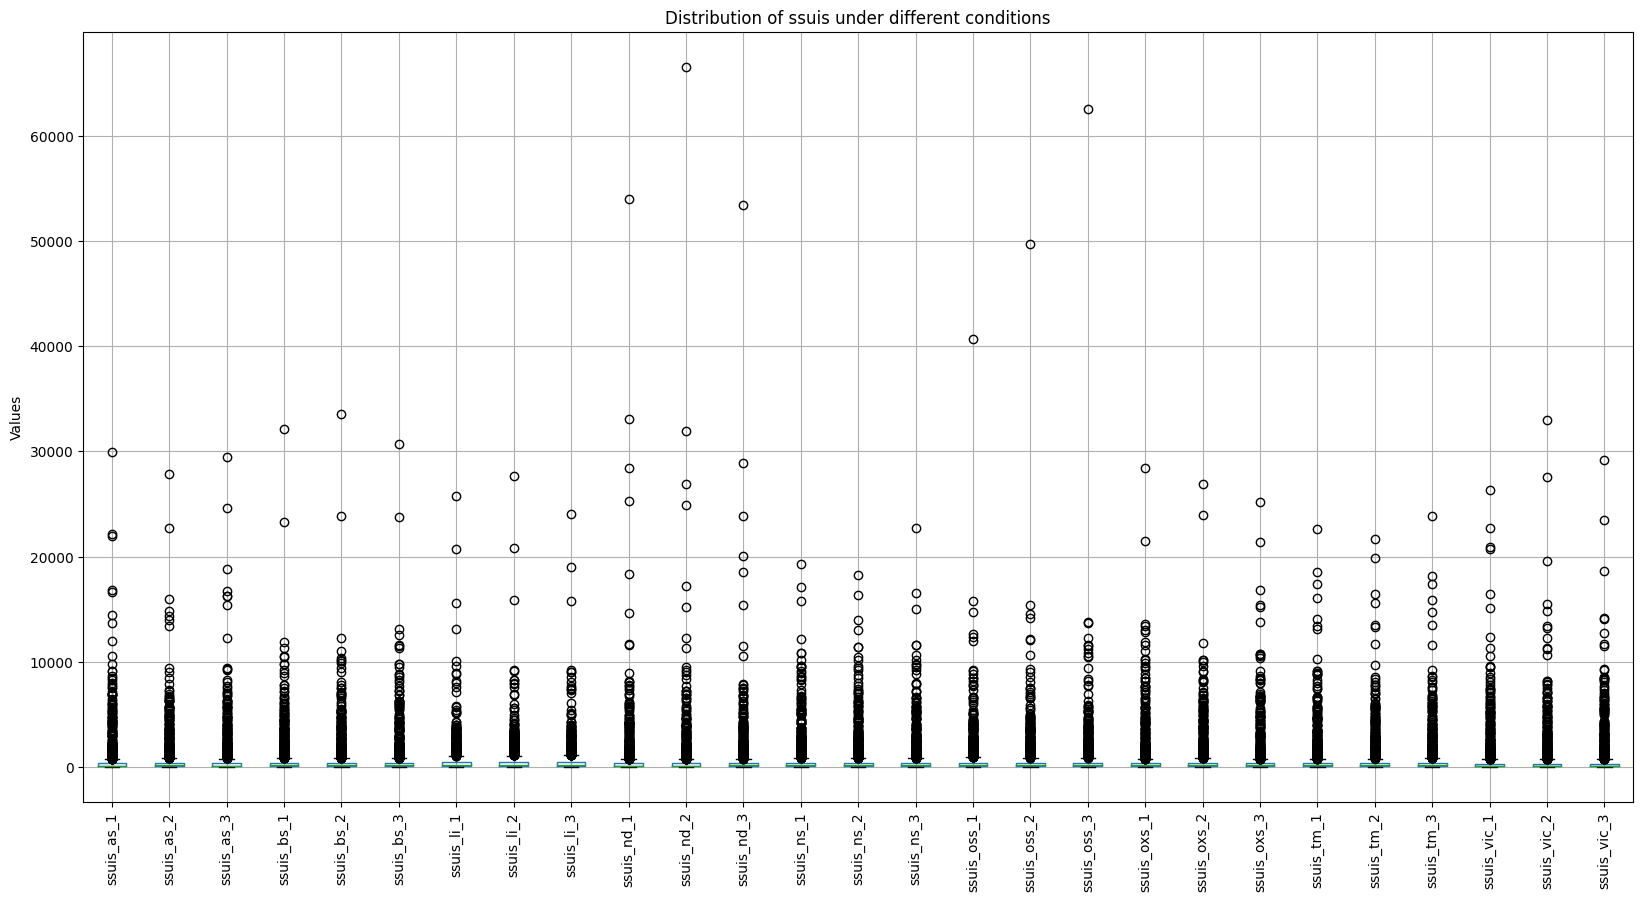


Basic statistics for ssuis:
         ssuis_as_1    ssuis_as_2    ssuis_as_3    ssuis_bs_1    ssuis_bs_2  \
count   1948.000000   1948.000000   1948.000000   1948.000000   1948.000000   
mean     513.217529    513.216427    513.225799    513.216693    513.219287   
std     1602.929417   1459.040517   1580.949716   1434.761403   1458.491397   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.058431     50.398518     44.936654     53.958897     55.443632   
50%      128.459377    141.579897    128.769331    149.958676    145.793210   
75%      332.871407    366.083035    343.376414    370.599853    373.107668   
max    29927.799680  27861.384450  29474.052740  32146.528290  33525.160810   

         ssuis_bs_3    ssuis_li_1    ssuis_li_2    ssuis_li_3    ssuis_nd_1  \
count   1948.000000   1948.000000   1948.000000   1948.000000   1948.000000   
mean     513.232884    513.123221    513.068179    513.075105    513.255648   
std     1482.947216   

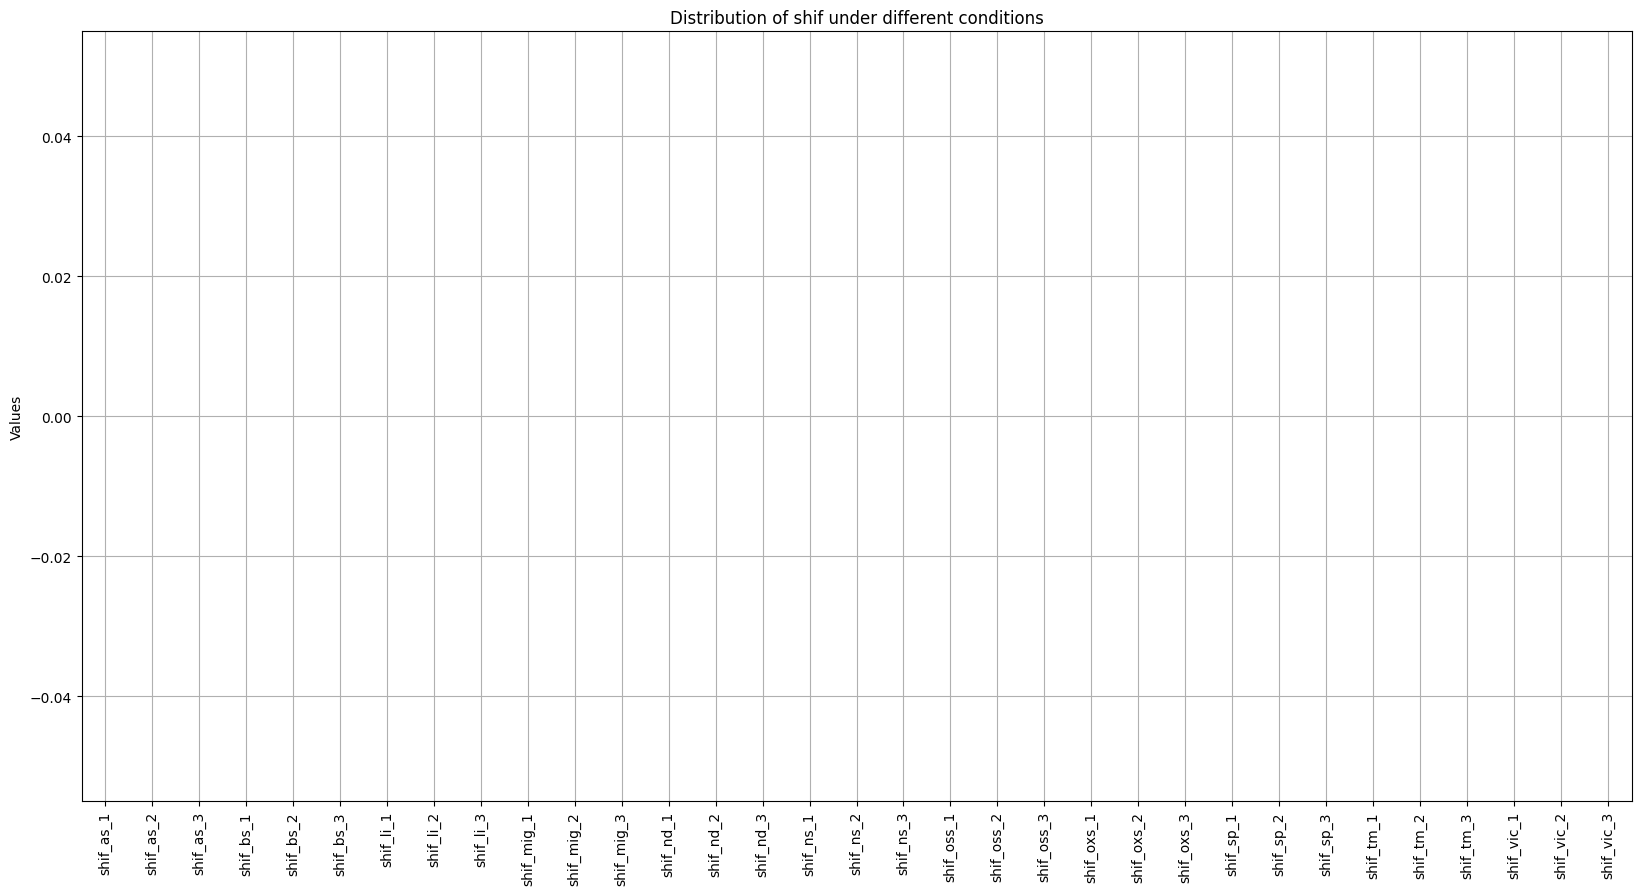


Basic statistics for shif:
       shif_as_1  shif_as_2  shif_as_3  shif_bs_1  shif_bs_2  shif_bs_3  \
count        0.0        0.0        0.0        0.0        0.0        0.0   
mean         NaN        NaN        NaN        NaN        NaN        NaN   
std          NaN        NaN        NaN        NaN        NaN        NaN   
min          NaN        NaN        NaN        NaN        NaN        NaN   
25%          NaN        NaN        NaN        NaN        NaN        NaN   
50%          NaN        NaN        NaN        NaN        NaN        NaN   
75%          NaN        NaN        NaN        NaN        NaN        NaN   
max          NaN        NaN        NaN        NaN        NaN        NaN   

       shif_li_1  shif_li_2  shif_li_3  shif_mig_1  ...  shif_oxs_3  \
count        0.0        0.0        0.0         0.0  ...         0.0   
mean         NaN        NaN        NaN         NaN  ...         NaN   
std          NaN        NaN        NaN         NaN  ...         NaN   
min         

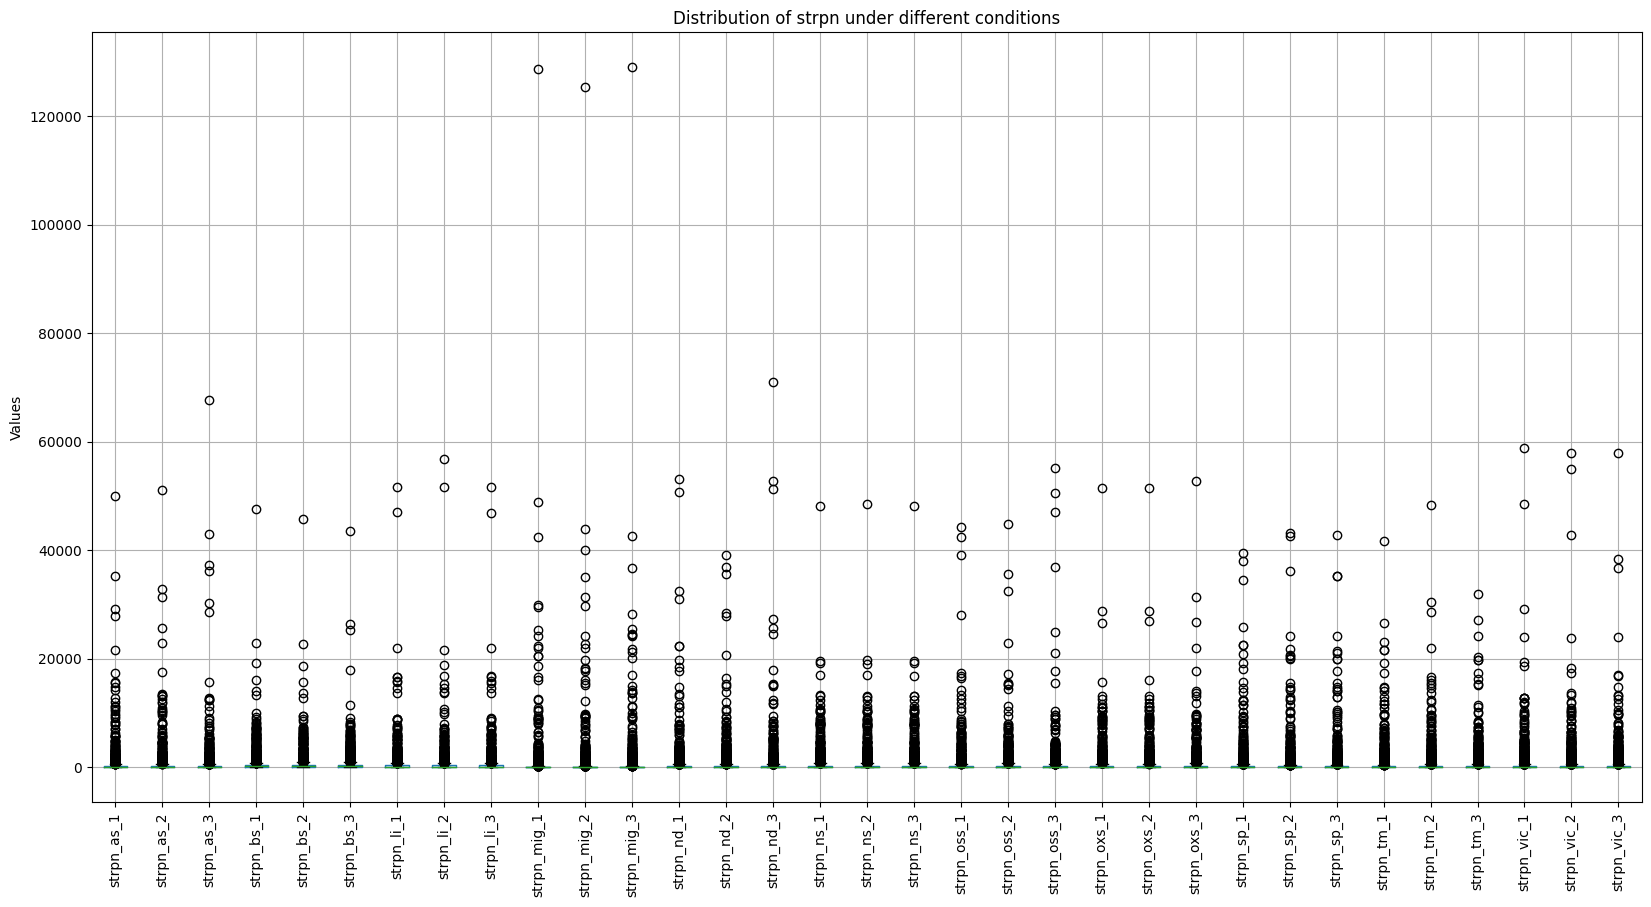


Basic statistics for strpn:
         strpn_as_1    strpn_as_2    strpn_as_3    strpn_bs_1    strpn_bs_2  \
count   2115.000000   2115.000000   2115.000000   2115.000000   2115.000000   
mean     472.730294    472.714628    472.621684    472.716366    472.660642   
std     2064.096260   2043.520521   2479.770911   1651.863210   1575.169390   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       20.048605     22.716163     18.624659     16.773884     22.763945   
50%       89.151470     99.876135     81.449596    120.987616    135.544103   
75%      273.403493    279.163084    245.805208    332.323478    368.604230   
max    50038.057800  51001.908420  67603.712940  47628.379970  45666.622000   

         strpn_bs_3    strpn_li_1    strpn_li_2    strpn_li_3    strpn_mig_1  \
count   2115.000000   2115.000000   2115.000000   2115.000000    2115.000000   
mean     472.692049    472.634969    472.629221    472.632833     472.780259   
std     1585.896205

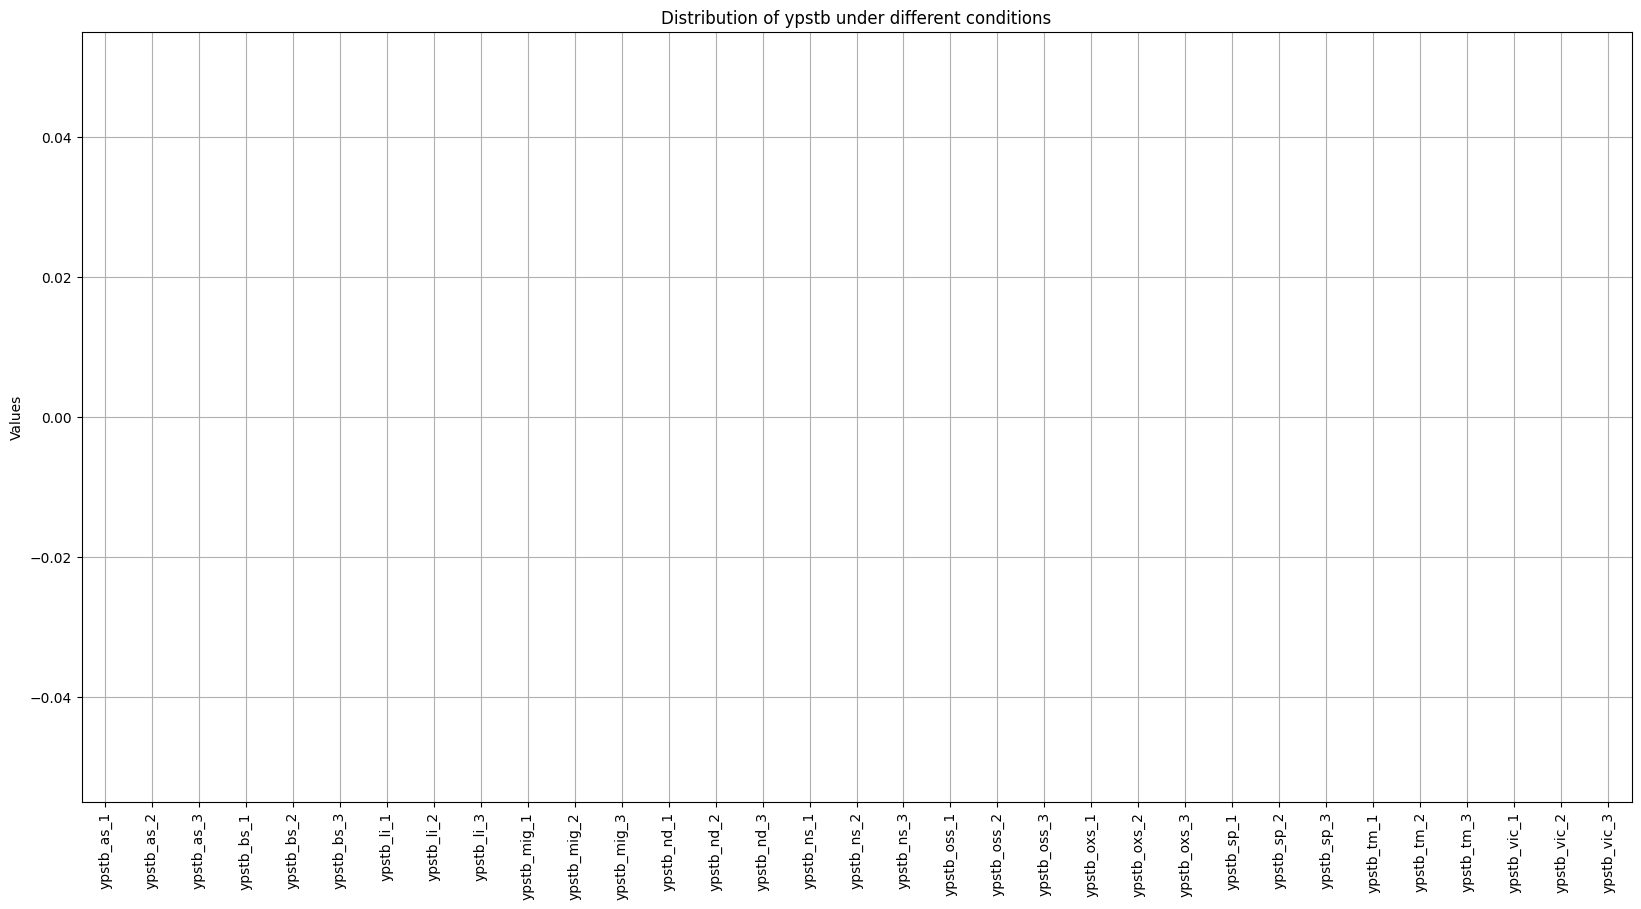


Basic statistics for ypstb:
       ypstb_as_1  ypstb_as_2  ypstb_as_3  ypstb_bs_1  ypstb_bs_2  ypstb_bs_3  \
count         0.0         0.0         0.0         0.0         0.0         0.0   
mean          NaN         NaN         NaN         NaN         NaN         NaN   
std           NaN         NaN         NaN         NaN         NaN         NaN   
min           NaN         NaN         NaN         NaN         NaN         NaN   
25%           NaN         NaN         NaN         NaN         NaN         NaN   
50%           NaN         NaN         NaN         NaN         NaN         NaN   
75%           NaN         NaN         NaN         NaN         NaN         NaN   
max           NaN         NaN         NaN         NaN         NaN         NaN   

       ypstb_li_1  ypstb_li_2  ypstb_li_3  ypstb_mig_1  ...  ypstb_oxs_3  \
count         0.0         0.0         0.0          0.0  ...          0.0   
mean          NaN         NaN         NaN          NaN  ...          NaN   
std          

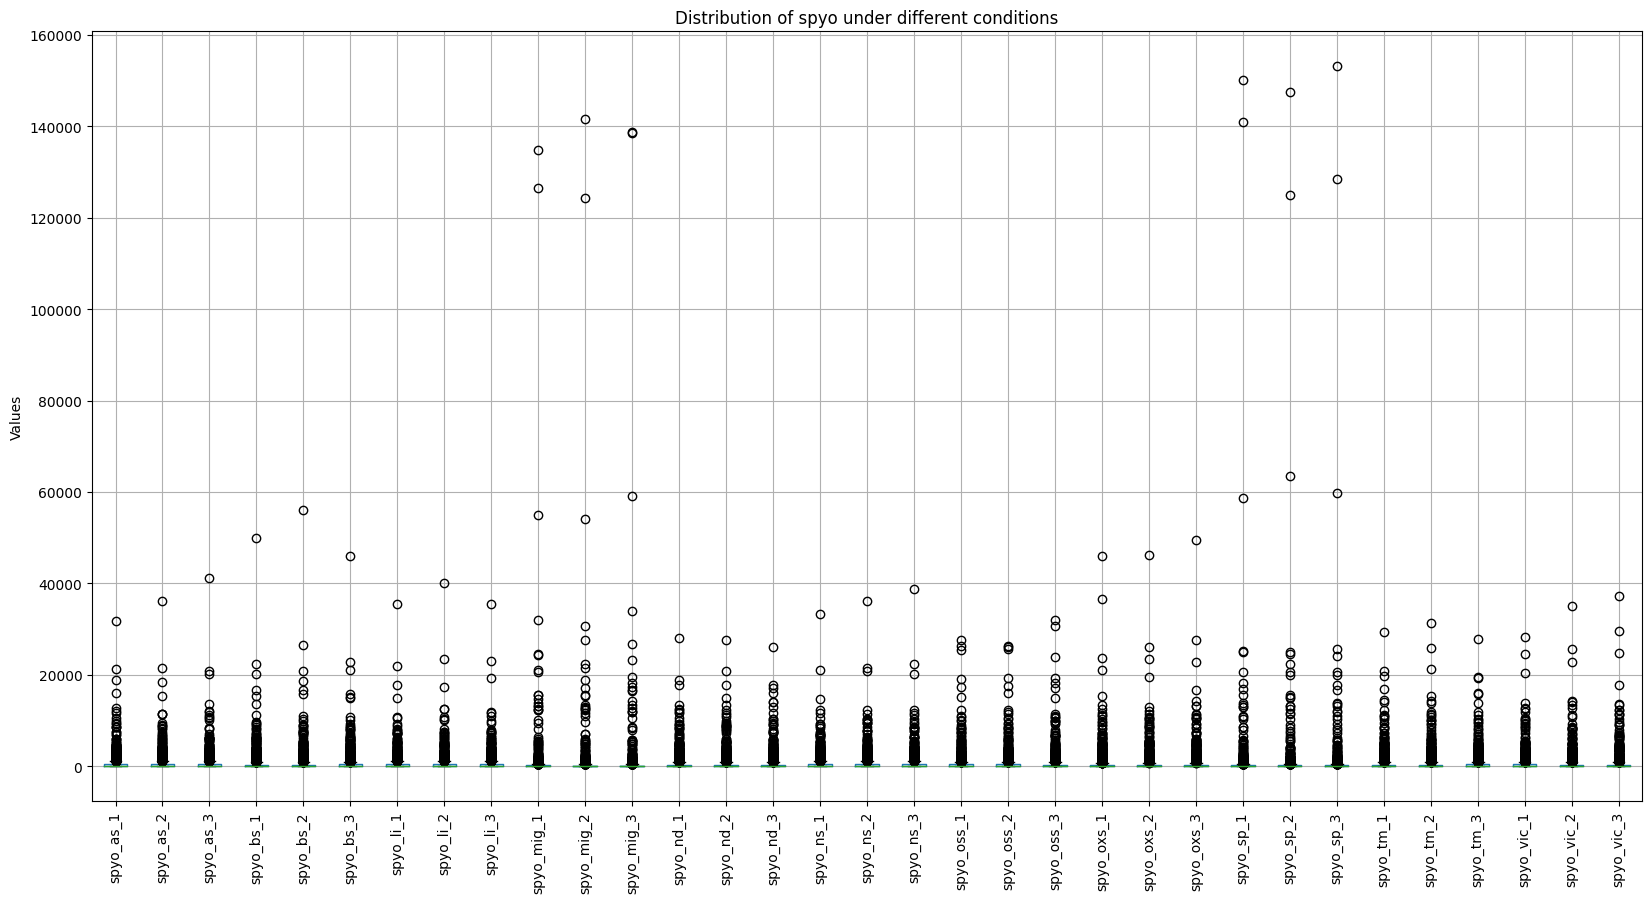


Basic statistics for spyo:
          spyo_as_1     spyo_as_2     spyo_as_3     spyo_bs_1     spyo_bs_2  \
count   1800.000000   1800.000000   1800.000000   1800.000000   1800.000000   
mean     555.555556    555.555556    555.555556    555.555556    555.555556   
std     1533.896303   1548.703305   1627.610443   1833.600809   1988.311278   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       44.580791     46.258476     44.601150     34.343562     32.318047   
50%      180.611055    186.393156    184.085690    150.605391    140.218167   
75%      461.070730    476.017011    472.296634    414.642974    405.806161   
max    31894.541340  36100.831550  41297.599450  50008.445010  56065.464770   

          spyo_bs_3     spyo_li_1     spyo_li_2     spyo_li_3     spyo_mig_1  \
count   1800.000000   1800.000000   1800.000000   1800.000000    1800.000000   
mean     555.555556    555.555556    555.555556    555.555556     555.555556   
std     1779.297093 

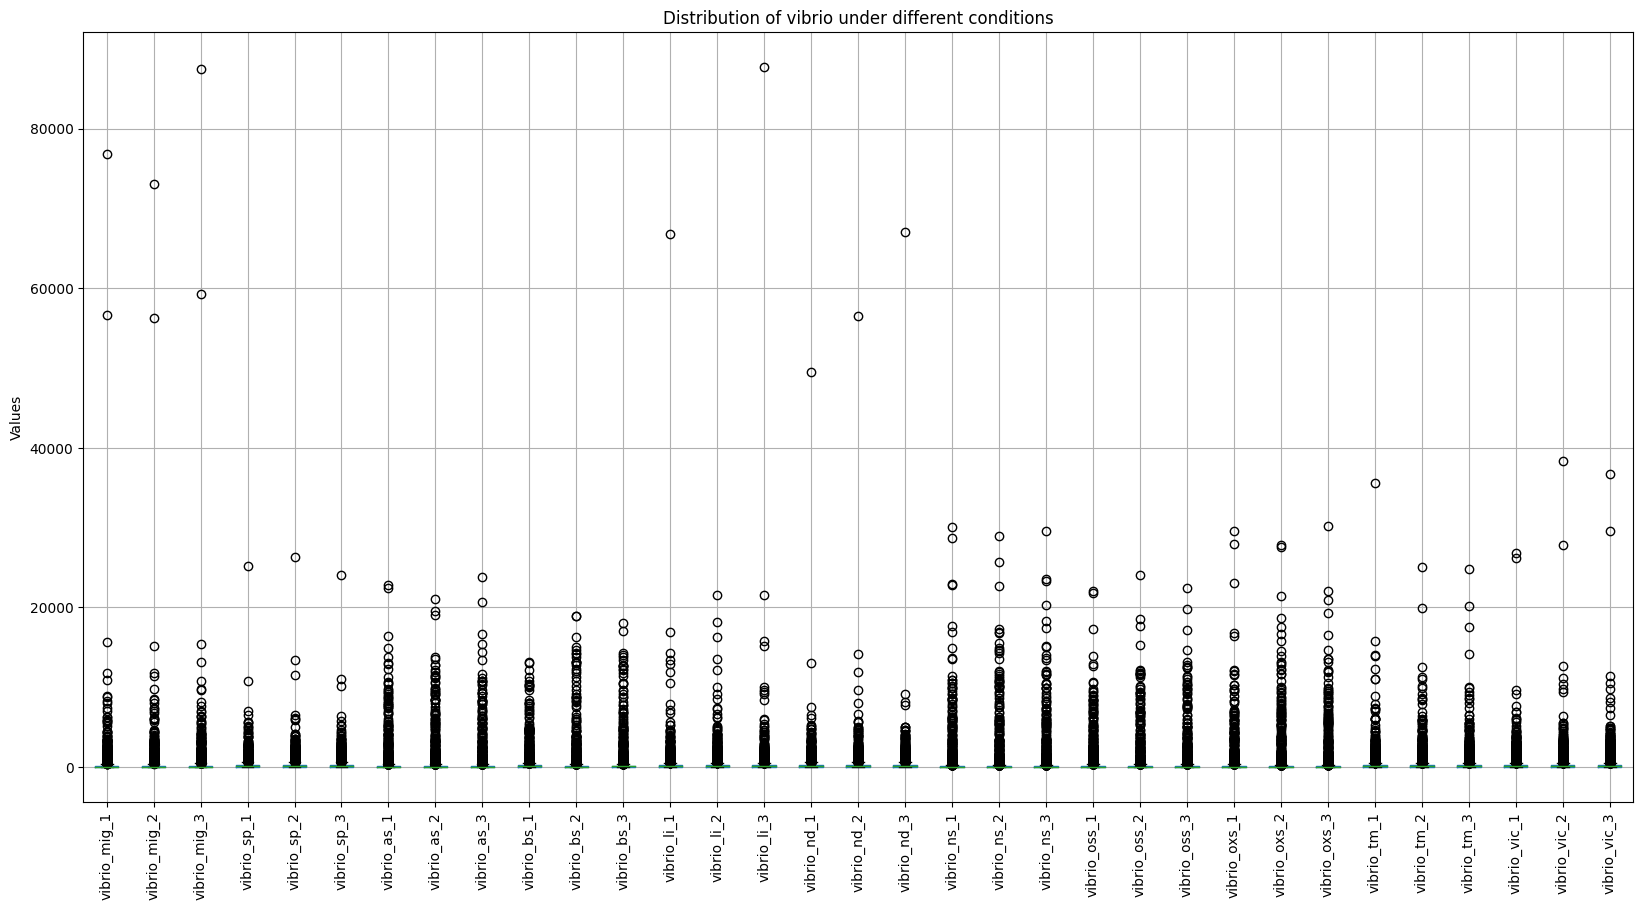


Basic statistics for vibrio:
       vibrio_mig_1  vibrio_mig_2  vibrio_mig_3   vibrio_sp_1   vibrio_sp_2  \
count   3501.000000   3501.000000   3501.000000   3501.000000   3501.000000   
mean     285.498288    285.487980    285.493139    285.578103    285.558559   
std     1764.533590   1718.042069   1928.795338    684.054906    726.121641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.205912      8.531816      0.000000     43.629290     42.945717   
50%       60.524121     62.582542     58.353083    113.143637    110.111841   
75%      183.996059    180.959827    181.922369    279.499189    278.752787   
max    76757.048190  73071.720280  87446.753160  25170.123650  26364.996730   

        vibrio_sp_3   vibrio_as_1   vibrio_as_2   vibrio_as_3   vibrio_bs_1  \
count   3501.000000   3501.000000   3501.000000   3501.000000   3501.000000   
mean     285.580693    285.538909    285.456833    285.524572    285.307558   
std      678.721954  

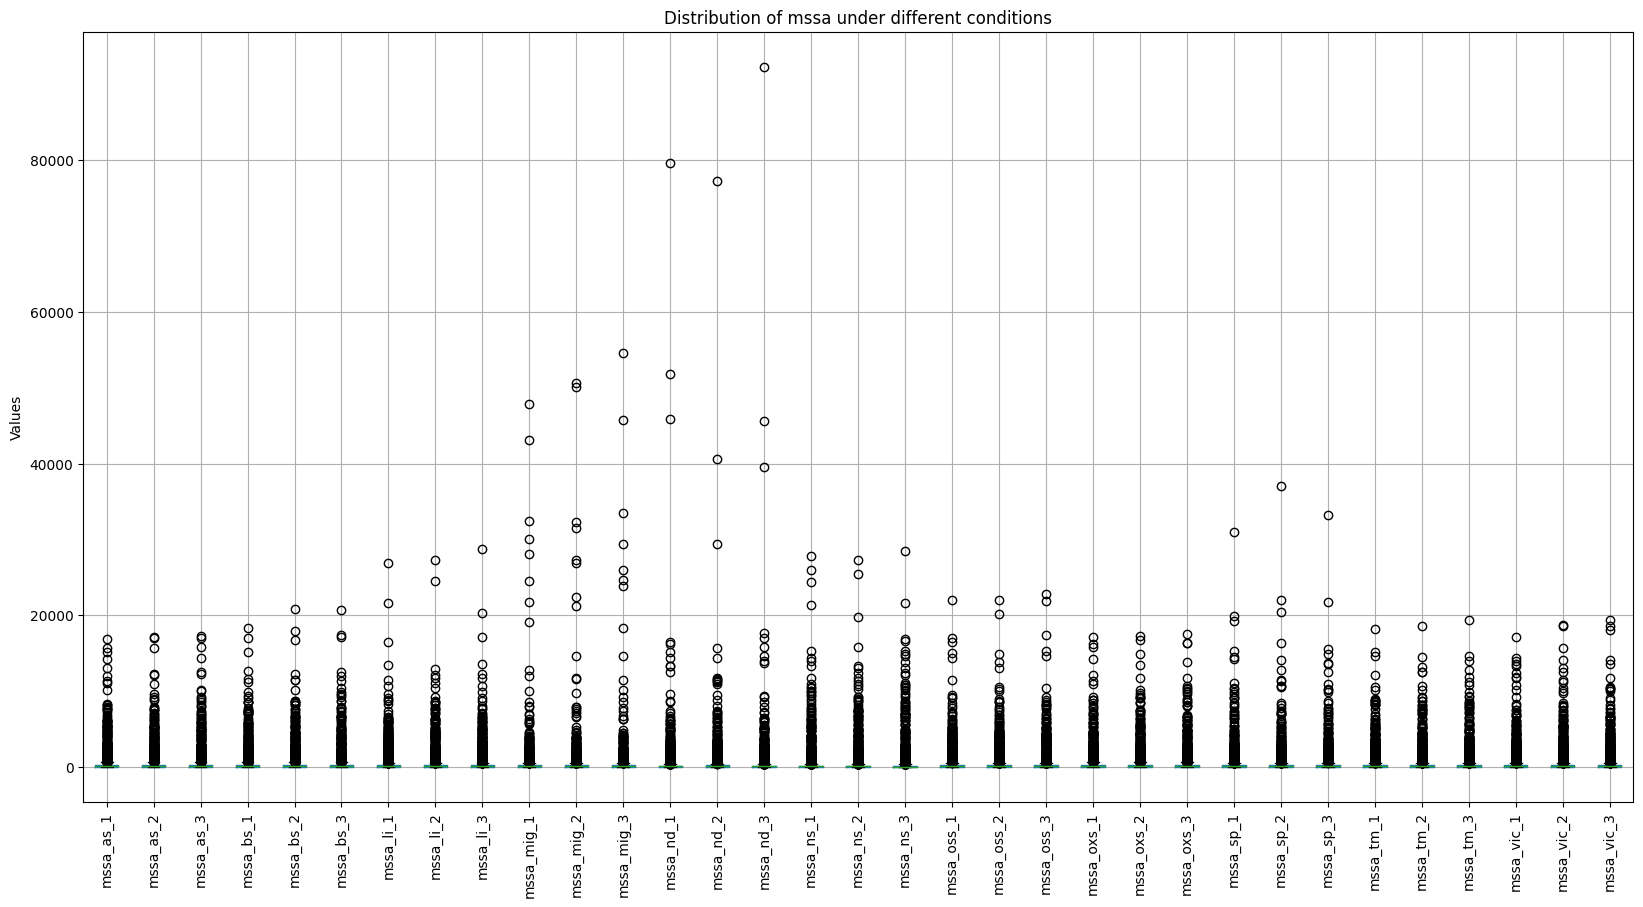


Basic statistics for mssa:
          mssa_as_1     mssa_as_2     mssa_as_3     mssa_bs_1     mssa_bs_2  \
count   2852.000000   2852.000000   2852.000000   2852.000000   2852.000000   
mean     350.605217    350.603785    350.598199    350.602709    350.602017   
std     1111.799255   1066.096533   1107.028141   1111.577624   1121.300430   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       12.115677     13.938394     13.837348     11.852327     11.601567   
50%       79.878864     85.635634     85.078795     82.310349     81.305568   
75%      241.287588    262.426242    254.650526    240.784309    247.018337   
max    16865.437250  17182.434410  17306.221400  18296.723910  20850.693060   

          mssa_bs_3     mssa_li_1     mssa_li_2     mssa_li_3    mssa_mig_1  \
count   2852.000000   2852.000000   2852.000000   2852.000000   2852.000000   
mean     350.592632    350.621693    350.624168    350.623191    350.622724   
std     1135.973599   1

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


pattern = re.compile('|'.join([f"{species}_{condition}_" for species in species_list for condition in all_conditions]))
columns_to_keep = [col for col in merged_data.columns if pattern.search(col)]
filtered_data = merged_data[columns_to_keep]

# Rename columns (e.g. 'legip_as_1_ge_tpm' -> 'legip_as_1')
renamed_columns = {col: '_'.join(col.split('_')[:3]) for col in columns_to_keep}
filtered_data.rename(columns=renamed_columns, inplace=True)

# Visualize the data distribution of each specie under different conditions
for species in species_list:
    species_columns = [col for col in filtered_data.columns if col.startswith(species)]
    if species_columns:
        species_data = filtered_data[species_columns]

        # Drawing graphics
        plt.figure(figsize=(20, 10))
        species_data.boxplot()
        plt.title(f'Distribution of {species} under different conditions')
        plt.xticks(rotation=90)
        plt.ylabel('Values')
        plt.show()

        # Display basic statistics for each specie
        print(f"\nBasic statistics for {species}:")
        print(species_data.describe())


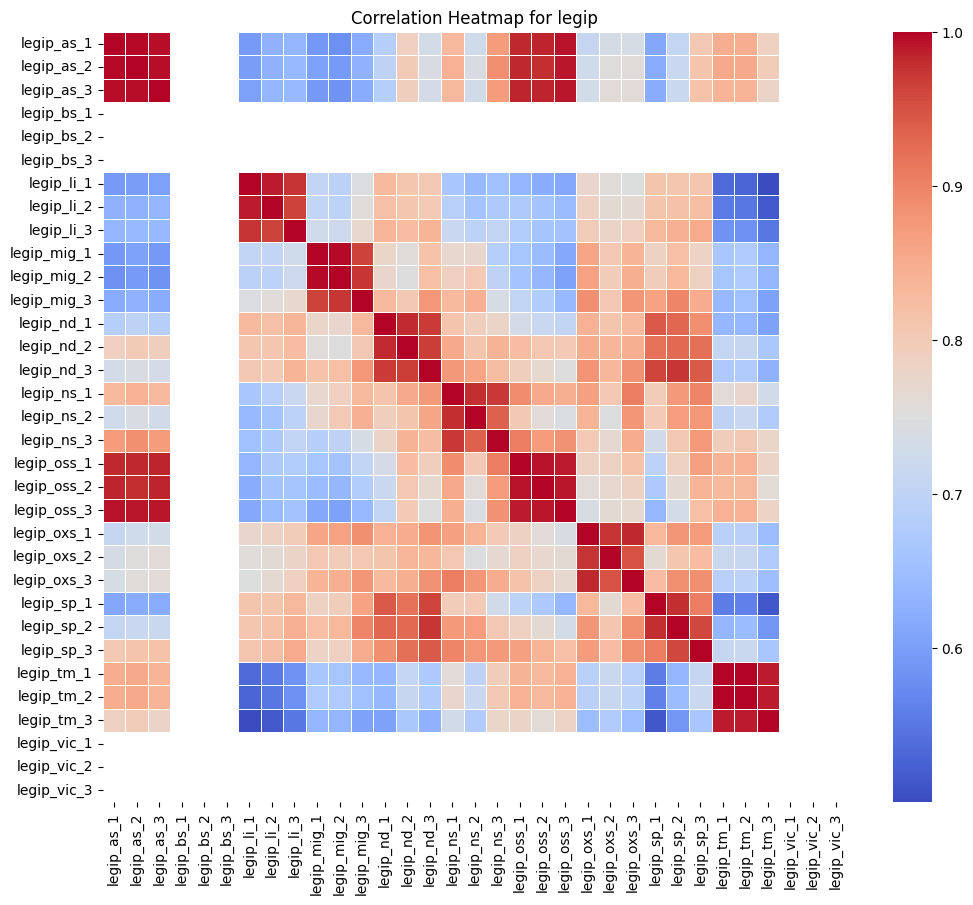

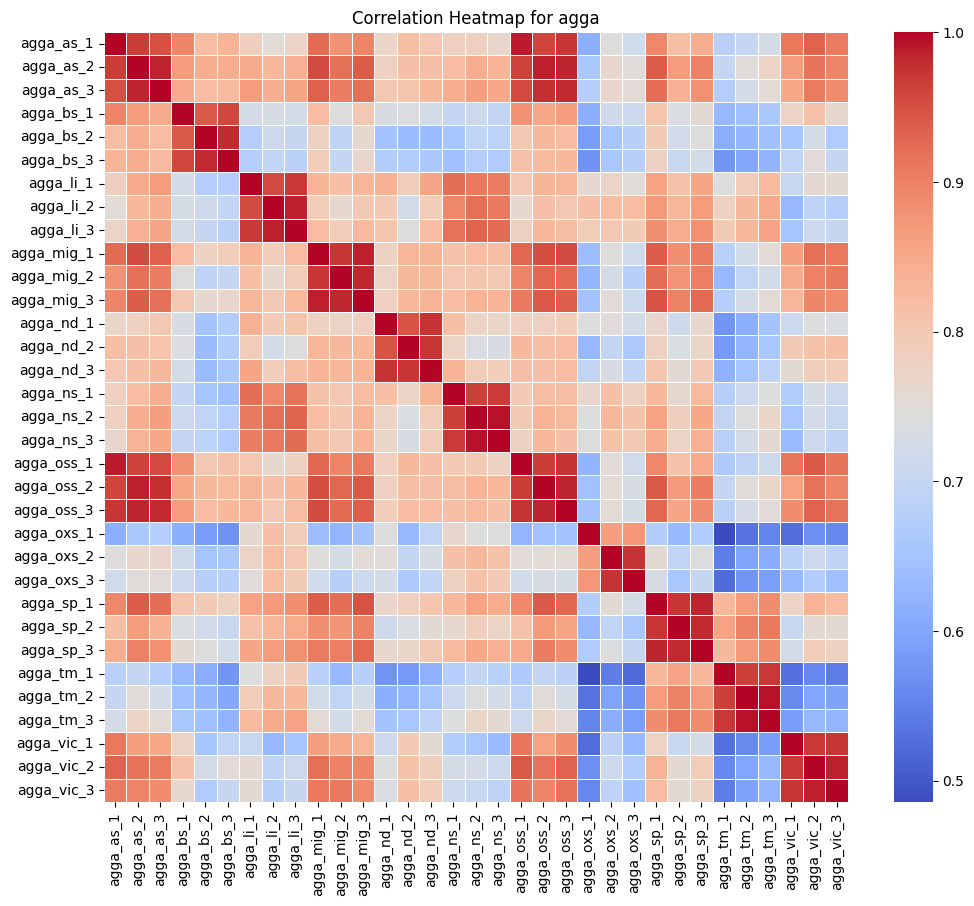

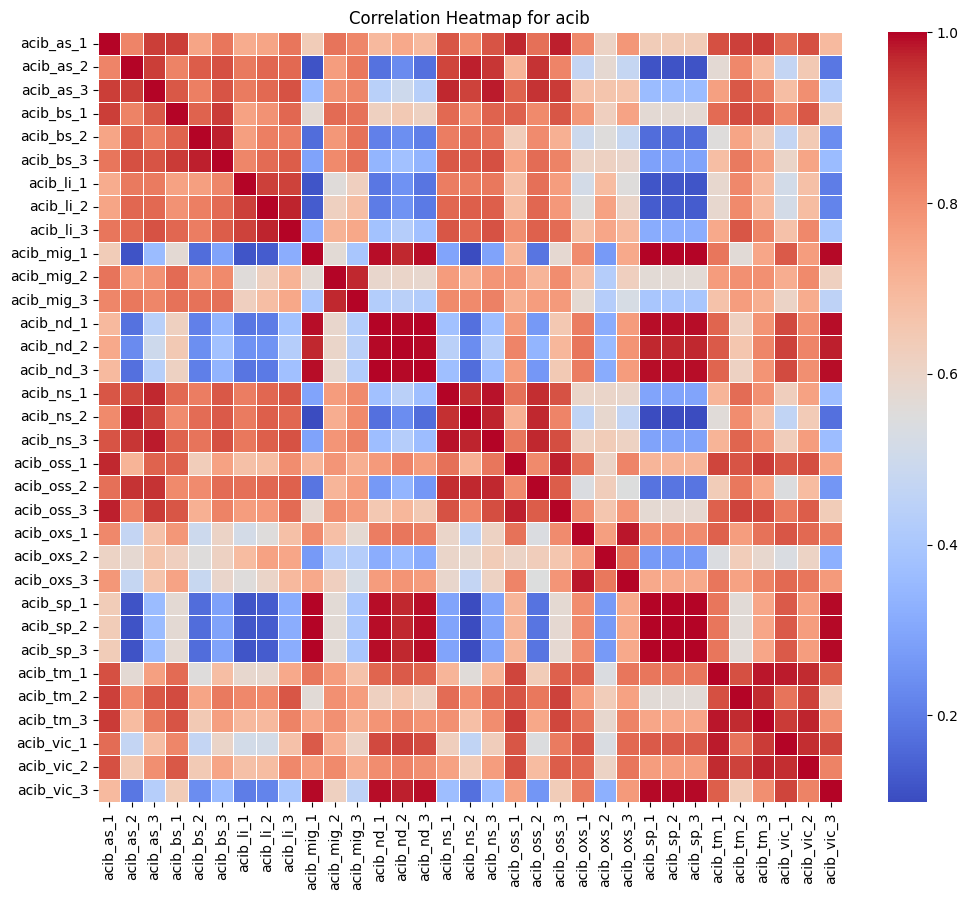

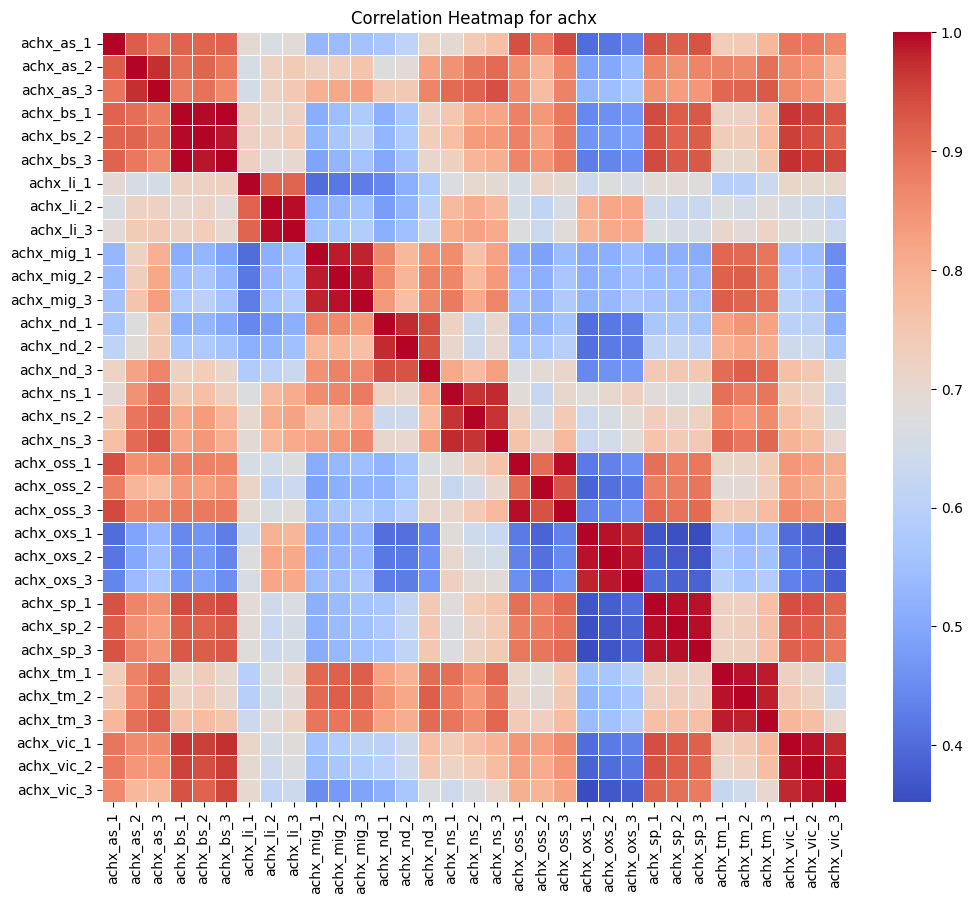

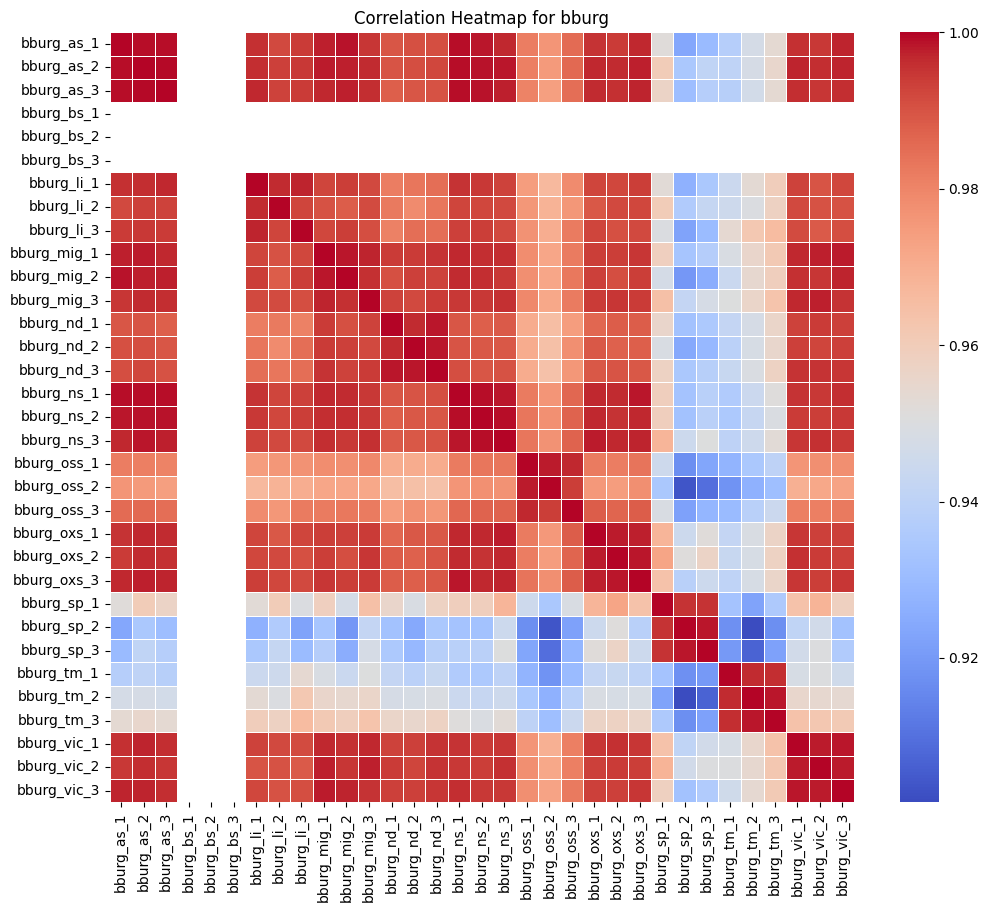

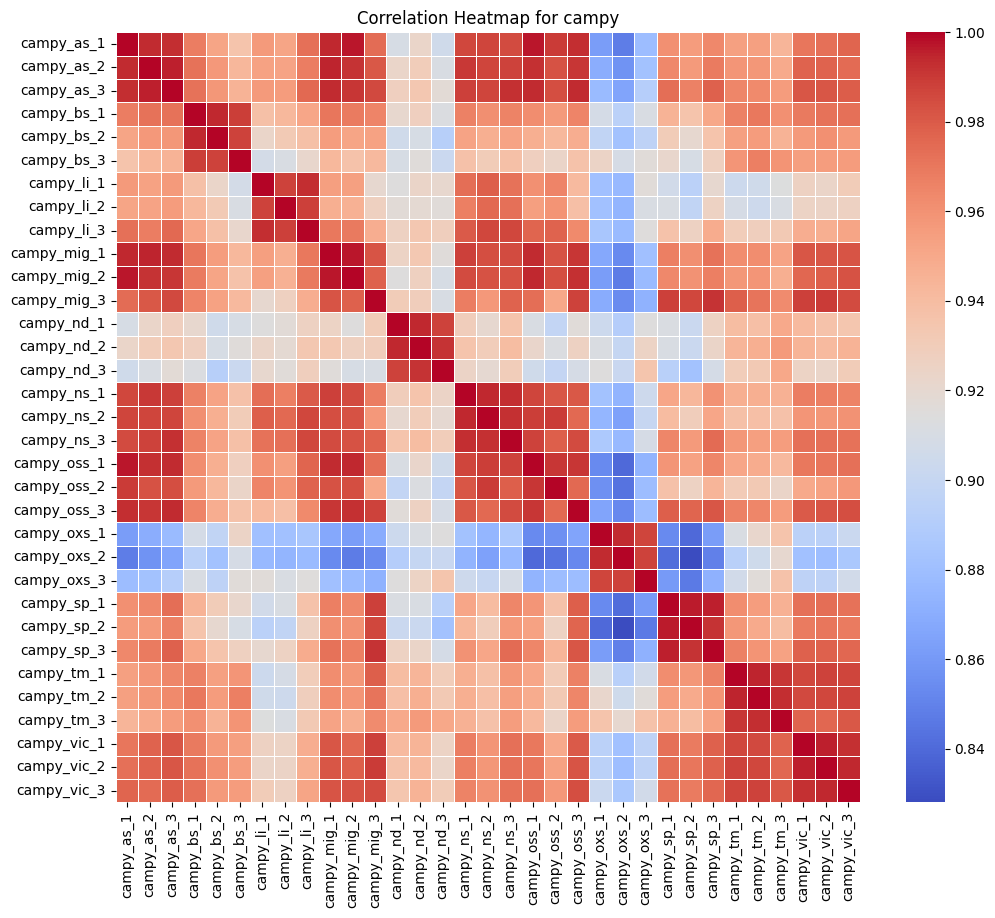

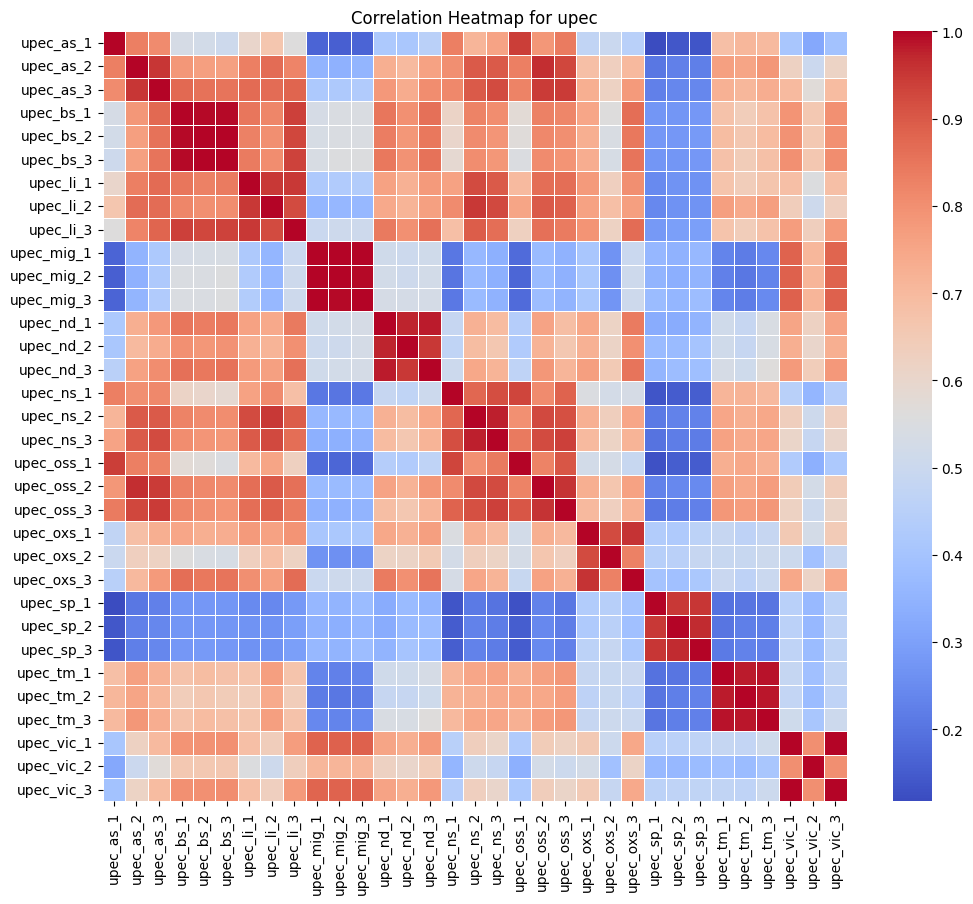

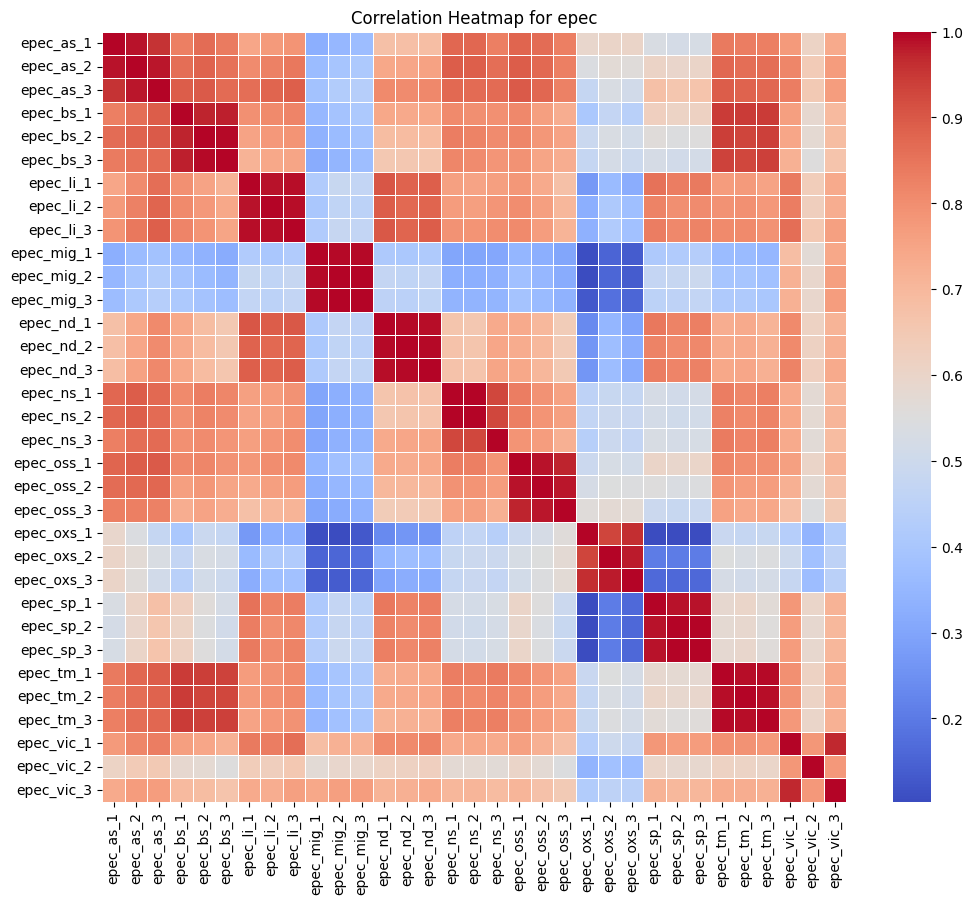

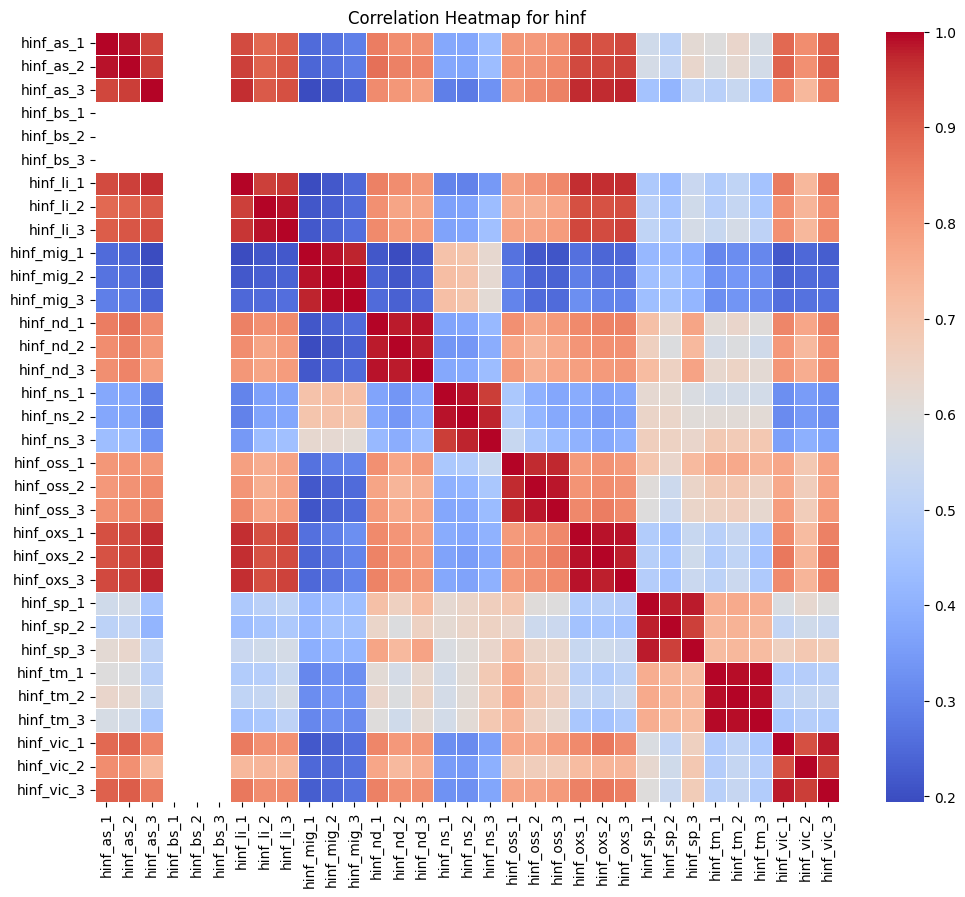

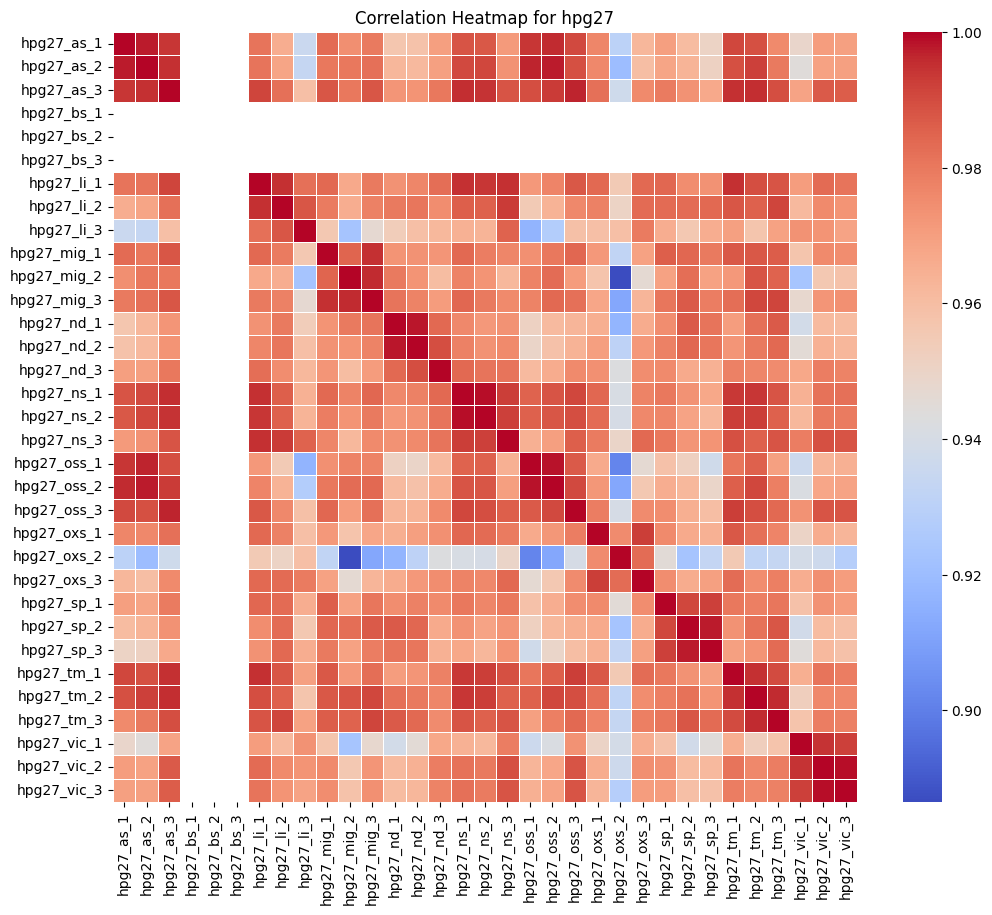

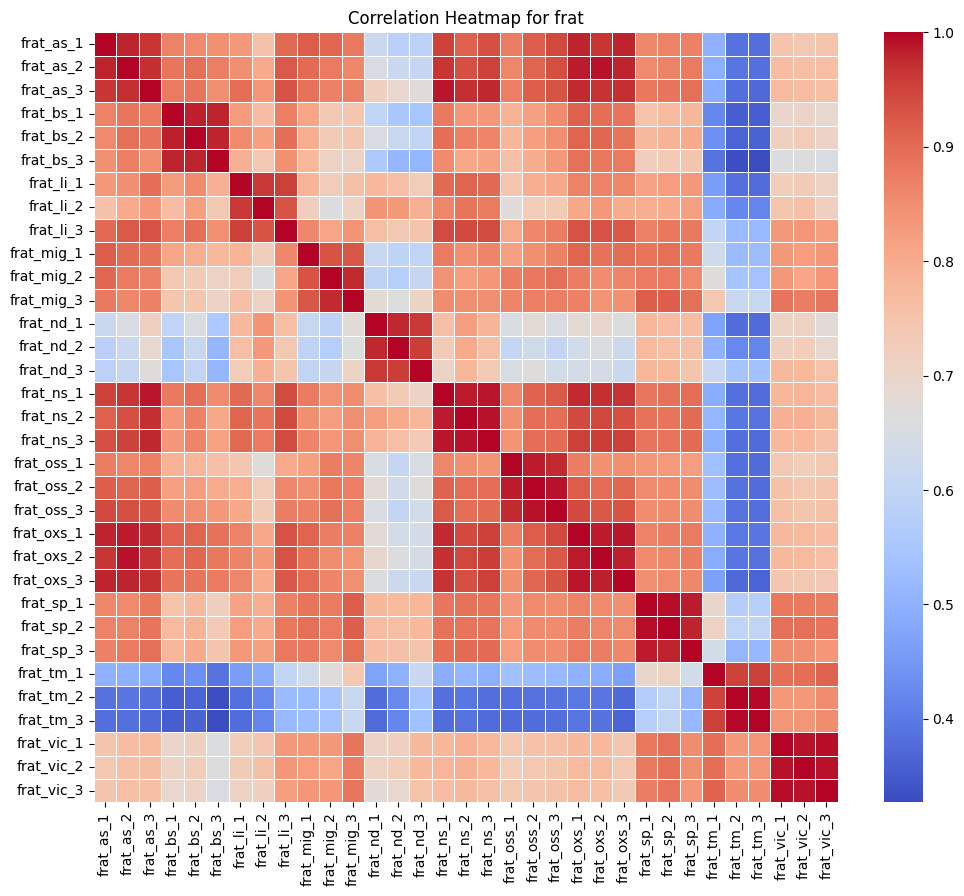

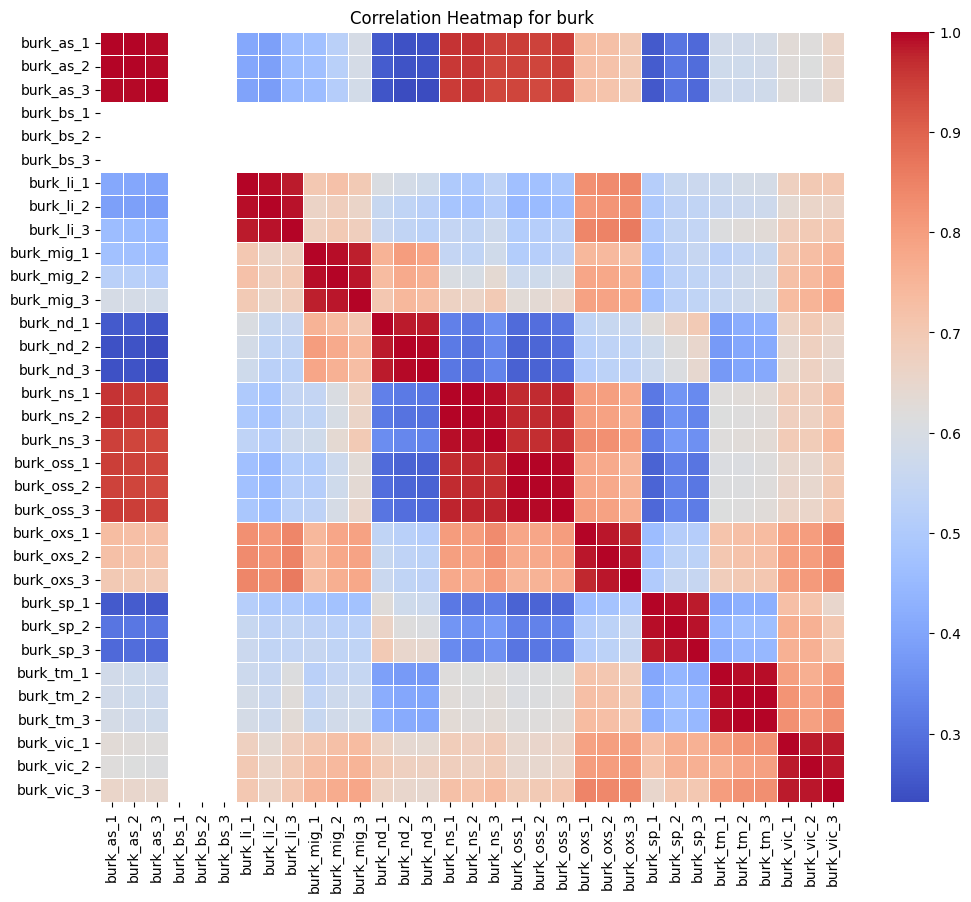

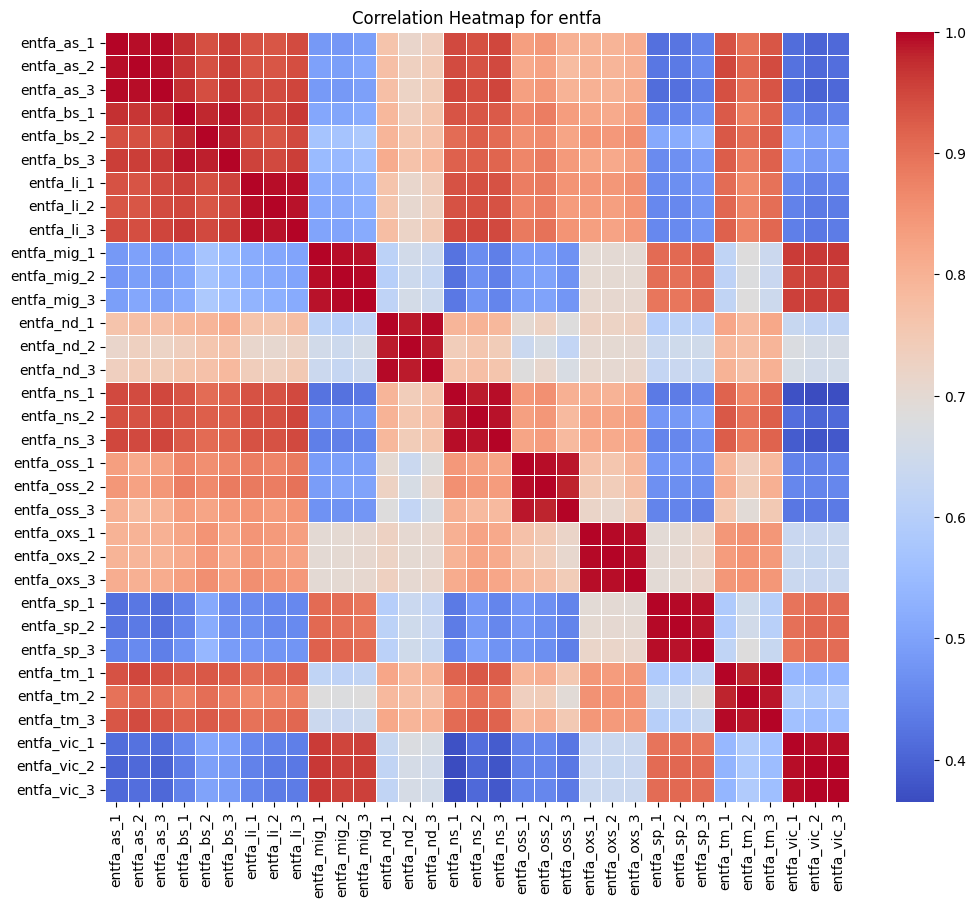

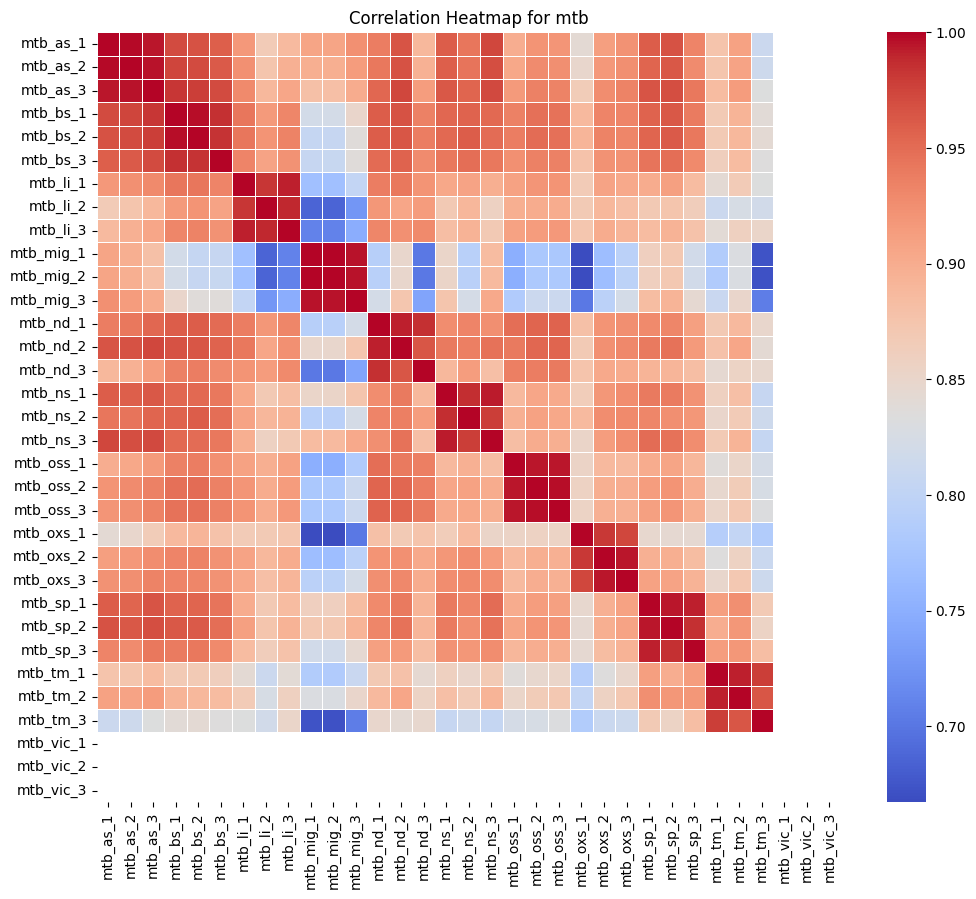

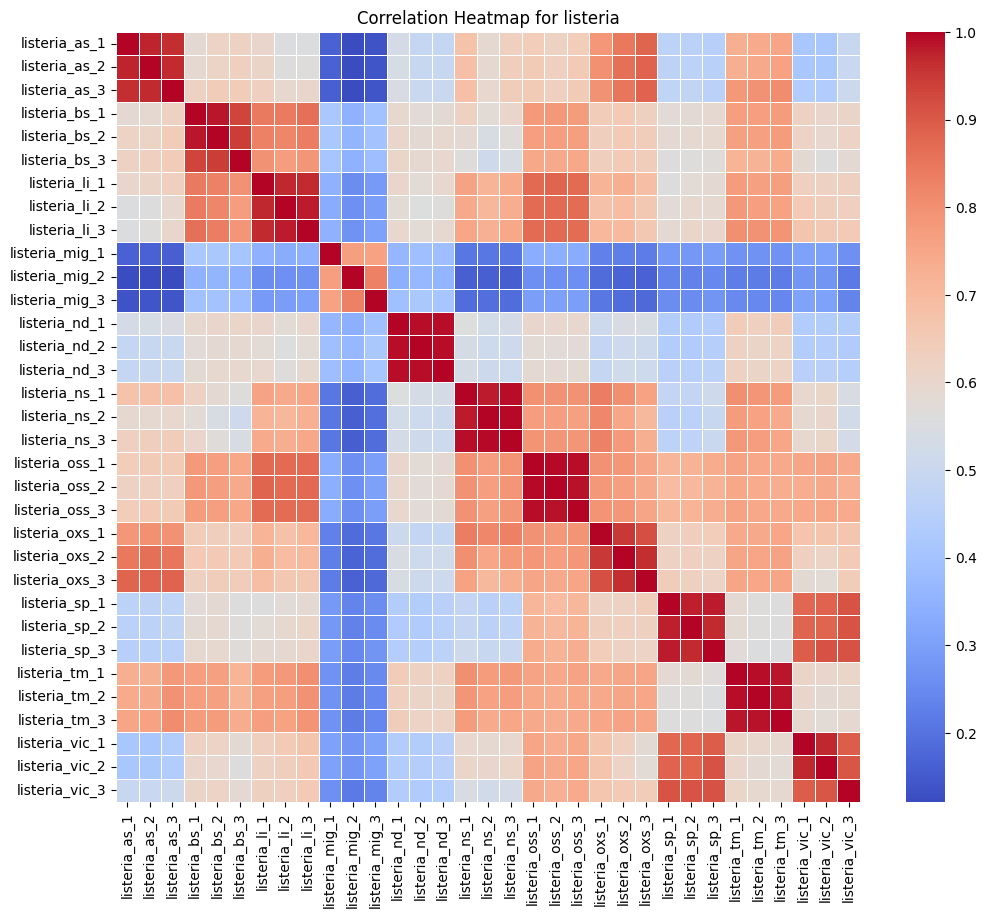

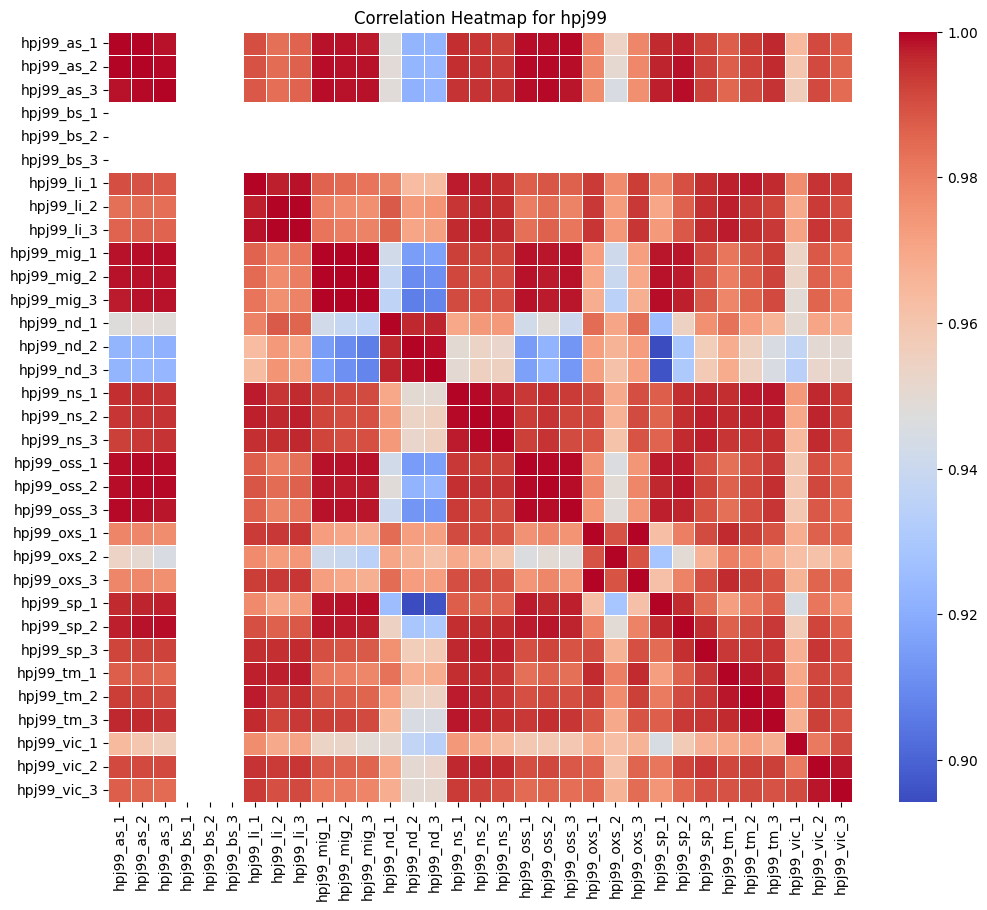

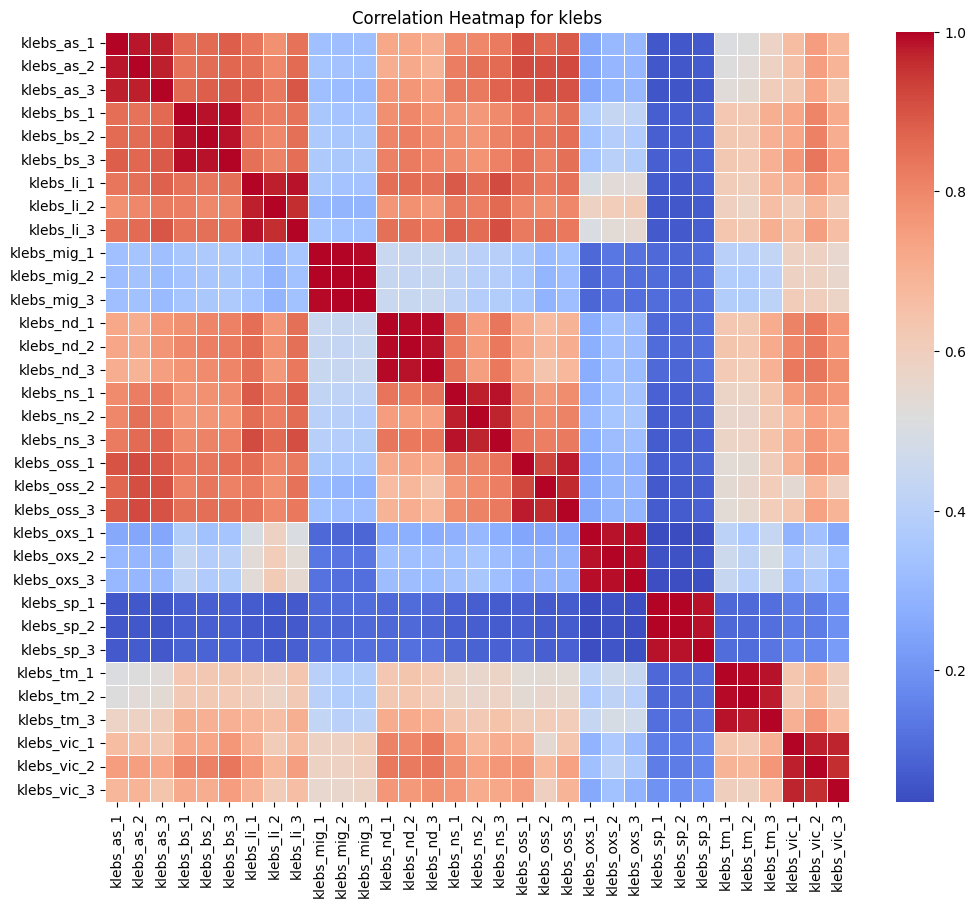

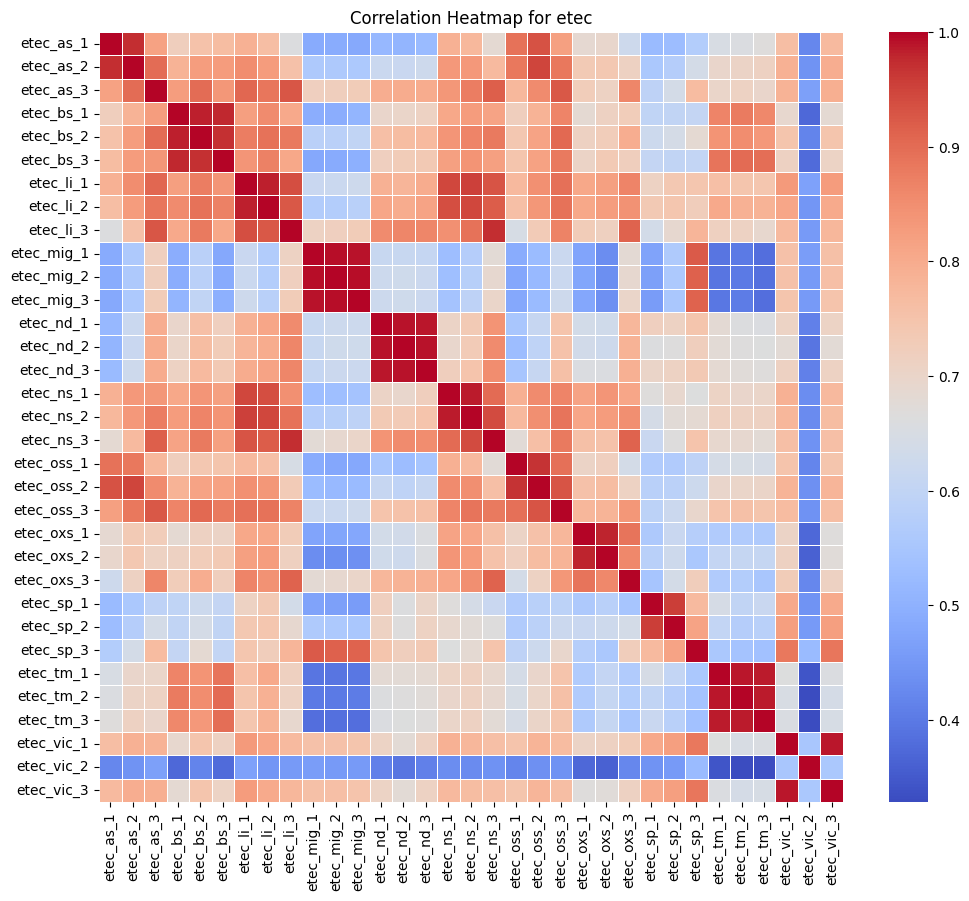

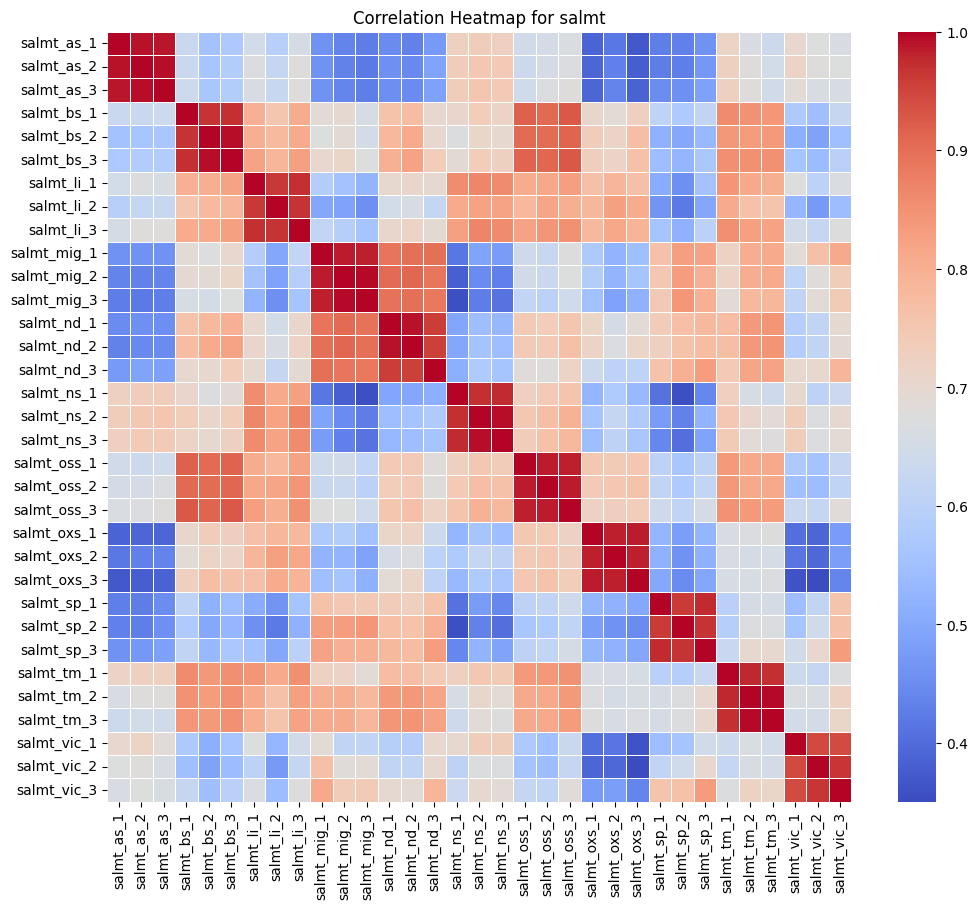

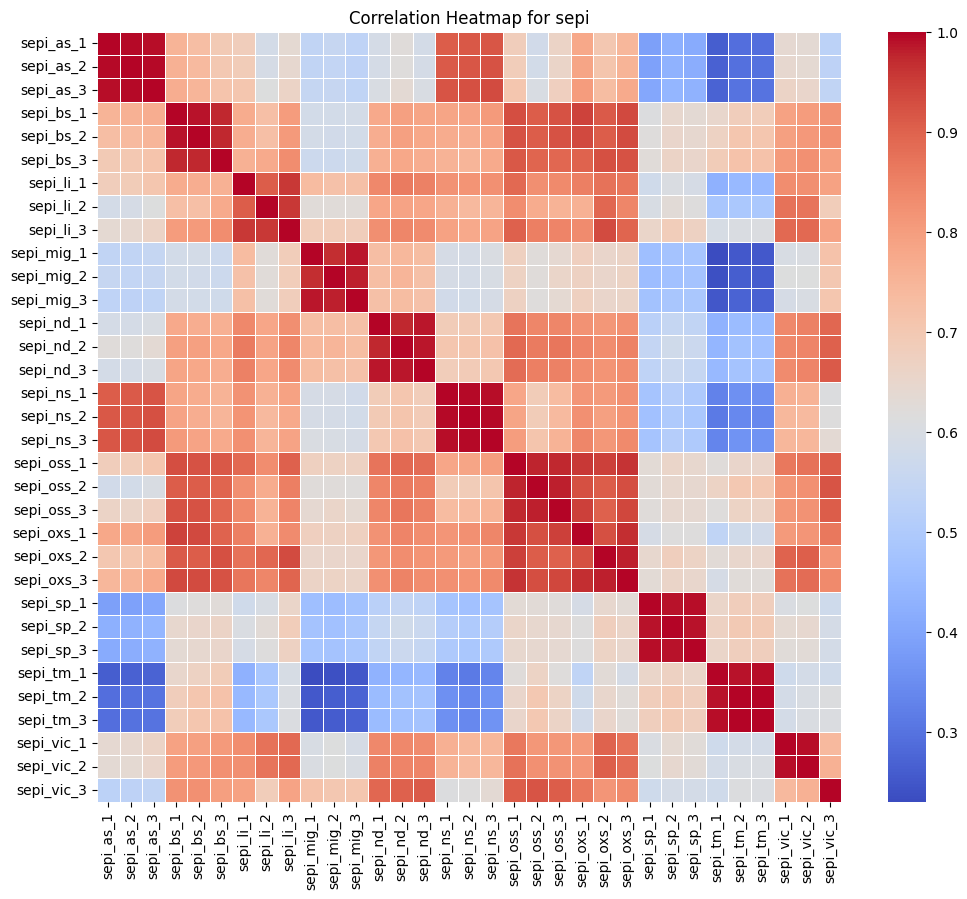

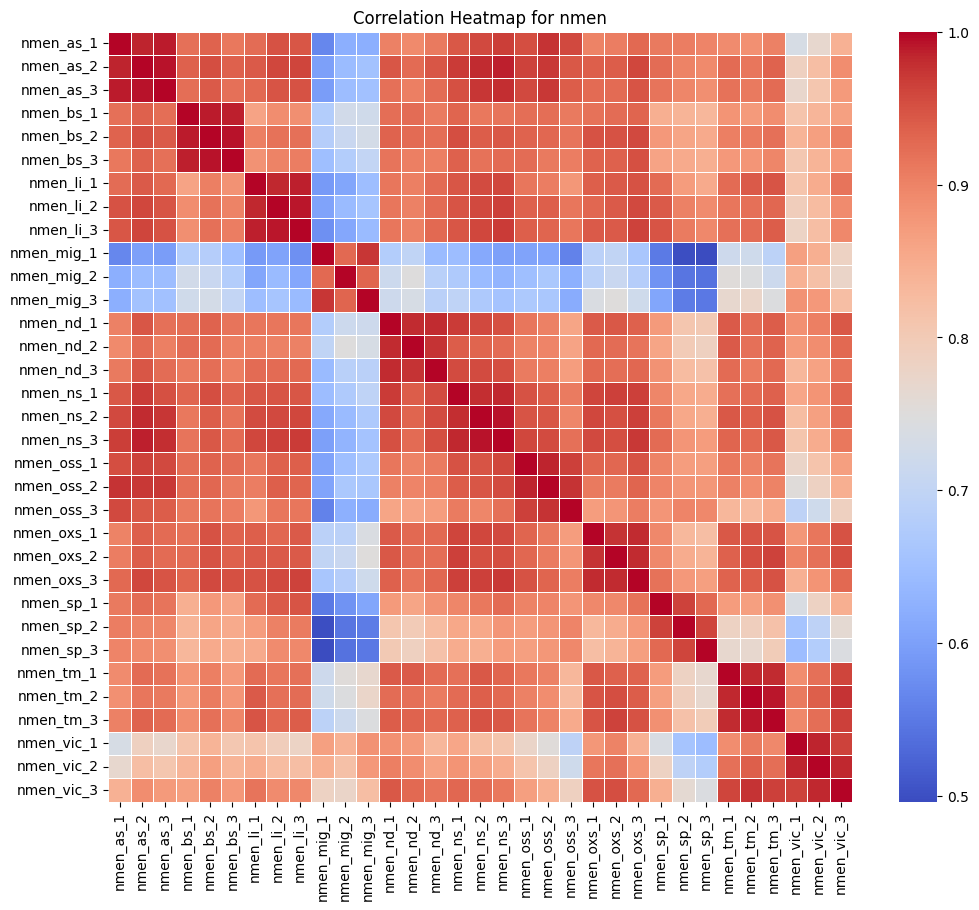

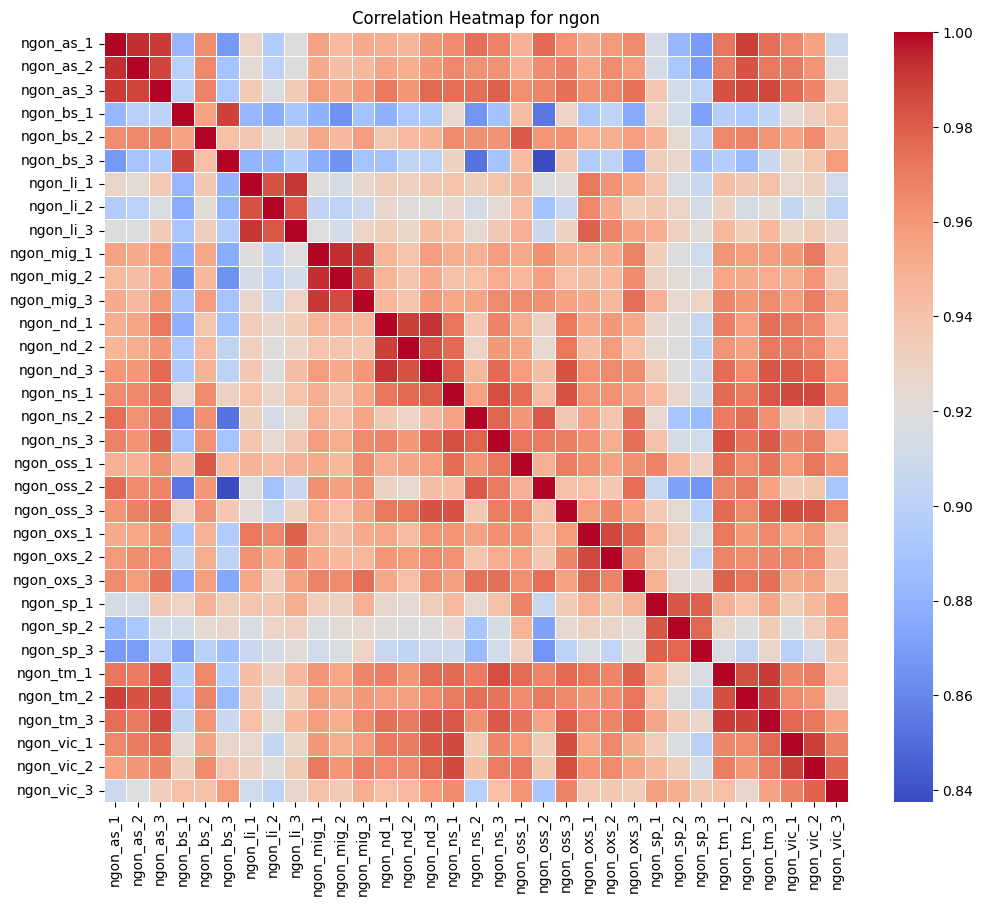

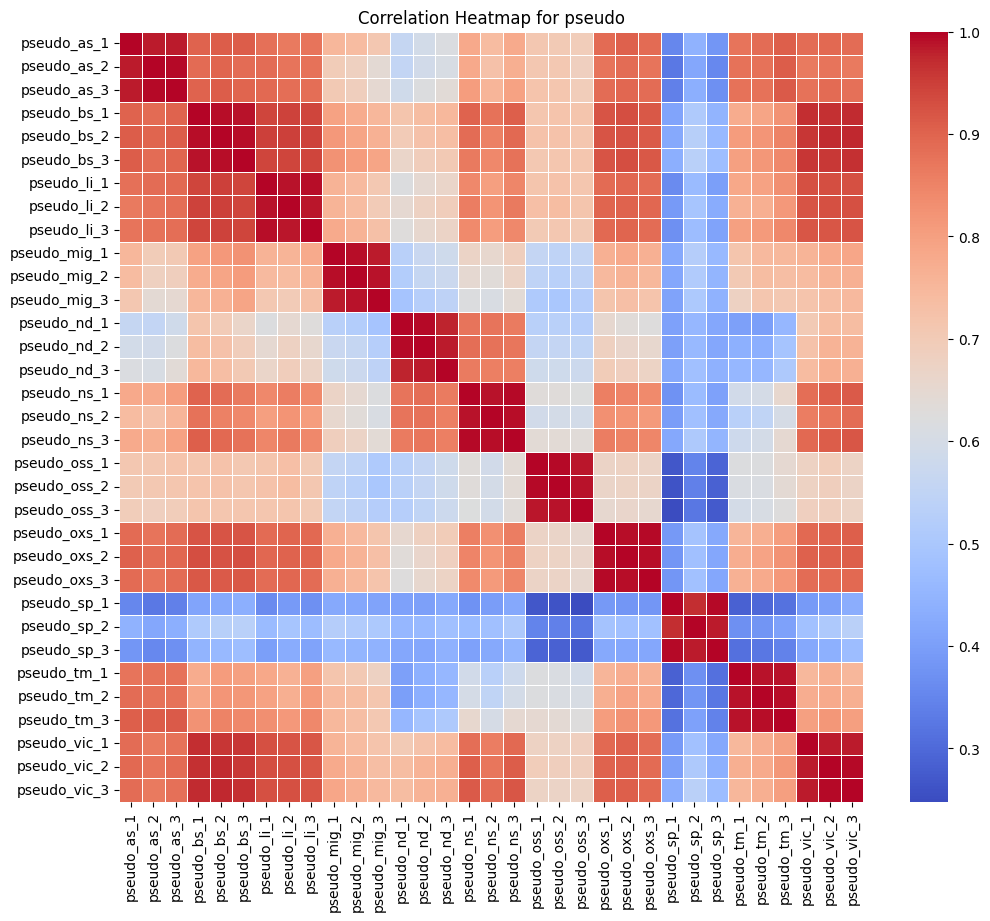

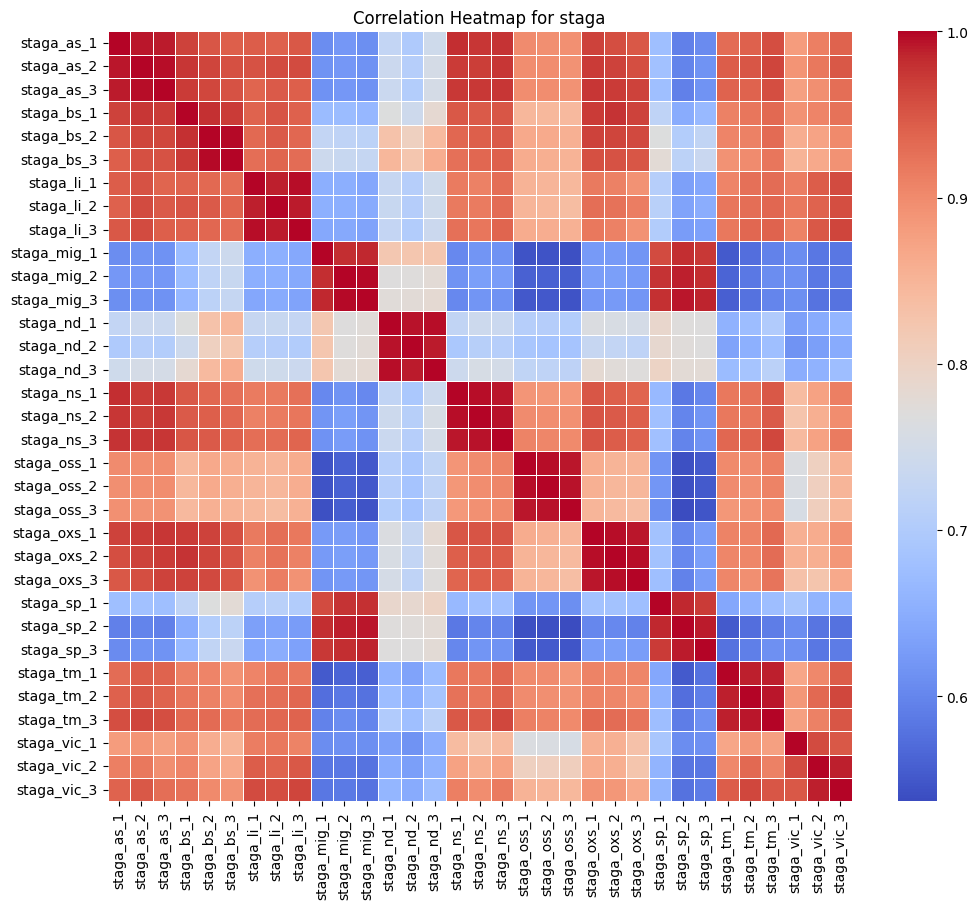

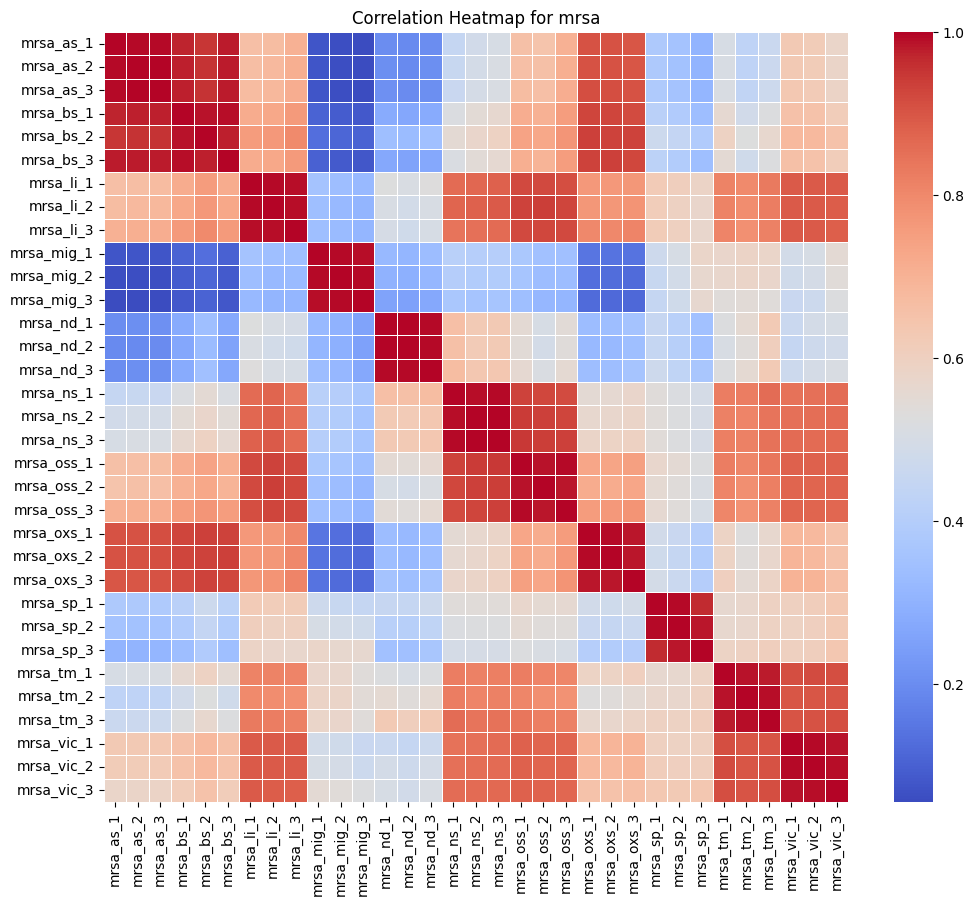

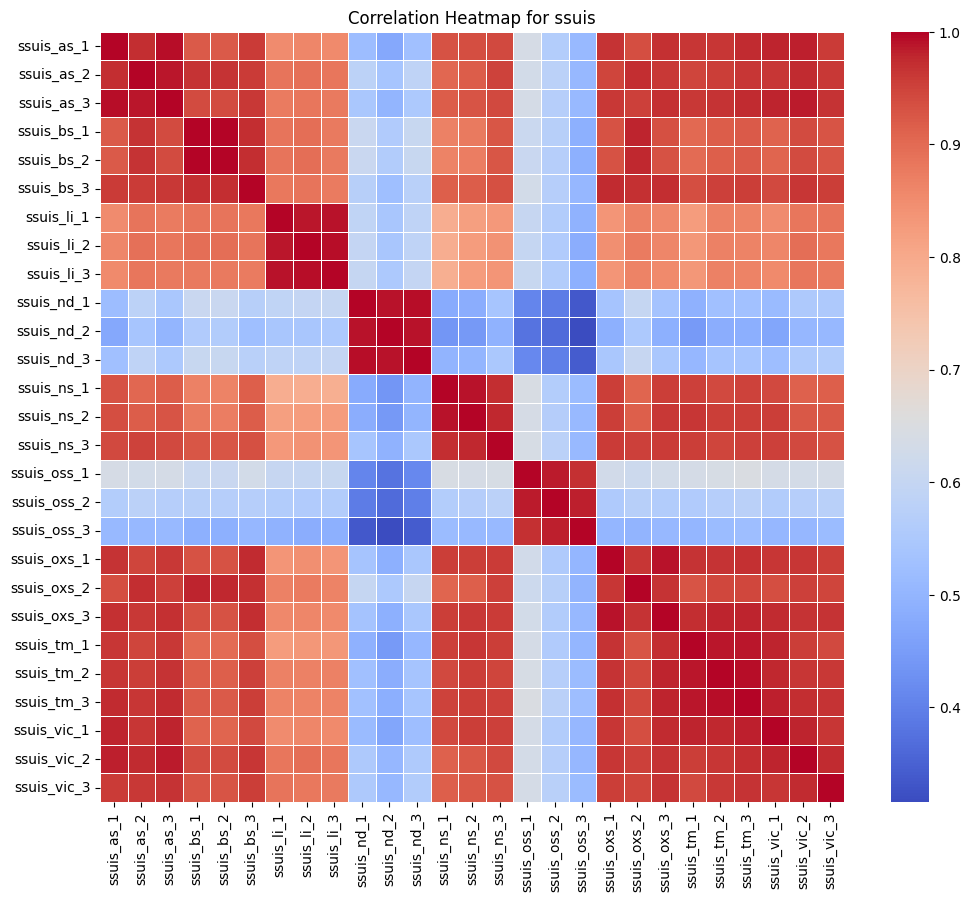

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


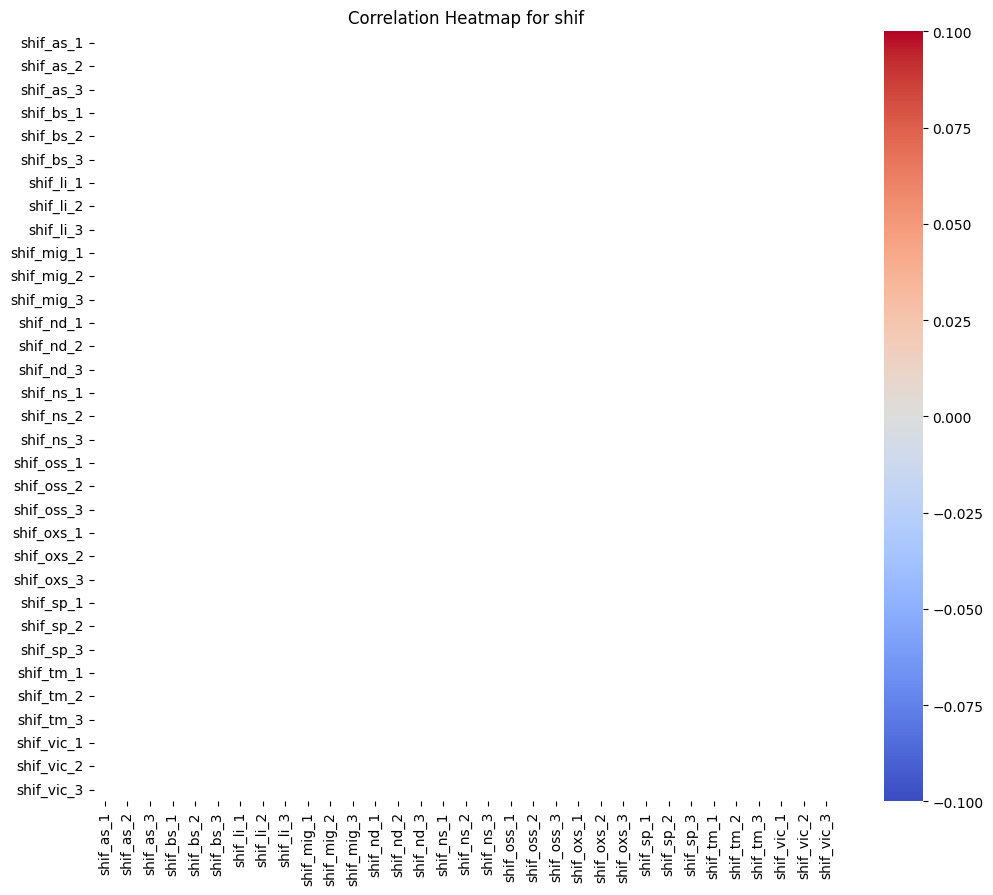

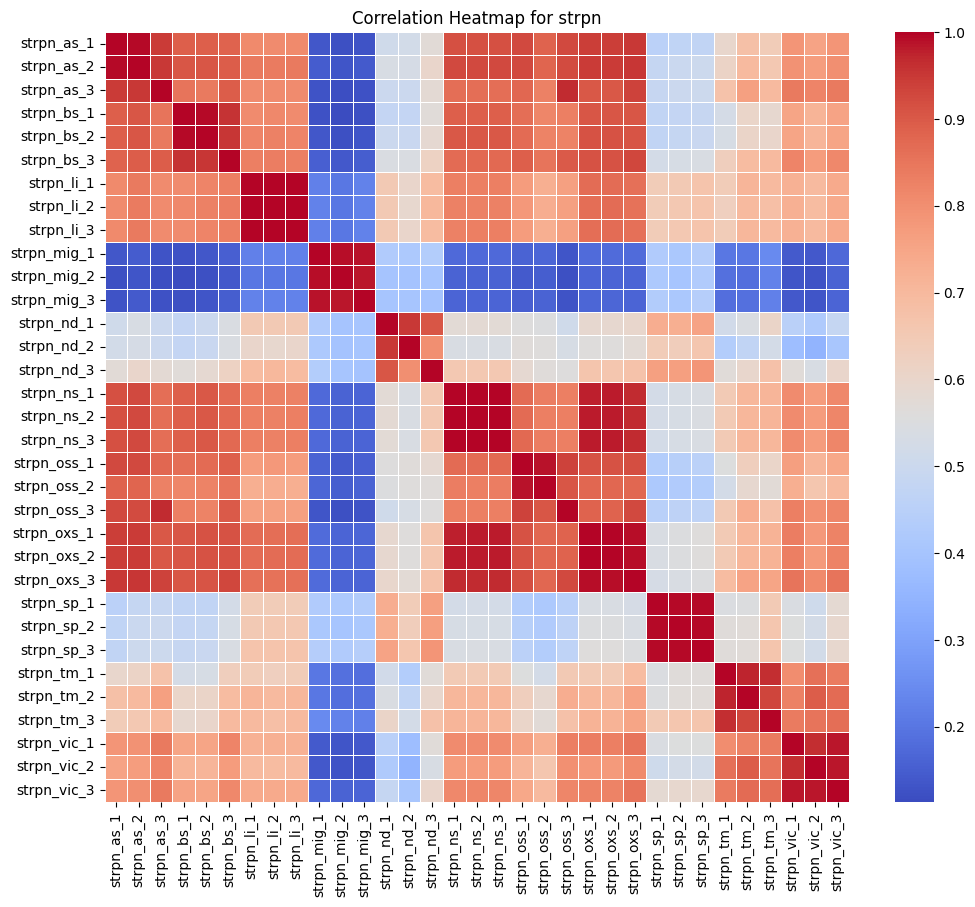

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


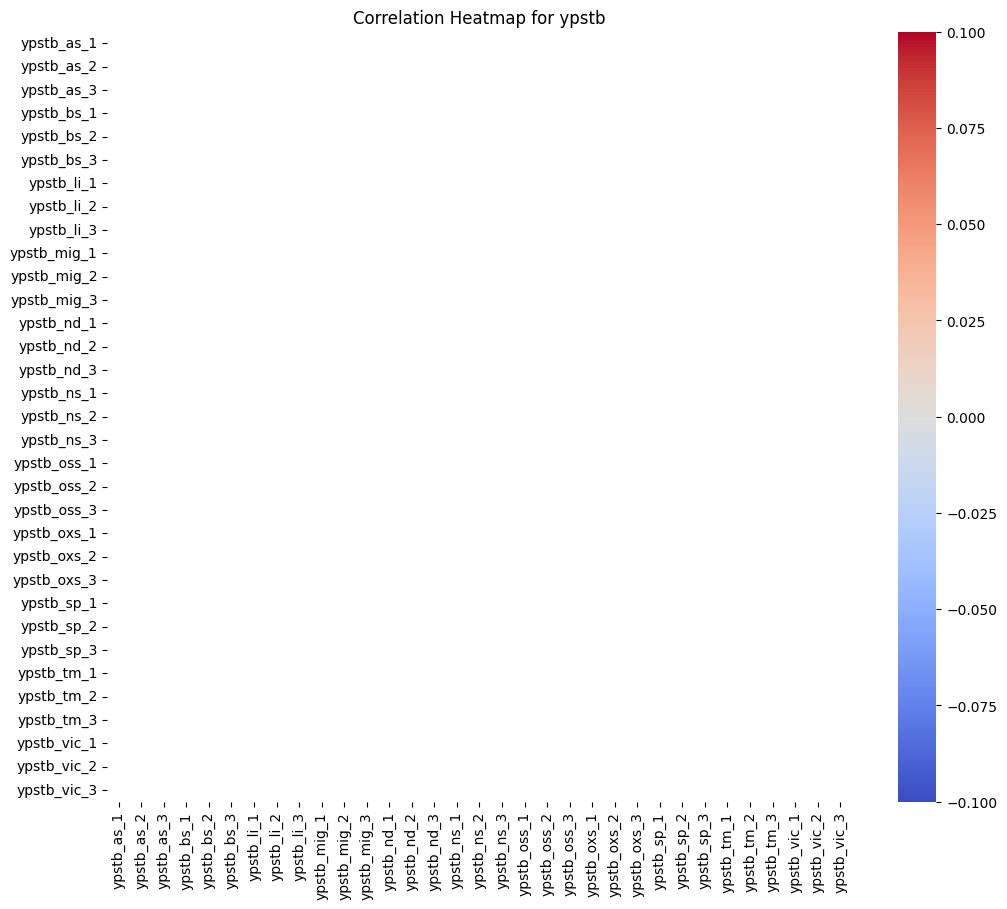

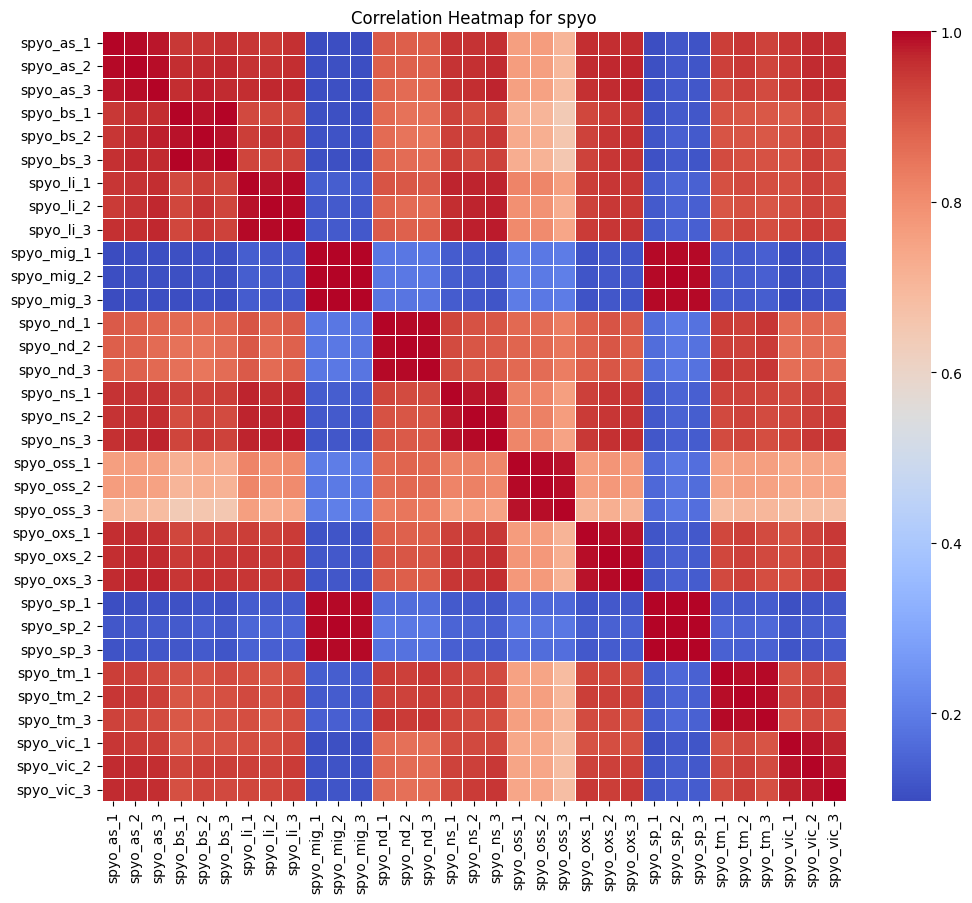

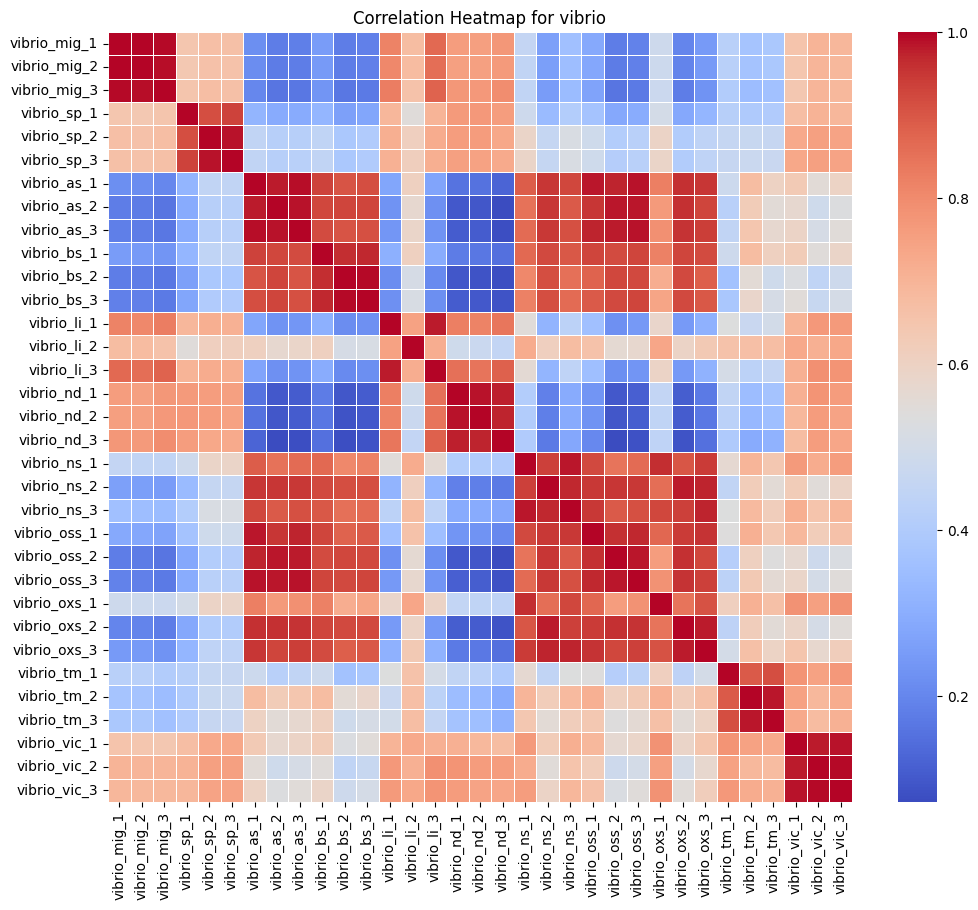

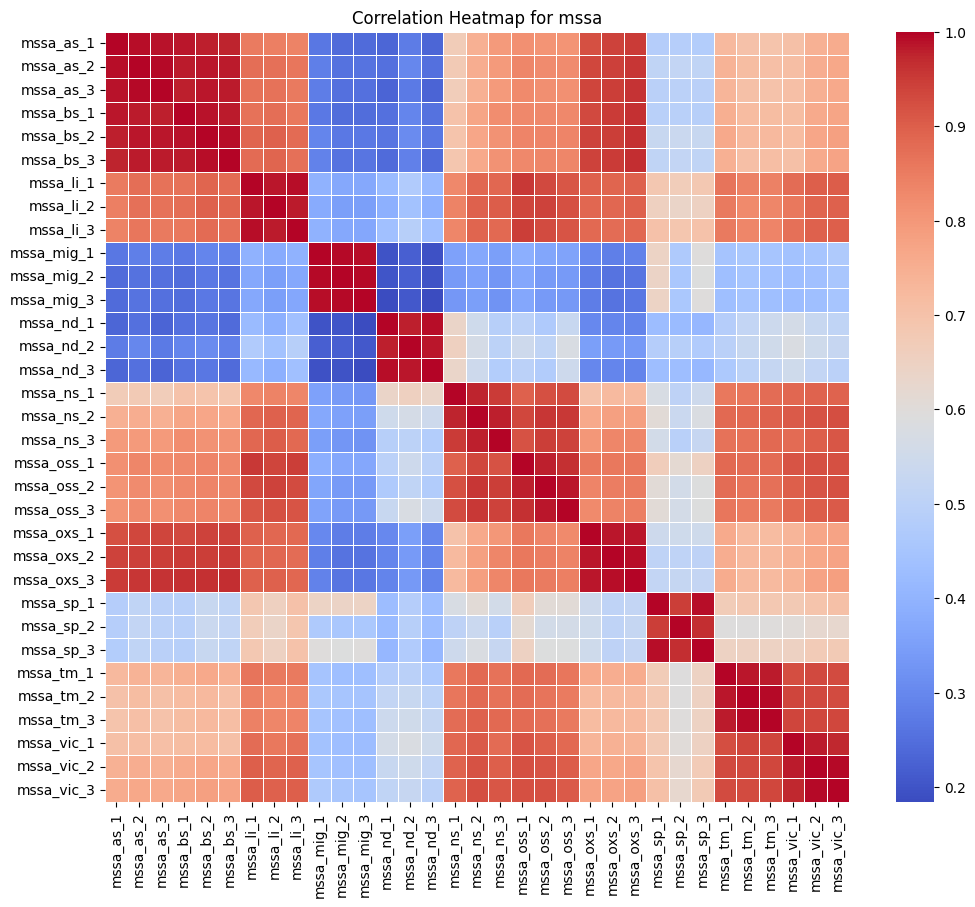

In [74]:
for species in species_list:
    species_columns = [col for col in filtered_data.columns if col.startswith(species)]
    if species_columns:
        species_data = filtered_data[species_columns]

        # Calculate the correlation matrix
        corr_matrix = species_data.corr()

        # Setting the drawing size
        plt.figure(figsize=(12, 10))

        # Heat mapping of correlations
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title(f'Correlation Heatmap for {species}')
        plt.show()

# Basic info of combined_data

In [124]:
#combined_data
print("\nFirst 5 rows of the combined data:")
print(combined_data.head())
print("\nDetails of combined data:")
print(f"Total rows: {combined_data.shape[0]}, Total columns: {combined_data.shape[1]}")
print("Column names:", combined_data.columns.tolist())


First 5 rows of the combined data:
   Unnamed: 0                            Species   Chromosome  \
0           0  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
1           1  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
2           2  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
3           3  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
4           4  Achromobacter xylosoxidans SOLR10  NZ_CP025774   

                   Region  As_1 (GE) - TPM  As_2 (GE) - TPM  As_3 (GE) - TPM  \
0      complement(1..400)      4579.764521      2874.021275      2805.289041   
1   complement(980..2143)        14.339311        17.782257        23.076558   
2  complement(2164..3555)         8.624839        10.448941         3.816945   
3  complement(3599..4984)        21.127260        38.747719        23.426751   
4  complement(5049..5855)       338.906377       344.525203       239.579899   

   Bs_1 (GE) - TPM  Bs_2 (GE) - TPM  Bs_3 (GE) - TPM  ...  Sp_2 (GE) - TPM  \
0      3462.30

The 'Species' column represents each species in the species_list.
The columns in the table include multiple measurements under different conditions.

Examples:
'As_1 (GE) - TPM', 'As_2 (GE) - TPM', 'As_3 (GE) - TPM' corresponds to condition 'as'.


'Bs_1 (GE) - TPM', 'Bs_2 (GE) - TPM', 'Bs_3 (GE) - TPM' corresponds to condition 'bs'.


This pattern applies to all listed conditions (all_conditions).

'Species ID' and 'upstream200' provide a unique identifier for the species or genomic region and additional genetic or location information.

Columns without full nan values are more compact data

In [125]:
# Find all columns that are all NaN
nan_columns = combined_data.columns[combined_data.isna().all()].tolist()
print(nan_columns)

[]


The Species ID, Species, Chromosome: one-to-one correspondence

In [126]:
import pandas as pd

data = {
    'Species': [
        'Achromobacter xylosoxidans SOLR10', 'Acinetobacter baumannii AB5075-UW',
        'Aggregatibacter actinomycetemcomitans D7S-1', 'Borrelia burgdorferi B31',
        'Burkholderia pseudomallei K96243', 'Campylobacter jejuni subsp. jejuni 81-176',
        'Enterococcus faecalis OG1RF', 'Escherichia coli EPEC 0127:H6 E2348/69',
        'Escherichia coli ETEC H10407', 'Escherichia coli UPEC 536',
        'Francisella tularensis subsp. holarctica FSC200', 'Haemophilus influenzae 86-028NP',
        'Helicobacter pylori G27', 'Helicobacter pylori J99',
        'Klebsiella pneumoniae subsp. pneumoniae MGH 78578',
        'Legionella pneumophila subsp. pneumophila Philadelphia 1', 'Listeria monocytogenes EGD-e',
        'Mycobacterium tuberculosis H37Ra', 'Neisseria gonorrhoeae FA 1090',
        'Neisseria meningitidis serogroup C FAM18', 'Pseudomonas aeruginosa PAO1',
        'Salmonella enterica subsp. enterica serovar Typhimurium SL1344',
        'Staphylococcus\xa0aureus MRSA252', 'Staphylococcus\xa0aureus MSSA476',
        'Staphylococcus\xa0epidermidis 1457', 'Streptococcus agalactiae NEM316',
        'Streptococcus pneumoniae D39', 'Streptococcus pyogenes 5448',
        'Vibrio cholerae O1 biovar El Tor str. N16961', 'Streptococcus suis S10 -P1/7'
    ],
    'Species ID': [
        'ACHX', 'ACIB', 'AGGA', 'BBURG', 'BURK', 'Campy', 'ENTFA', 'EPEC', 'ETEC',
        'UPEC', 'FRAT', 'HINF', 'HP_G27', 'HPJ99', 'KLEBS', 'LEGIP', 'Listeria', 'MTB',
        'NGON', 'NMEN', 'PSEUDO', 'SALMT', 'MRSA', 'MSSA', 'SEPI', 'STAGA', 'STRPN',
        'SPYO', 'Vibrio', 'SSUIS'
    ],
    'Chromosome': [
        'NZ_CP025774', 'NZ_CP025775', 'NZ_CP008706', 'NZ_CP008707', 'NZ_CP008708',
        'NZ_CP008709', 'NC_017846', 'NC_000948', 'NC_000949', 'NC_000950', 'NC_000951',
        'NC_000952', 'NC_000953', 'NC_000954', 'NC_000955', 'NC_000956', 'NC_000957',
        'NC_001318', 'NC_001849', 'NC_001850', 'NC_001851', 'NC_001852', 'NC_001853',
        'NC_001854', 'NC_001855', 'NC_001856', 'NC_001857', 'NC_001903', 'NC_001904',
        'NC_006350'
    ]
}



# Check the number of unique values
unique_species = combined_data['Species'].nunique()
unique_species_id = combined_data['Species ID'].nunique()
unique_chromosome = combined_data['Chromosome'].nunique()

print(f"Number of unique Species values: {unique_species}")
print(f"Number of unique Species ID values: {unique_species_id}")
print(f"Number of unique Chromosome values: {unique_chromosome}")

# Check for one-to-one relationships
species_id_map = combined_data[['Species', 'Species ID']].drop_duplicates()
species_chromosome_map = combined_data[['Species', 'Chromosome']].drop_duplicates()

# Check if Species -> Species ID is one-to-one
is_species_id_unique = species_id_map.shape[0] == unique_species

# Check if Species -> Chromosome is one-to-one
is_species_chromosome_unique = species_chromosome_map.shape[0] == unique_species

print(f"Is Species to Species ID a one-to-one relationship: {is_species_id_unique}")
print(f"Is Species to Chromosome a one-to-one relationship: {is_species_chromosome_unique}")

# If Species, Species ID, and Chromosome are one-to-one, each species has a unique Species ID and Chromosome
is_unique_relationship = is_species_id_unique and is_species_chromosome_unique

print(f"Are Species, Species ID, and Chromosome a one-to-one relationship: {is_unique_relationship}")


Number of unique Species values: 30
Number of unique Species ID values: 30
Number of unique Chromosome values: 76
Is Species to Species ID a one-to-one relationship: True
Is Species to Chromosome a one-to-one relationship: False
Are Species, Species ID, and Chromosome a one-to-one relationship: False


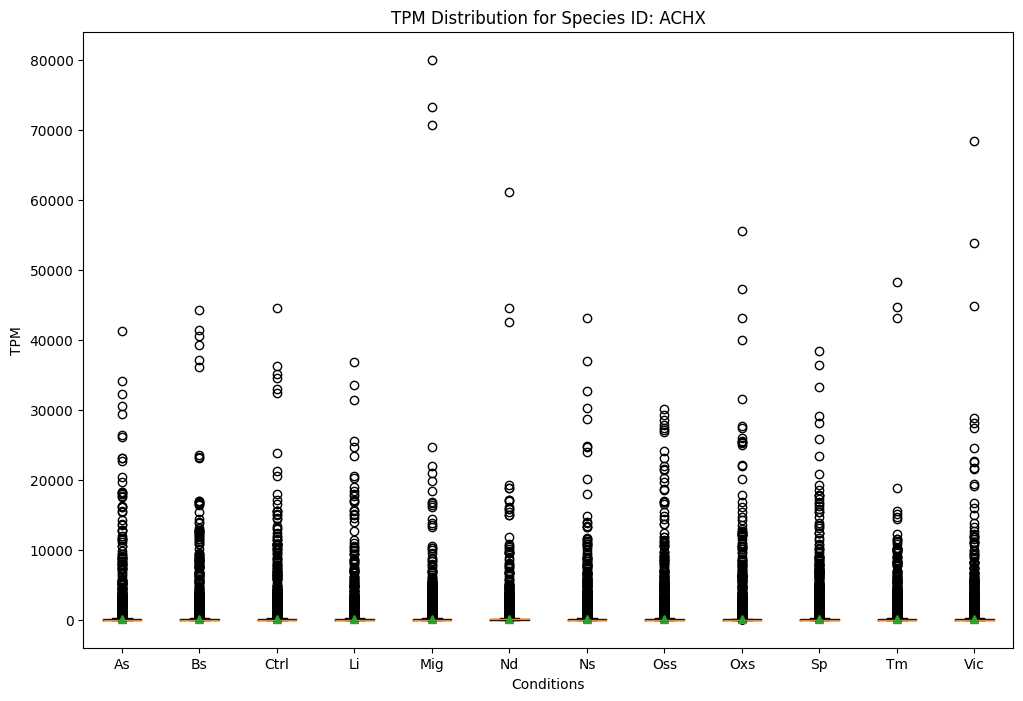

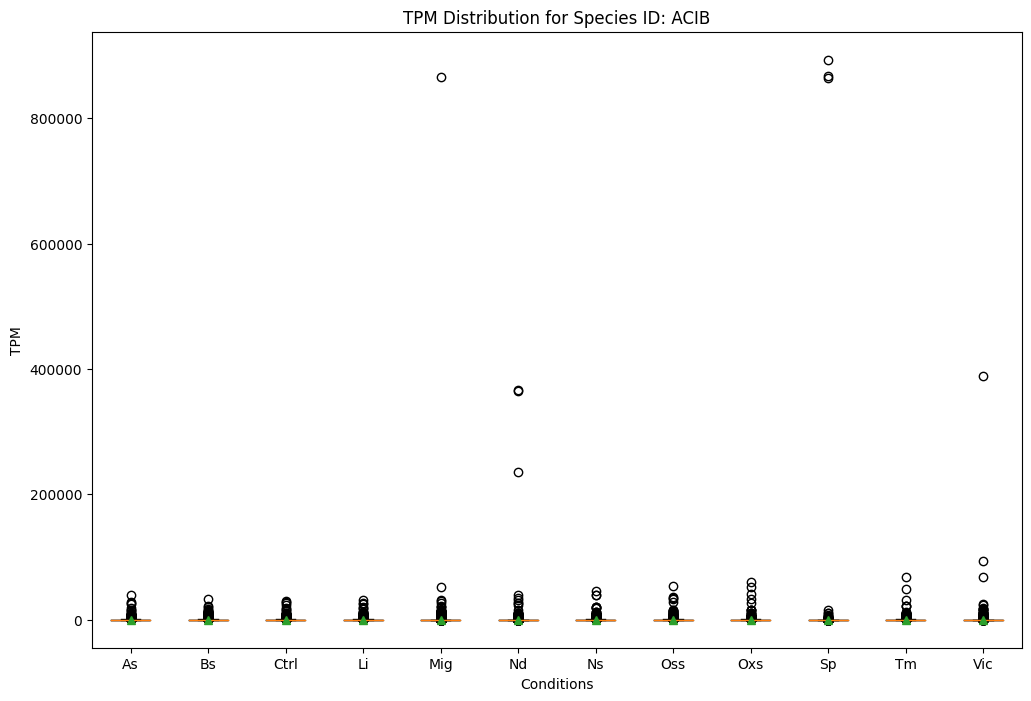

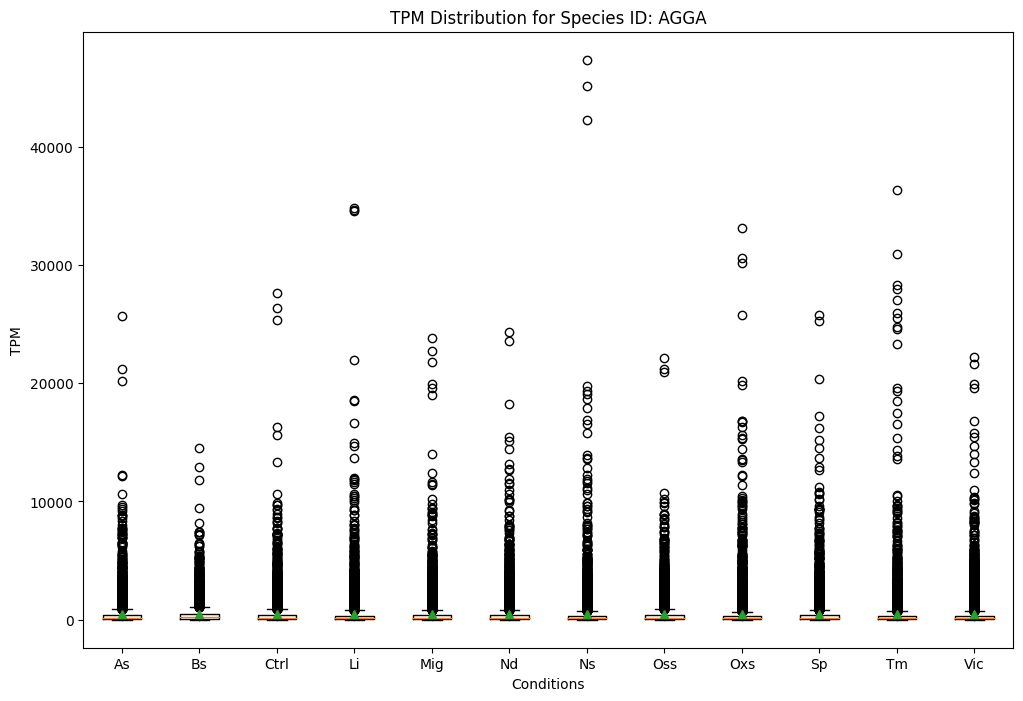

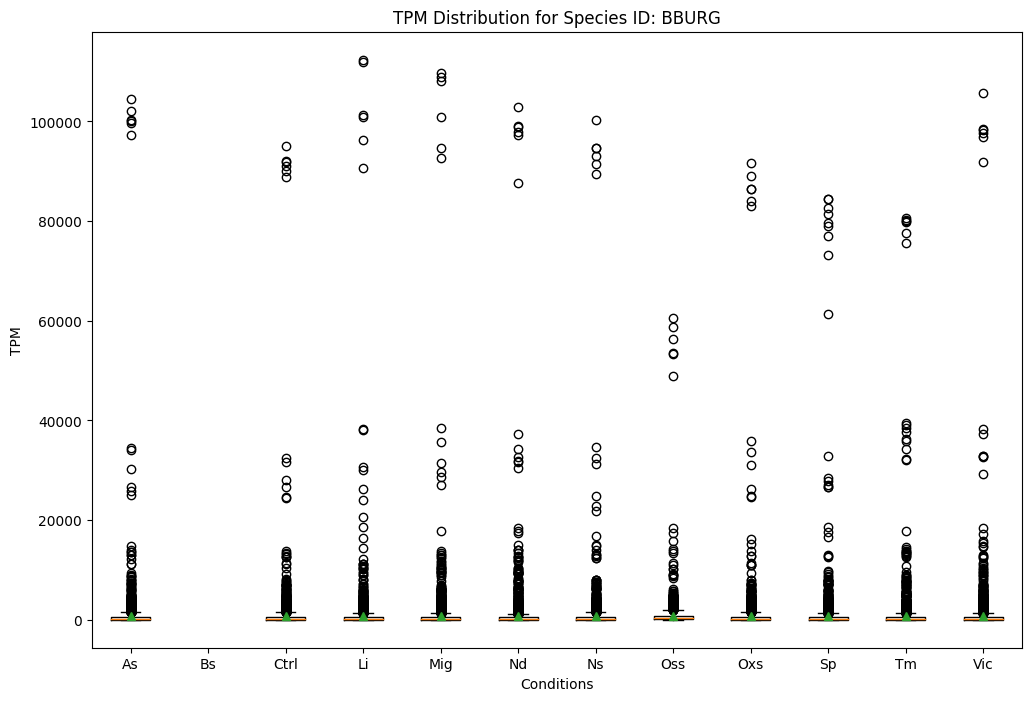

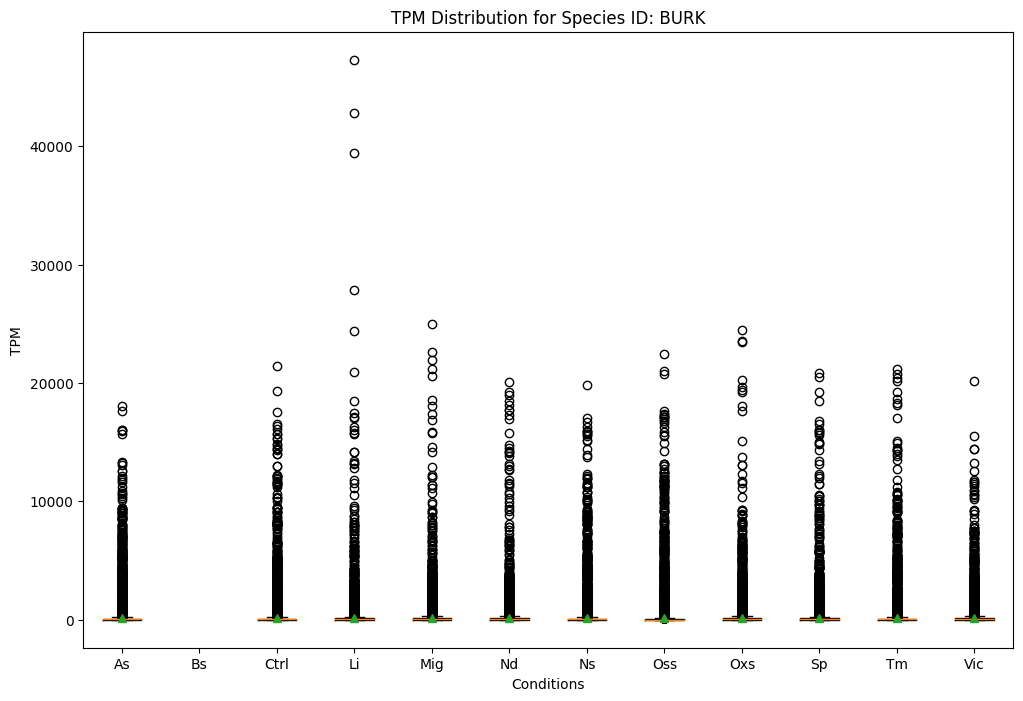

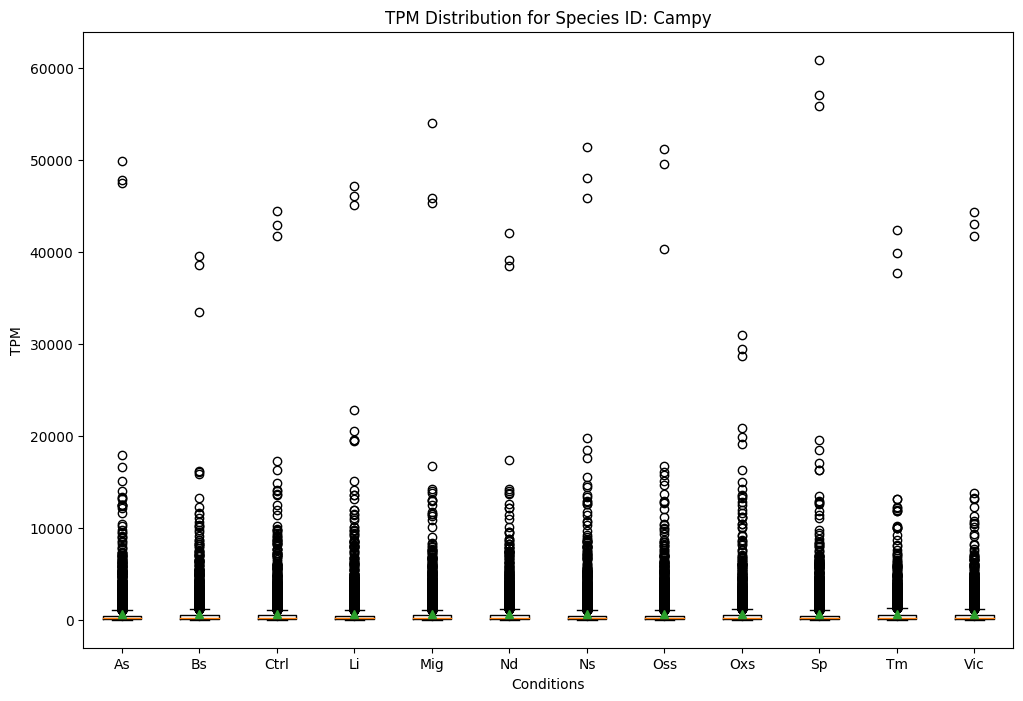

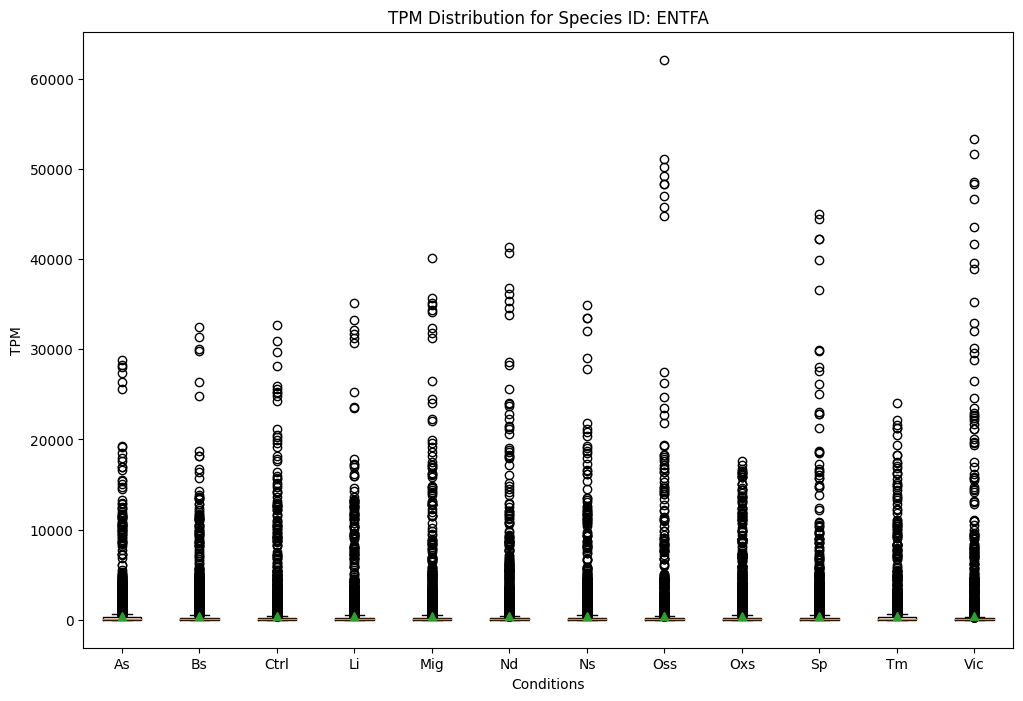

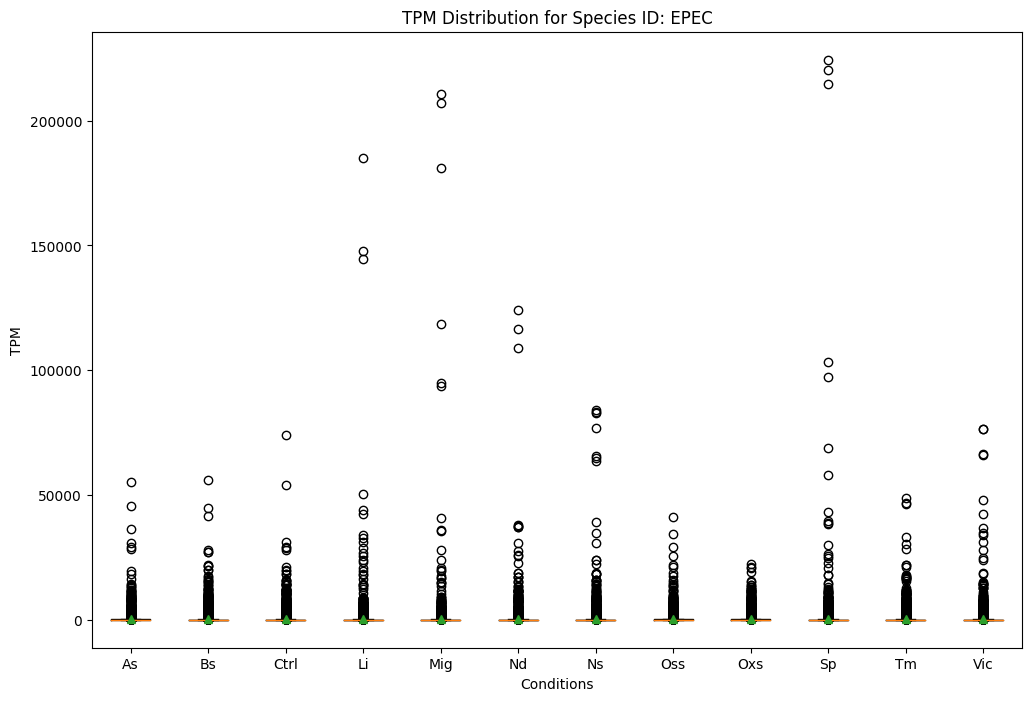

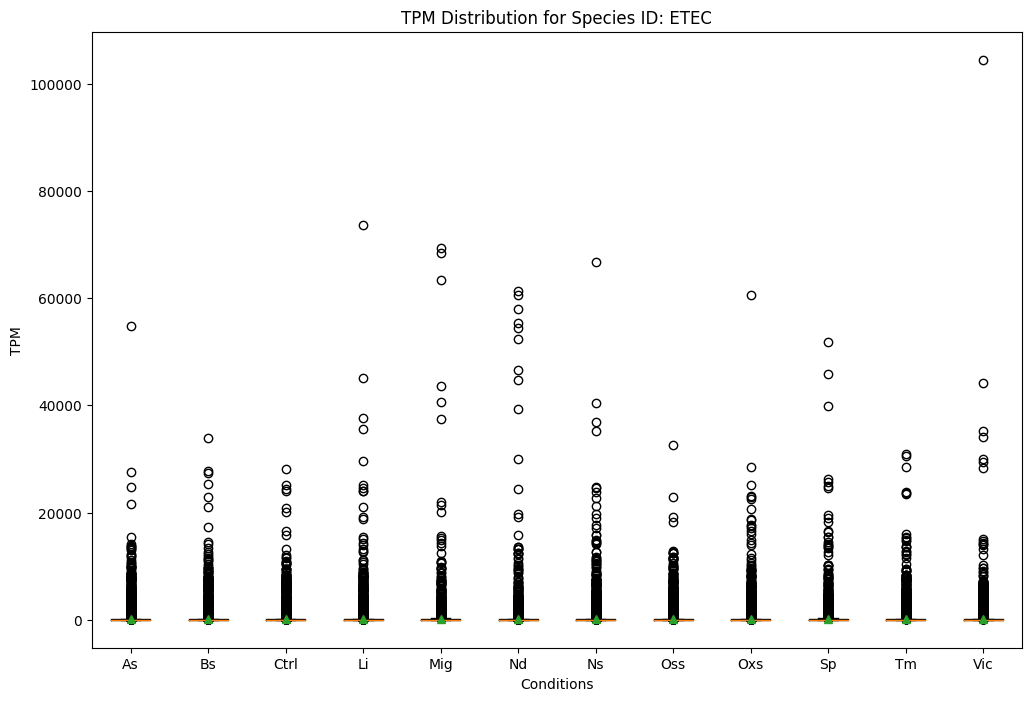

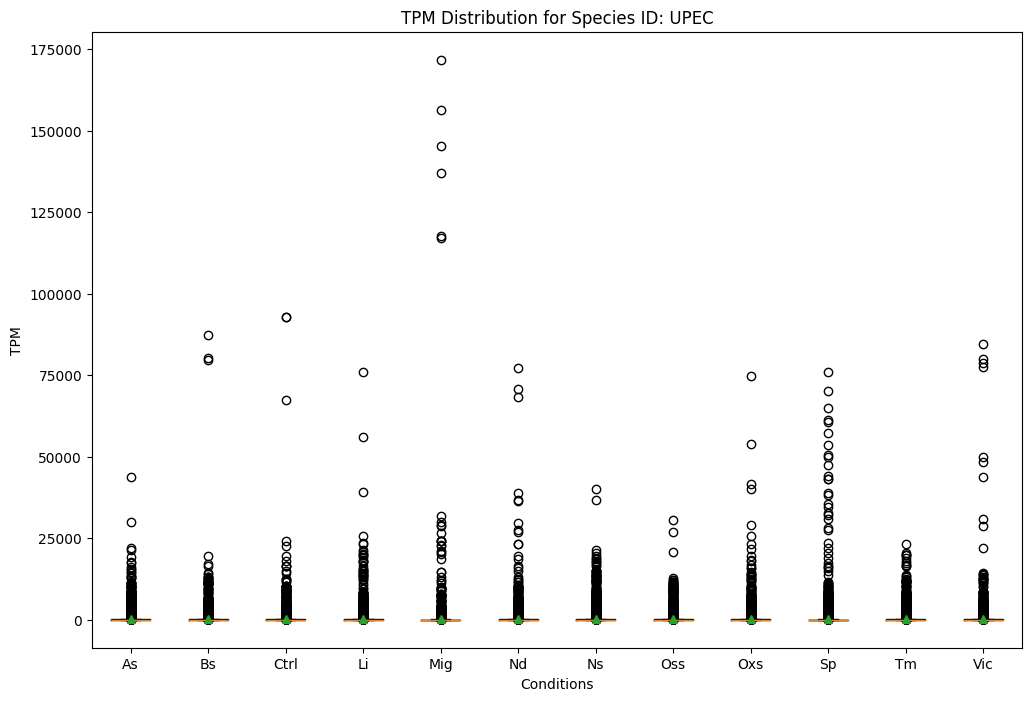

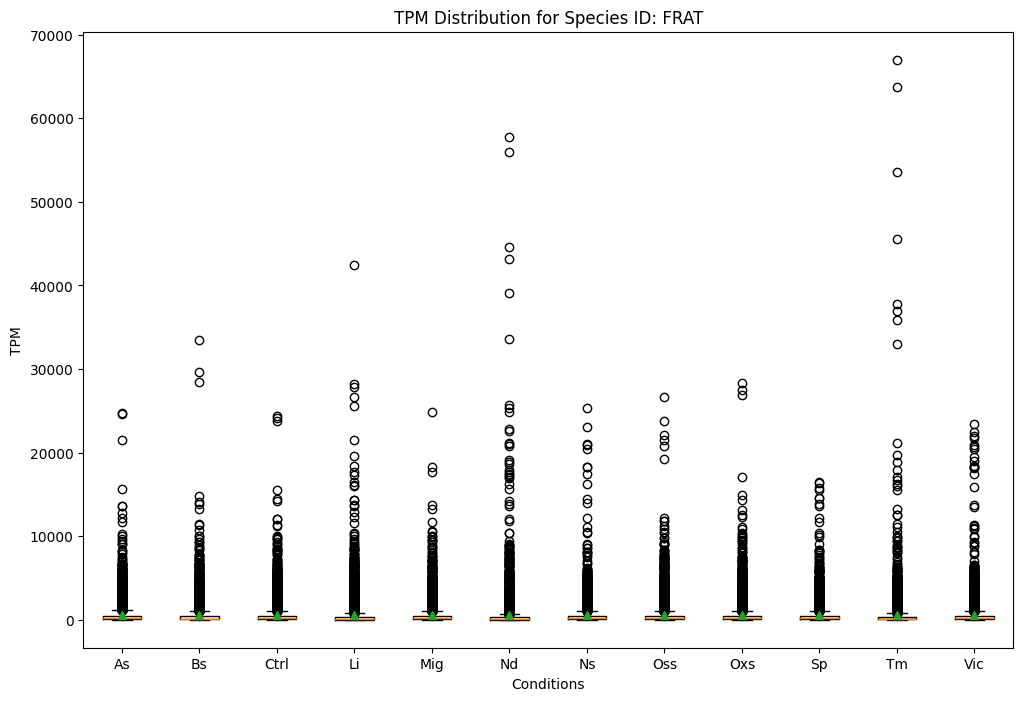

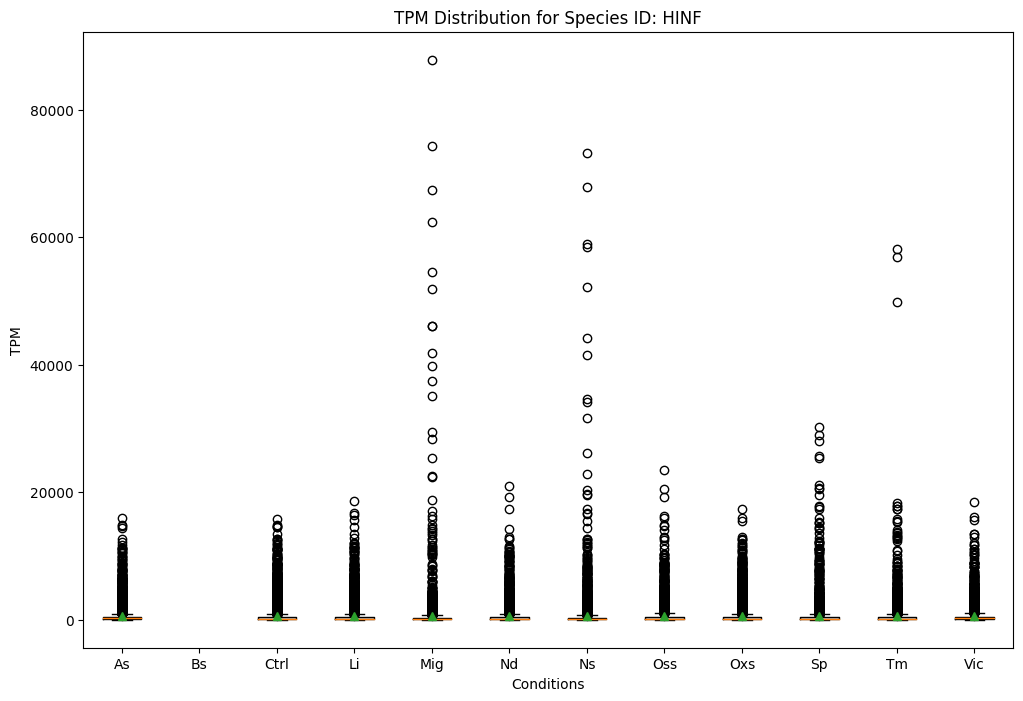

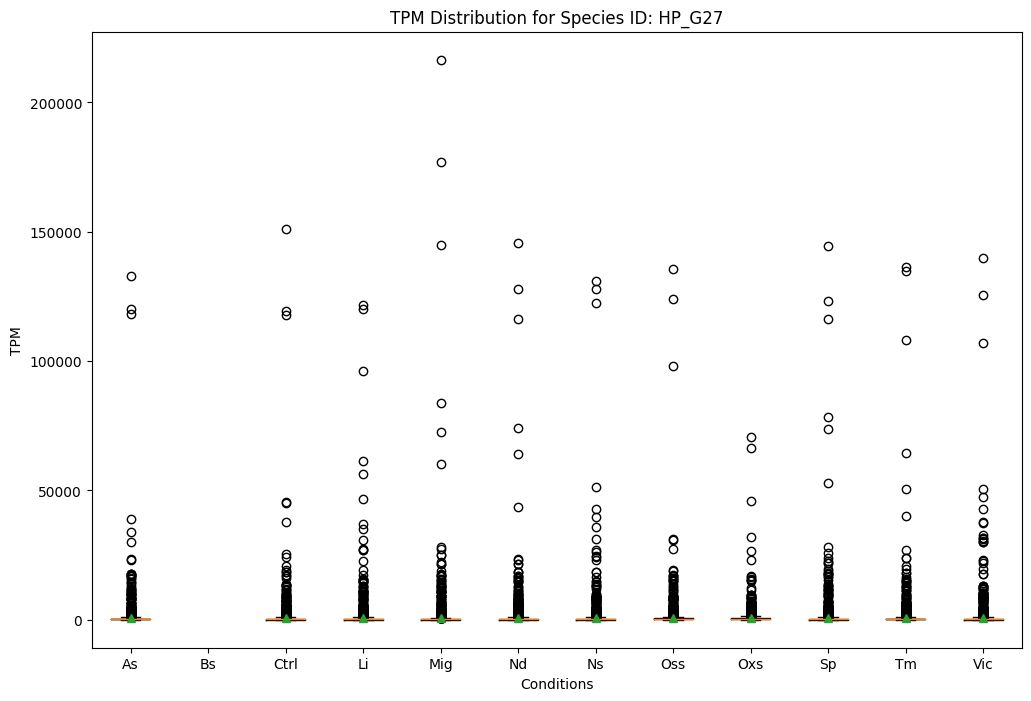

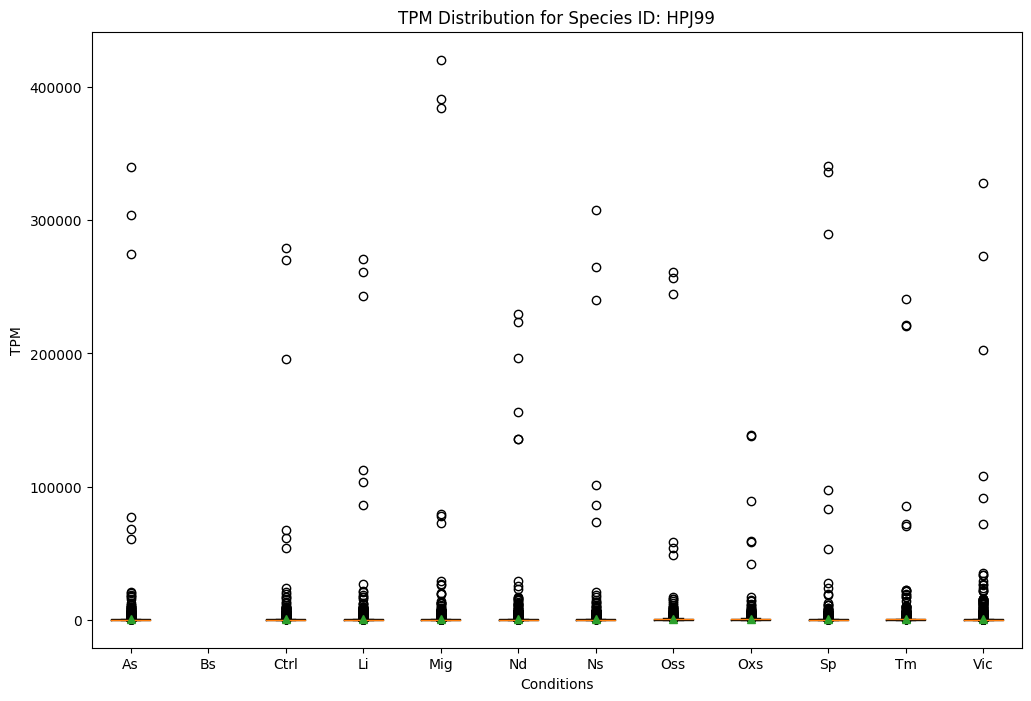

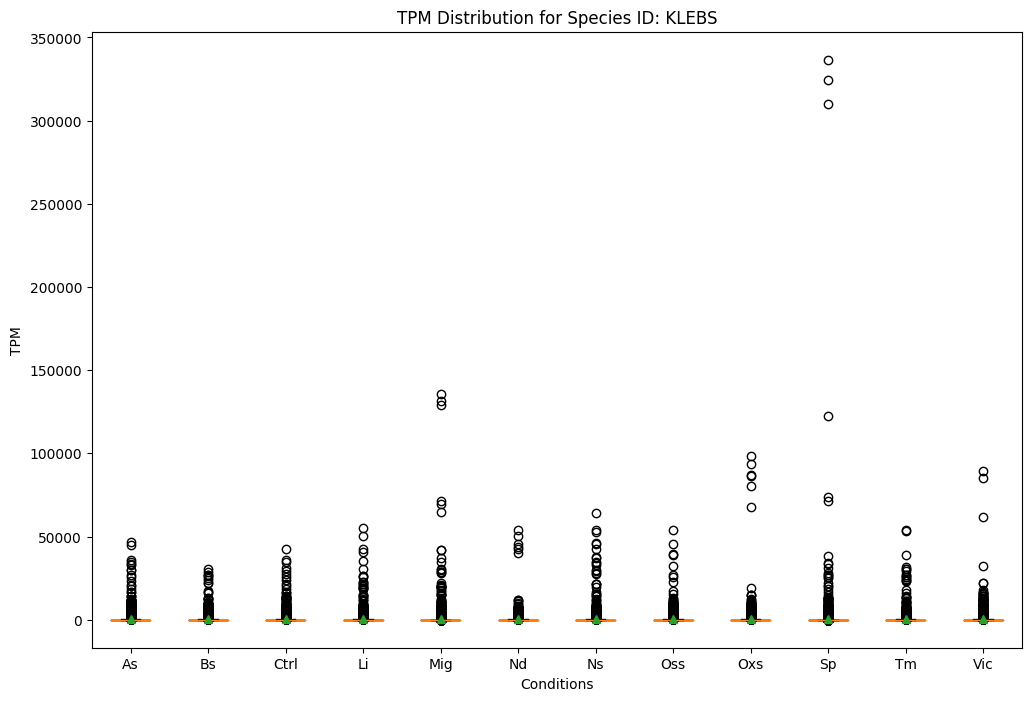

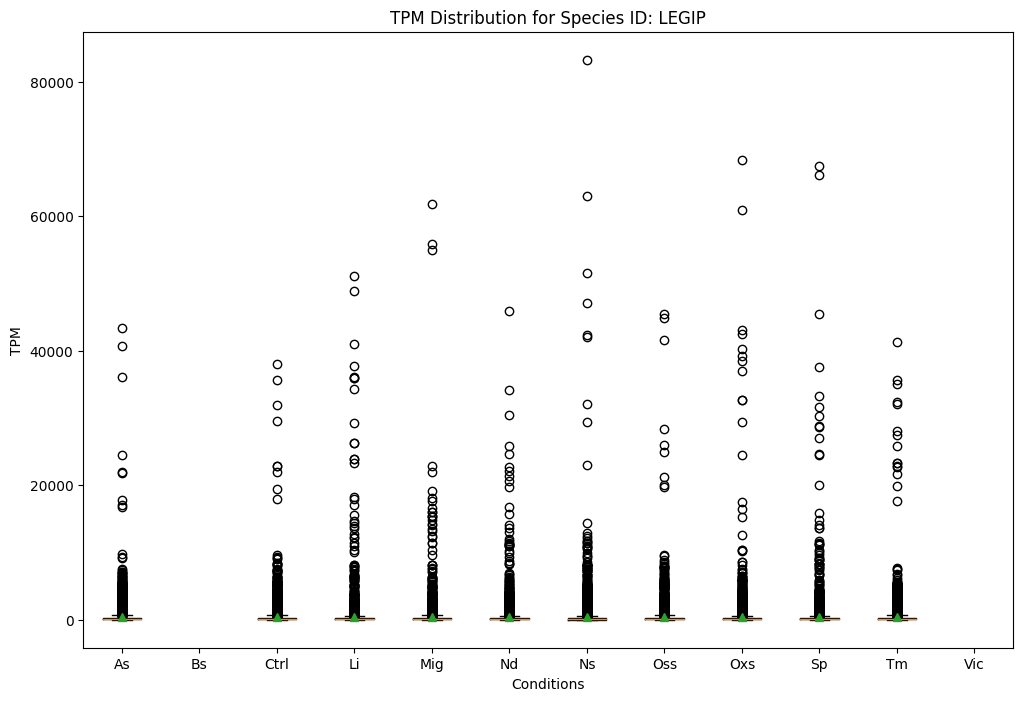

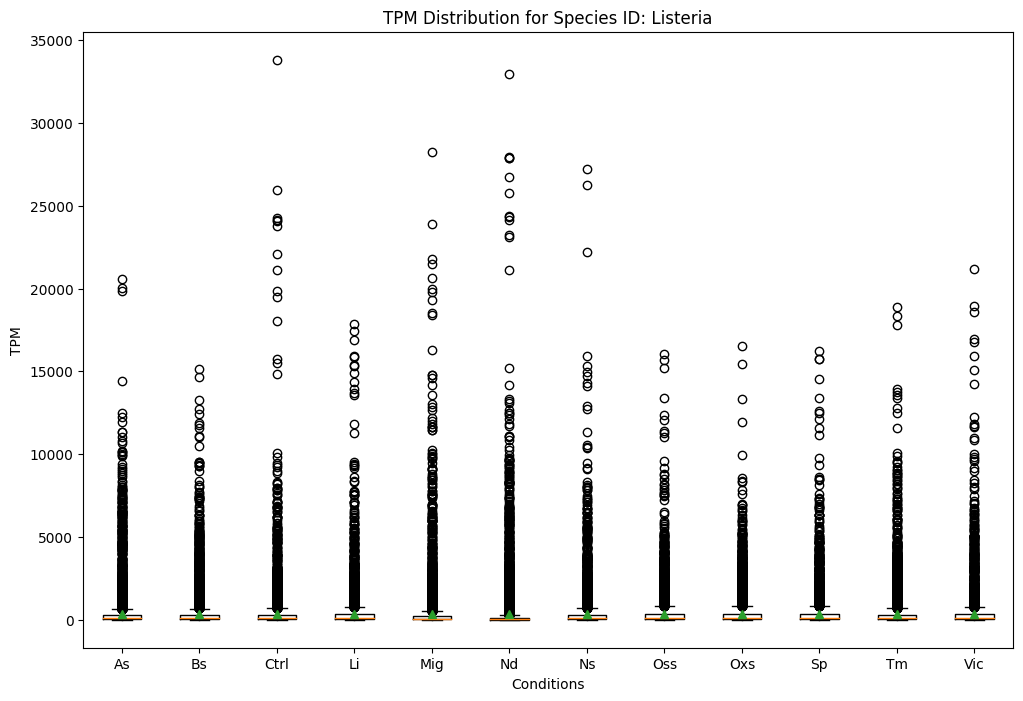

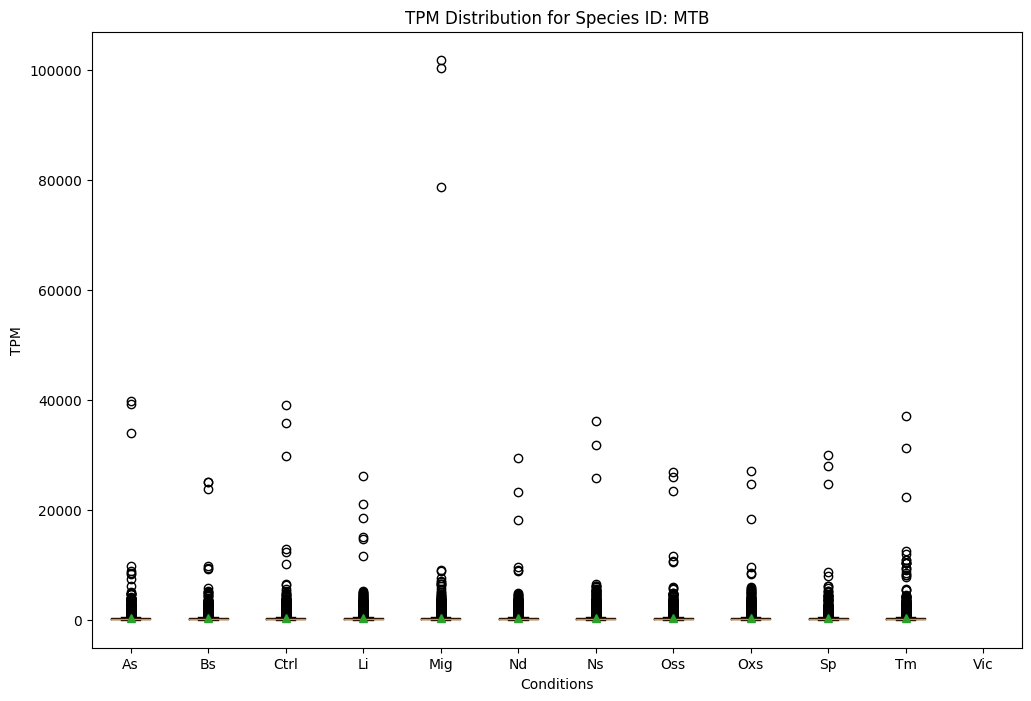

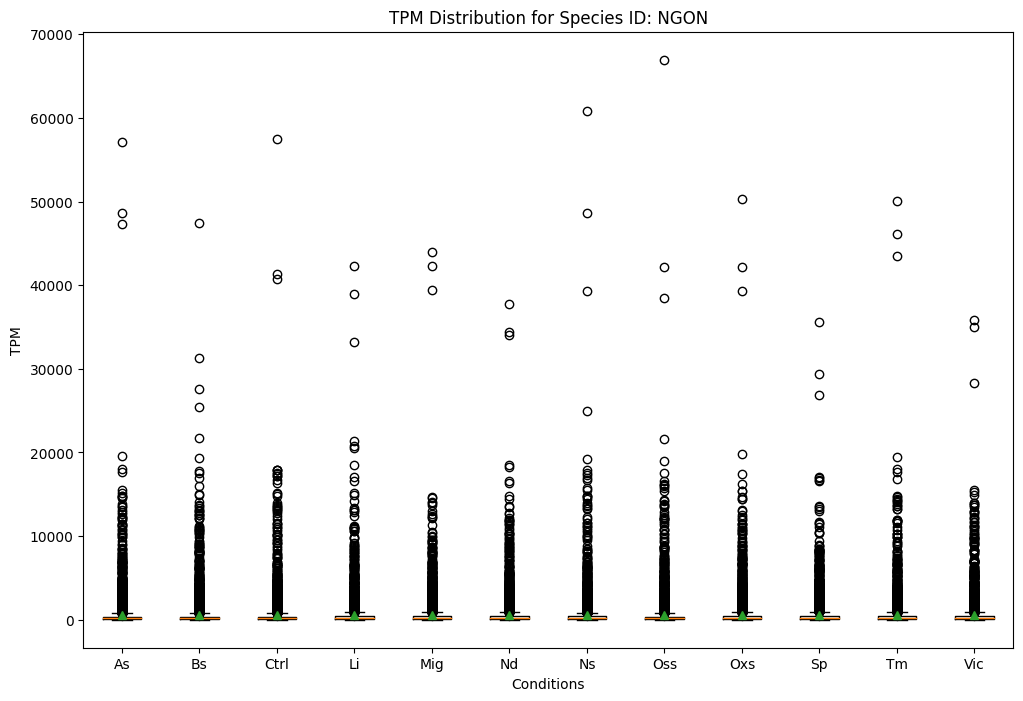

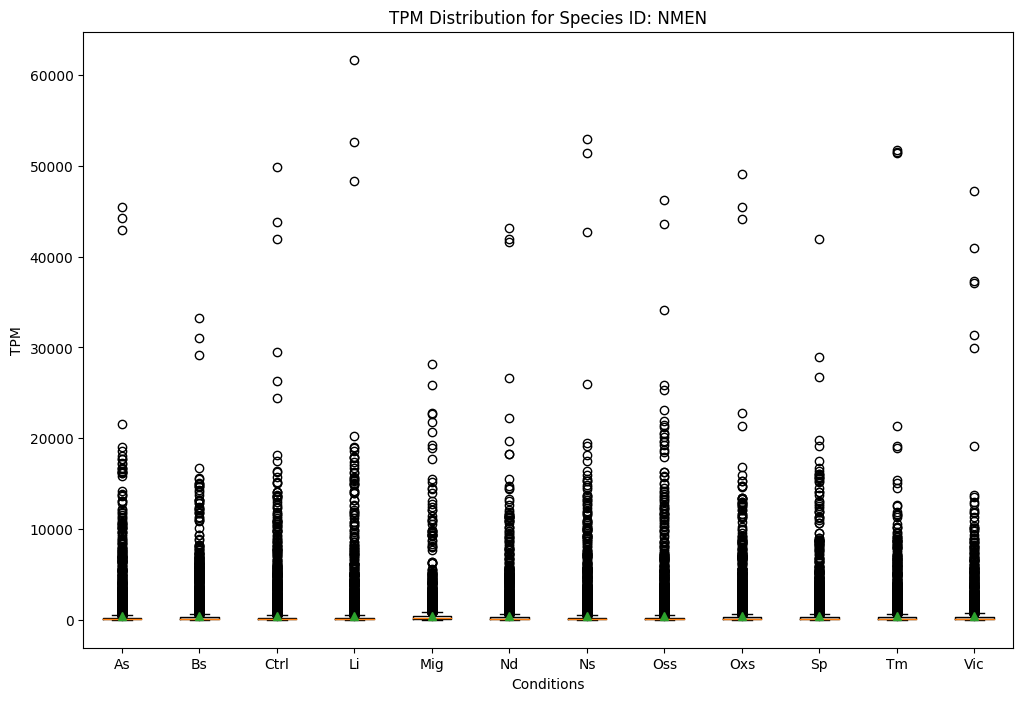

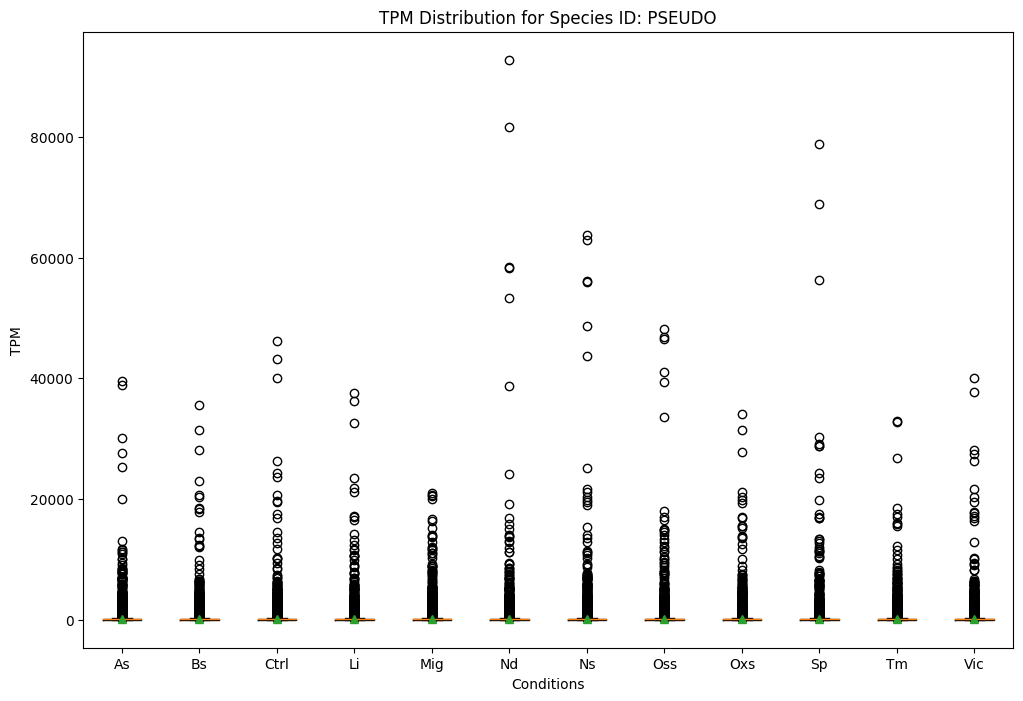

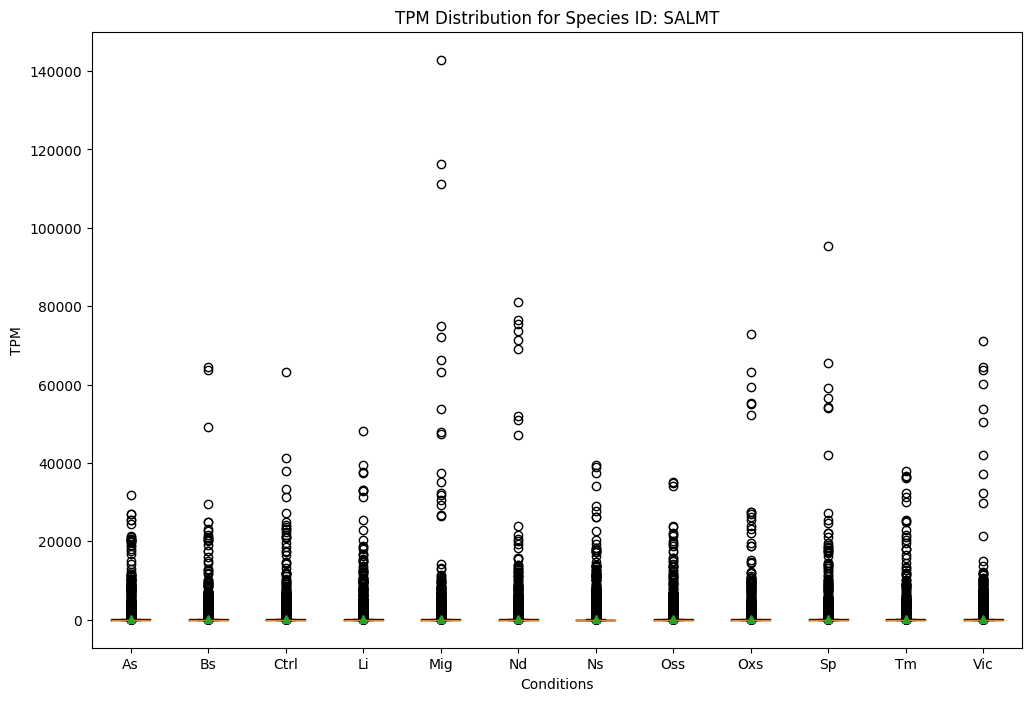

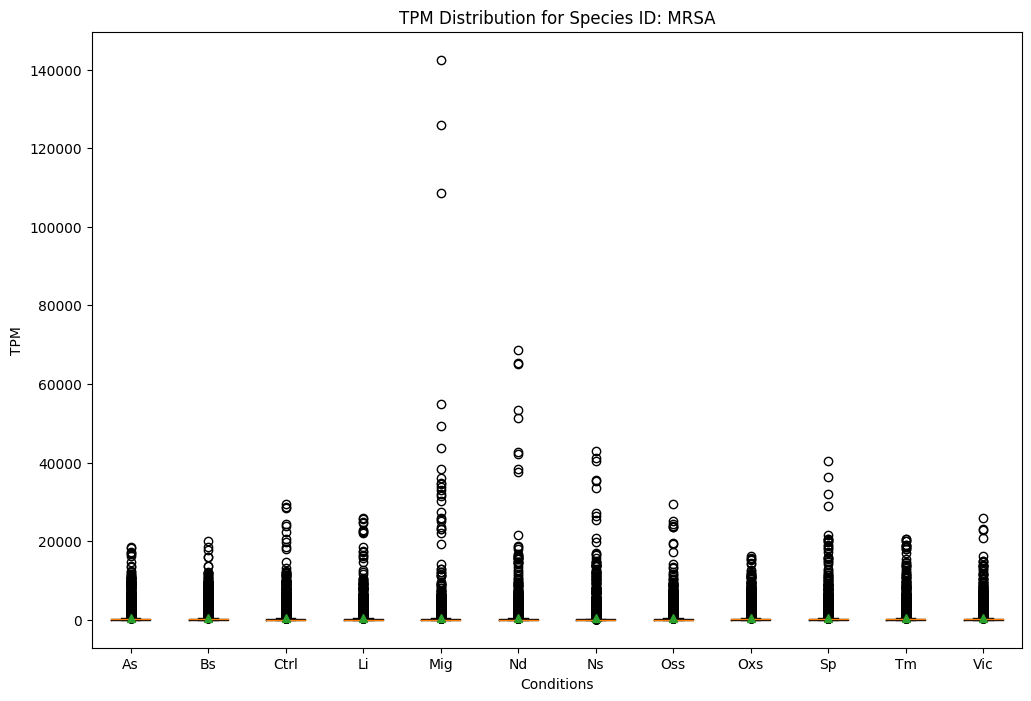

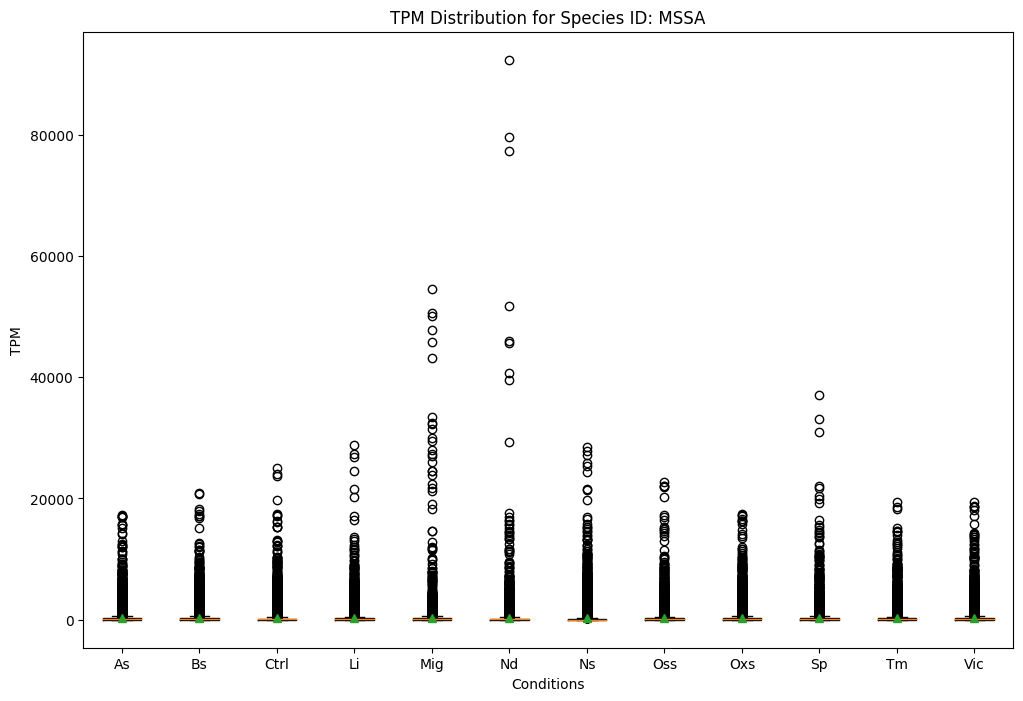

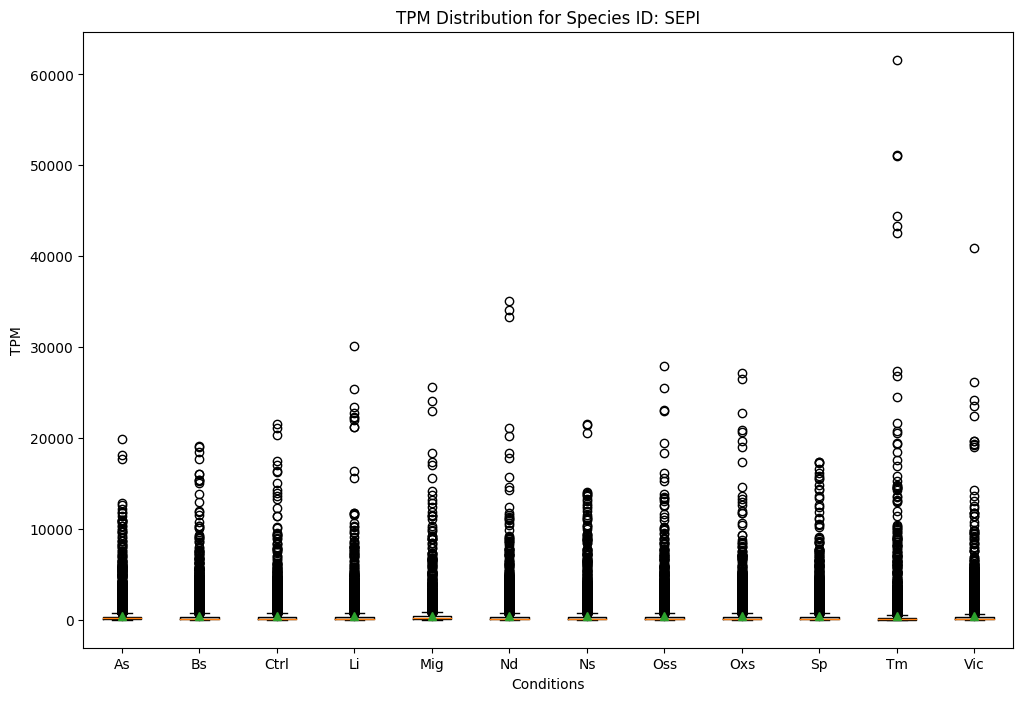

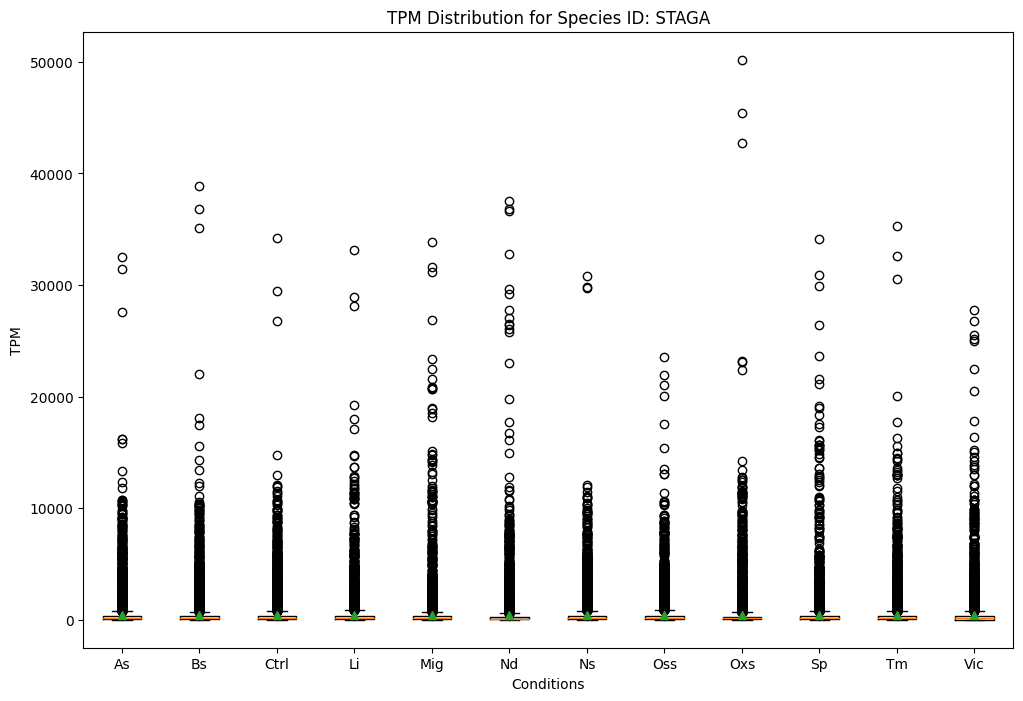

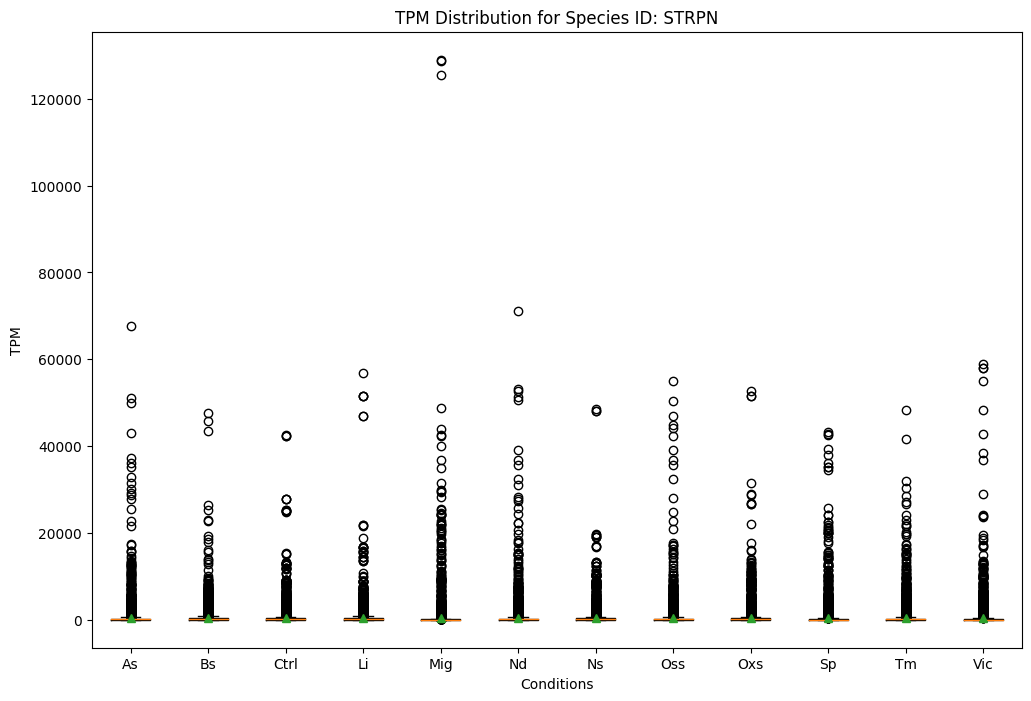

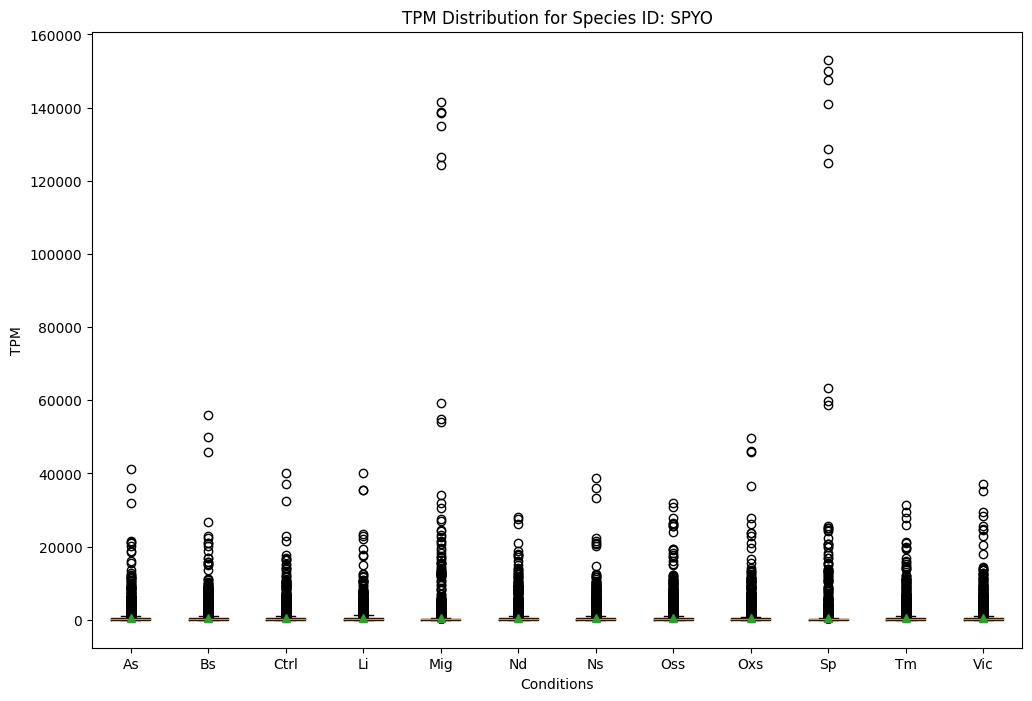

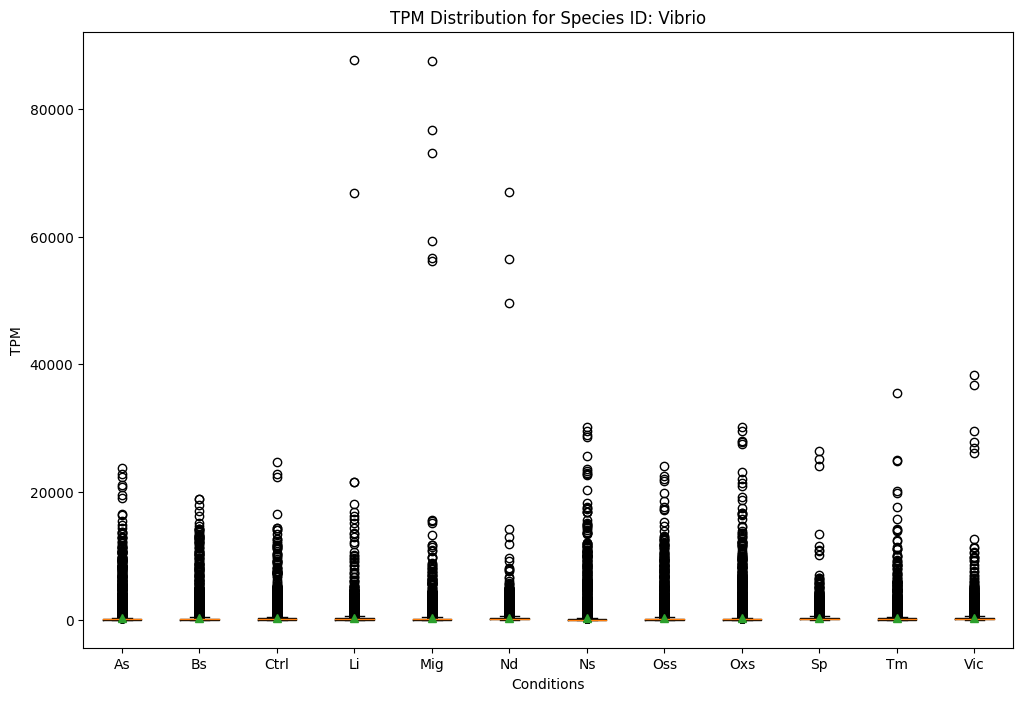

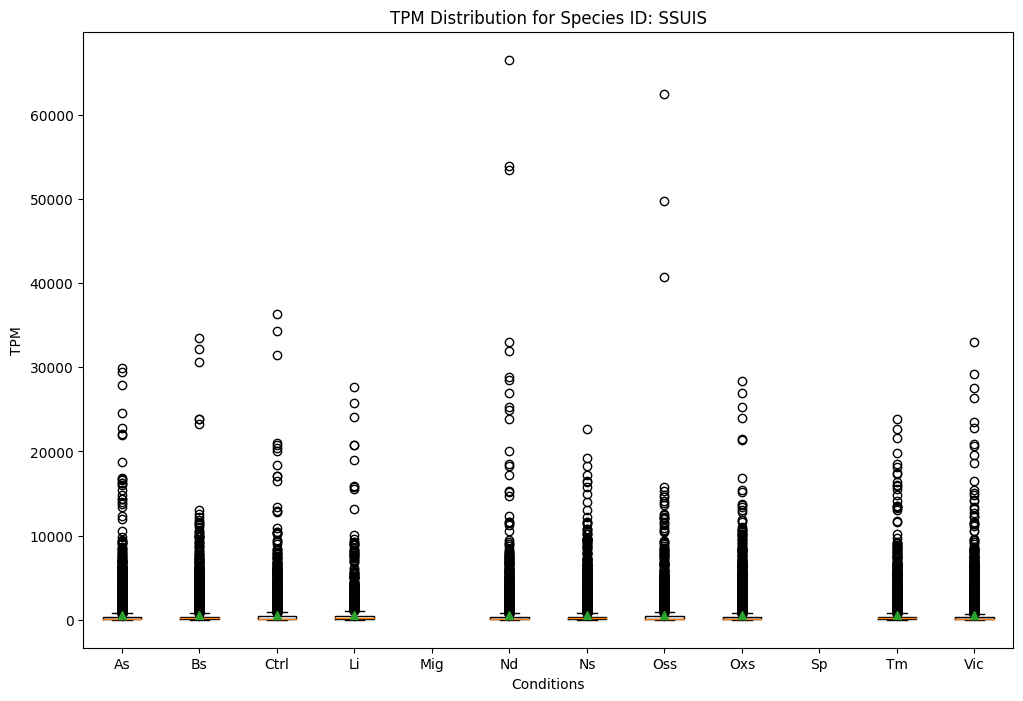

In [129]:
unique_species_ids = combined_data['Species ID'].unique()
conditions = [
    'As', 'Bs', 'Ctrl', 'Li', 'Mig', 'Nd', 'Ns', 'Oss', 'Oxs', 'Sp', 'Tm', 'Vic'
]
for species_id in unique_species_ids:
    # Filter data for current species ID据
    species_data = combined_data[combined_data['Species ID'] == species_id]

    # Create a chart for the current species ID
    plt.figure(figsize=(12, 8))

    # Initialize a dictionary to store the TPM values for each condition
    tpm_values = {condition: [] for condition in conditions}
    # Extract TPM columns for each condition
    for condition in conditions:
        for i in range(1, 4):
            col_name = f'{condition}_{i} (GE) - TPM'
            if col_name in combined_data.columns:
                tpm_values[condition].extend(species_data[col_name].dropna().tolist())

    # Plotting box lines
    plt.boxplot(tpm_values.values(), labels=tpm_values.keys(), showmeans=True)
    plt.title(f'TPM Distribution for Species ID: {species_id}')
    plt.xlabel('Conditions')
    plt.ylabel('TPM')
    plt.show()

In [13]:

# Extract conditional columns (remove first four and last two columns)
conditions = combined_data.columns[4:-2]
# Create a dictionary to store the absence of each Species ID for each condition
missing_tpm_data = {}

# Iterate over each Species ID
for species_id in combined_data['Species ID'].unique():
    missing_tpm_data[species_id] = {}
    # Filter out all rows for the current Species ID
    species_data = combined_data[combined_data['Species ID'] == species_id]

    for condition in conditions:
        # Missing Values Calculated
        missing_count = species_data[condition].isna().sum()
        if missing_count > 0:
            missing_tpm_data[species_id][condition] = missing_count

# Print the results, only if there are missing values
for species_id, condition_data in missing_tpm_data.items():
    if condition_data:
        print(f"Species ID: {species_id}")
        for condition, missing_count in condition_data.items():
            print(f"  {condition}: {missing_count} missing TPM values")

Species ID: BBURG
  Bs_1 (GE) - TPM: 1391 missing TPM values
  Bs_2 (GE) - TPM: 1391 missing TPM values
  Bs_3 (GE) - TPM: 1391 missing TPM values
Species ID: BURK
  Bs_1 (GE) - TPM: 5726 missing TPM values
  Bs_2 (GE) - TPM: 5726 missing TPM values
  Bs_3 (GE) - TPM: 5726 missing TPM values
Species ID: HINF
  Bs_1 (GE) - TPM: 1853 missing TPM values
  Bs_2 (GE) - TPM: 1853 missing TPM values
  Bs_3 (GE) - TPM: 1853 missing TPM values
Species ID: HP_G27
  Bs_1 (GE) - TPM: 1574 missing TPM values
  Bs_2 (GE) - TPM: 1574 missing TPM values
  Bs_3 (GE) - TPM: 1574 missing TPM values
Species ID: HPJ99
  Bs_1 (GE) - TPM: 1562 missing TPM values
  Bs_2 (GE) - TPM: 1562 missing TPM values
  Bs_3 (GE) - TPM: 1562 missing TPM values
Species ID: LEGIP
  Bs_1 (GE) - TPM: 2943 missing TPM values
  Bs_2 (GE) - TPM: 2943 missing TPM values
  Bs_3 (GE) - TPM: 2943 missing TPM values
  Vic_1 (GE) - TPM: 2943 missing TPM values
  Vic_2 (GE) - TPM: 2943 missing TPM values
  Vic_3 (GE) - TPM: 2943 missin

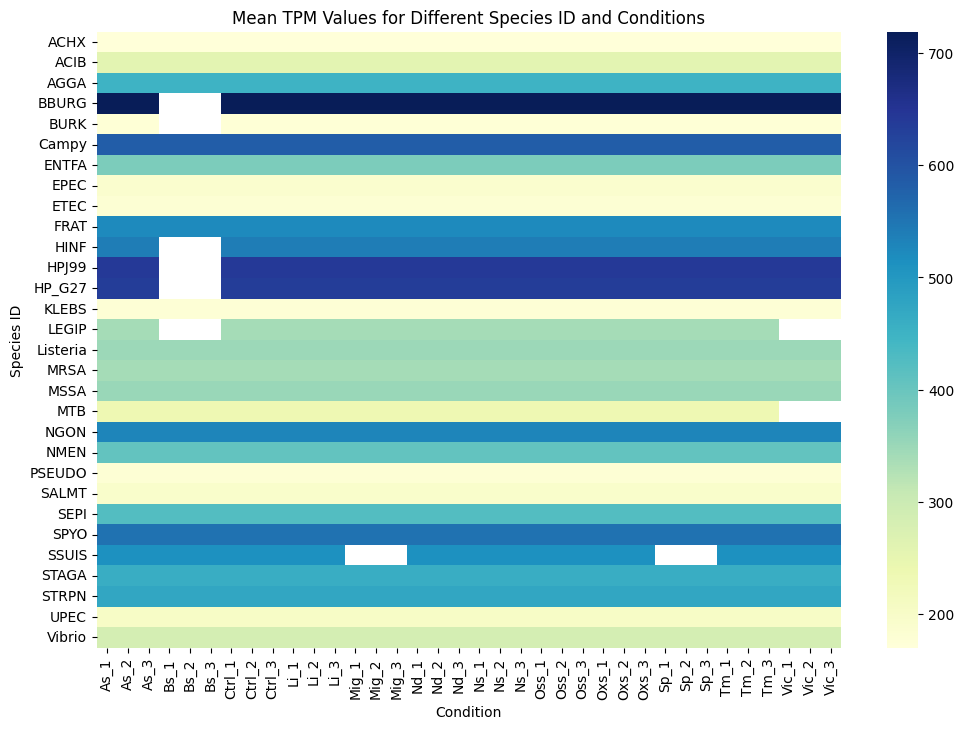

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select relevant columns for heatmap
columns = ['Species ID',
           'As_1 (GE) - TPM', 'As_2 (GE) - TPM', 'As_3 (GE) - TPM',
           'Bs_1 (GE) - TPM', 'Bs_2 (GE) - TPM', 'Bs_3 (GE) - TPM',
           'Ctrl_1 (GE) - TPM', 'Ctrl_2 (GE) - TPM', 'Ctrl_3 (GE) - TPM',
           'Li_1 (GE) - TPM', 'Li_2 (GE) - TPM', 'Li_3 (GE) - TPM',
           'Mig_1 (GE) - TPM', 'Mig_2 (GE) - TPM', 'Mig_3 (GE) - TPM',
           'Nd_1 (GE) - TPM', 'Nd_2 (GE) - TPM', 'Nd_3 (GE) - TPM',
           'Ns_1 (GE) - TPM', 'Ns_2 (GE) - TPM', 'Ns_3 (GE) - TPM',
           'Oss_1 (GE) - TPM', 'Oss_2 (GE) - TPM', 'Oss_3 (GE) - TPM',
           'Oxs_1 (GE) - TPM', 'Oxs_2 (GE) - TPM', 'Oxs_3 (GE) - TPM',
           'Sp_1 (GE) - TPM', 'Sp_2 (GE) - TPM', 'Sp_3 (GE) - TPM',
           'Tm_1 (GE) - TPM', 'Tm_2 (GE) - TPM', 'Tm_3 (GE) - TPM',
           'Vic_1 (GE) - TPM', 'Vic_2 (GE) - TPM', 'Vic_3 (GE) - TPM']

# Extract the data
data = combined_data[columns]

# Aggregate TPM values using mean for each 'Species ID' and condition combination
agg_data = data.groupby('Species ID').mean().reset_index()

# Step 4: Create Heatmap
# Pivot the data to have Species ID as index and conditions as columns
pivot_data = agg_data.melt(id_vars='Species ID', var_name='Condition', value_name='TPM')

# Convert 'Condition' column to just the condition name without ' (GE) - TPM'
pivot_data['Condition'] = pivot_data['Condition'].apply(lambda x: x.split(' ')[0])

# Create heatmap using seaborn
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_data.pivot(index='Species ID', columns='Condition', values='TPM'), cmap='YlGnBu', fmt=".1f")
plt.title('Mean TPM Values for Different Species ID and Conditions')
plt.show()
